> **Master's Degree in Data Sciences** | EAFIT University  
> **Course:** Fundamentals of Data Science   
> **Github Repository:**  [Github](https://github.com/SaraMR9/Maestria---Fundamentos-en-ciencia-de-datos)  
> **Group:** Sara Martinez Rendon (smartiner4@eafit.edu.co) | Heider Zapata (hzapata1@eafit.edu.co) | Yeison Londoño (ylondon4@eafit.edu.co)  
> **Date:** 15/02/2026
---

# **Final Project**

---

## 1. Business Understanding and Problem Context

This section outlines the business environment, the specific operational pain points, and the strategic justification for implementing a Machine Learning solution.

* **Business Description:** What is the organization or sector about?
    The organization is **Universidad EAFIT**, specifically focusing on the **Academic Registry Office** (*Oficina de Registro Académico*) and the Vice-Rectory of Learning. The sector is higher education, dealing with the complex logistics of planning and scheduling undergraduate academic courses. The process relies on a rich historical dataset (**2018-2026**) containing student behavior, enrollment flows, and institutional capacity constraints.

* **Problem Context:** What specific pain point or need are we addressing?
    Currently, the academic scheduling process is manual and reactive. It relies heavily on raw **Pre-registration** data, which acts as a "noisy" signal of intent rather than a guarantee of enrollment. Historical analysis reveals critical data gaps (e.g., the **2022 system blackout**) and behavioral inconsistencies (e.g., "Cold Start" for new subjects) that a manual process cannot correct. This results in a persistent gap between **Supply** (Groups Opened) and **Demand** (Actual Students), causing operational friction, financial inefficiencies from last-minute group closures, and administrative rework.

* **Justification:** Why is it relevant to solve this problem now?
    It is crucial to transition from intuitive estimation to a **predictive data-driven approach**. By implementing a **Random Forest Regressor**, the university can now forecast the exact number of enrolled students (`Total_Inscritos`) with a high degree of accuracy (**$R^2 \approx 0.80$**), effectively handling outliers and historical anomalies. This solution allows the administration to:
    1.  **Anticipate Demand:** Predict student volume with a margin of error of **~15 students (MAE)**, allowing for precise classroom sizing.
    2.  **Recover Lost Data:** Utilize imputation strategies to learn from years with missing records (like 2022).
    3.  **Optimize Resources:** Shift the focus from "putting out fires" to strategic planning, aiming to reduce the mismatch between opening and closing groups.

---

## 2. Data Selection and Origin

**Select a dataset of interest and indicate where it was obtained.**

* **Dataset:** The project utilizes seven datasets in Excel format (`.xlsx`).
* **Source:** Internal data from **Universidad EAFIT** corresponding to the academic programming and pre-enrollment records for the period **2022-2026**.
* **Key Variables:**
    * Subjects (Asignaturas)
    * Groups per subject
    * Schedules (Horarios)
    * Group capacity
    * Registered students per subject (Matrícula vs. Pre-matrícula)
* **Initial Data Assessment:**
    * **Missing Values:** Yes, the dataset contains missing values (NaN).
    * **Duplicates:** Yes, duplicate records have been identified.
    * **Inconsistencies:** No major inconsistencies observed so far.
    * **Correlations:** There are closely related variables, specifically between pre-enrollment figures and final enrollment.

---

## 3. Justification and Value Added

**Justification of the dataset with the value added it could give to the business.**

* **Limitations of the Current Process:**
    * Currently, decision-making is based **exclusively on pre-enrollment figures**, omitting key factors such as historical behavior and approval rates.
    * The process is **manual and reactive**, leading to operational inefficiencies and a high volume of last-minute adjustments (closing or opening groups) at the start of the semester.

* **Advantages of Analyzing this Dataset (Value Proposition):**
    * **Strategic Automation:** Analyzing this historical data (2022-2026) allows for the transition from a manual process to a **predictive analytical model**.
    * **Resource Optimization:** The model aims to minimize the "mismatch rate" between offered and demanded courses. This directly reduces the administrative burden of closing unnecessary groups or scrambling to open new ones.
    * **Operational Efficiency:** By automating the forecasting of necessary groups, administrative staff can shift focus from tedious operational tasks to high-impact strategic activities for the institution.
    * By implementing a regression model, the university aims to reduce the mismatch between projected supply and actual student demand. **Strategic Automation:** The transition from manual estimation to a **predictive analytical model** allows the university to forecast exact demand (`Total_Inscritos`) with an accuracy of **$R^2 \approx 0.8$**, effectively automating the "easy" decisions and flagging only complex cases for human review.
---

## 4. Data Preparation (Data Wrangling)

In this phase, data loading, cleaning, and transformation are performed.

### 4.1. Loading Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

In [3]:
# Read dataframes in the 'data' folder and store them in a dictionary with the filename as the key

# 1. Define current location (inside 'notebooks' folder)
current_folder = Path.cwd() 

# 2. Define project root (Move up one level)
# .parent takes us from '.../notebooks' to '.../Project_Root'
project_root = current_folder.parent

# 3. Build the path to the data
data_path = project_root / "data" / "raw"

# Verification
if not data_path.exists():
    print(f"⚠️ Path still not found: {data_path}")
    print(f"Searching from: {project_root}")
else:
    print(f"✅ Path found successfully: {data_path}")
    
    # 4. Loading loop
    data_frame = {}
    for archivo in data_path.glob("*.xlsx"):
        nombre = archivo.stem 
        data_frame[nombre] = pd.read_excel(archivo, skiprows=9)
        print(f"   -> Loaded: {nombre}")

✅ Path found successfully: c:\Users\Usuario\Repositorios git\Maestria---Fundamentos-en-ciencia-de-datos\Proyecto_Final\data\raw
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397456
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397462
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397508
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397514
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397517
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397525
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397529
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397540
   -> Loaded: EA_PROGRAMACION_ACADEMIC_BASIC-18397646


In [4]:
# Display the names of the dataframes that were successfully loaded
print(data_frame.keys())

dict_keys(['EA_PROGRAMACION_ACADEMIC_BASIC-18397456', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397462', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397508', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397514', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397517', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397525', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397529', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397540', 'EA_PROGRAMACION_ACADEMIC_BASIC-18397646'])


In [5]:
# Display the dimensions (shape) of each dataframe
filas = []

for archivo, df in data_frame.items():
    print(f"File: {archivo}")
    print(df.shape)
    filas.append(df.shape[0])

print(f"Number of rows for each dataframe: {filas}")
print(f"Total number of rows for all dataframes combined: {sum(filas)}")

File: EA_PROGRAMACION_ACADEMIC_BASIC-18397456
(7726, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397462
(7969, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397508
(7155, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397514
(5663, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397517
(5541, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397525
(6802, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397529
(5188, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397540
(5345, 52)
File: EA_PROGRAMACION_ACADEMIC_BASIC-18397646
(4862, 52)
Number of rows for each dataframe: [7726, 7969, 7155, 5663, 5541, 6802, 5188, 5345, 4862]
Total number of rows for all dataframes combined: 56251


In [6]:
# Concatenate all dataframes into a single one
prog_acad = pd.concat(data_frame.values(), ignore_index=True)

# Validate that the size matches the sum from the previous cell
print(prog_acad.shape)

(56251, 52)


In [7]:
# Download a copy of the concatenated dataset
#data_path = project_root / "data" / "processed" / "01_data_total.xlsx"
#prog_acad.to_excel(data_path, index=False)

### 4.2. Initial Exploration
*Reviewing structure, data types (`.info()`), and first rows (`.head()`).*

In [8]:
# Explore the academic programming dataframe for the last 9 semesters

pd.set_option("display.max_columns", None)
prog_acad.head(5)

,Institución,Grado,Ciclo,Código Catalogo,ID Curso,Nombre Catálogo,Código de la sesión,Sección,Nombre de la sesión,Número de Clase,Clase Asociada,Ubicación,Calendario Festivos,Modo Enseñanza,Modo Enseñanza Descr,Fec_Ini_Real_Clase,Fec_Fin_Real_Clase,Fecha_Ini_Mod_Reunión,Fecha_Fin_Mod_Reunión,Hora Inicio,Hora Fin,Días,Aula Asignada,Capacidad,Tipo Instalación,Código del Departamento,Docentes,Email Docente,Nom Estado Clase,Horas por semana,Metodología,Metodología descripción,Total Hrs Curso,Tipo de curso,Componente,Idioma,Rol Profesor,Acceso,Tipo Asignación,Tipo Clase,Componente Calificado,# Cupos disponibles,Tamaño Sección p/Def,Capcd Inscr,Tot Inscr,Estado Clase,Campus,Horas Programadas,Org Acad,Grupo Académico,Estado Inscripción,Prior
0,EAFIT - Universidad EAFIT,PREG,2661,CS0092,109867,Fotografía,ORD,5,Sesión Curso Ordinaria,7600,1,POBLADO,PREG,P,Presencial,2026-01-21,2026-05-13,2026-01-19,2026-05-16,06:00:00,09:00:00,Miercoles,NaN,0,NaN,CS,NaN,NaN,Detener Inscripción,DEFECTO,R,Magistral Reforma,48,ABIERTO,Clase,ESPANOL,Profesor Titular,Aprobar,Docencia normal,Sección Inscripción,Clase,20,20,20,0,S,MEDEL,48.0,SP,Escuela de Artes y Humanidades,Correcto,1
1,EAFIT - Universidad EAFIT,PREG,2661,CS0092,109867,Fotografía,ORD,6,Sesión Curso Ordinaria,7602,1,POBLADO,PREG,P,Presencial,2026-01-21,2026-05-13,2026-01-19,2026-05-16,15:00:00,18:00:00,Miercoles,Poblado Bloque 29 Aula 205,25,Aula normal,CS,1000137468-CC-1128275920-DAVID CORREA FRANCO-P...,dcorreaf@eafit.edu.co,Activo,DEFECTO,R,Magistral Reforma,48,ABIERTO,Clase,ESPANOL,Profesor Titular,Aprobar,Docencia normal,Sección Inscripción,Clase,0,20,9,9,A,MEDEL,48.0,SP,Escuela de Artes y Humanidades,Correcto,2
2,EAFIT - Universidad EAFIT,PREG,2661,CS0240,109937,Teo. de Func. y Efectos Comun.,ORD,2,Sesión Curso Ordinaria,1857,1,POBLADO,PREG,P,Presencial,2026-01-19,2026-05-16,NaT,NaT,NaN,NaN,NaN,NaN,0,NaN,CS,NaN,NaN,Sección Cancelada,DEFECTO,R,Magistral Reforma,48,ABIERTO,Clase,ESPANOL,NaN,NaN,NaN,Sección Inscripción,Clase,25,30,25,0,X,MEDEL,0.0,SP,Escuela de Artes y Humanidades,NaN,1
3,EAFIT - Universidad EAFIT,PREG,2661,LE0001,134275,Prueba de Lectura 1,ORD,1,Sesión Curso Ordinaria,7543,1,POBLADO,PREG,P,Presencial,2026-02-14,2026-02-14,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Poblado Bloque 18 Computo 315,30,Sala De Computo,LE,NaN,NaN,Detener Inscripción,DEFECTO,R,Magistral Reforma,2,ABIERTO,Clase,ESPANOL,NaN,NaN,NaN,Sección Inscripción,Clase,27,30,27,0,S,MEDEL,2.0,LE,Escuela de Artes y Humanidades,Correcto,5
4,EAFIT - Universidad EAFIT,PREG,2661,LE0001,134275,Prueba de Lectura 1,ORD,2,Sesión Curso Ordinaria,7544,1,POBLADO,PREG,P,Presencial,2026-02-14,2026-02-14,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Poblado Bloque 20 Computo 413,50,Sala De Computo- Lab Procesami,LE,NaN,NaN,Activo,DEFECTO,R,Magistral Reforma,2,ABIERTO,Clase,ESPANOL,NaN,NaN,NaN,Sección Inscripción,Clase,0,30,40,40,A,MEDEL,2.0,LE,Escuela de Artes y Humanidades,Correcto,1


In [9]:
prog_acad.columns

Index(['Institución', 'Grado', 'Ciclo', 'Código Catalogo', 'ID Curso',
       'Nombre Catálogo', 'Código de la sesión', 'Sección',
       'Nombre de la sesión', 'Número de Clase', 'Clase Asociada', 'Ubicación',
       'Calendario Festivos', 'Modo Enseñanza', 'Modo Enseñanza Descr',
       'Fec_Ini_Real_Clase', 'Fec_Fin_Real_Clase', 'Fecha_Ini_Mod_Reunión',
       'Fecha_Fin_Mod_Reunión', 'Hora Inicio', 'Hora Fin', 'Días',
       'Aula Asignada', 'Capacidad', 'Tipo Instalación',
       'Código del Departamento', 'Docentes', 'Email Docente',
       'Nom Estado Clase', 'Horas por semana', 'Metodología',
       'Metodología descripción', 'Total Hrs Curso', 'Tipo de curso',
       'Componente', 'Idioma', 'Rol Profesor', 'Acceso', 'Tipo Asignación',
       'Tipo Clase', 'Componente Calificado', '# Cupos disponibles',
       'Tamaño Sección p/Def', 'Capcd Inscr', 'Tot Inscr', 'Estado Clase',
       'Campus', 'Horas Programadas', 'Org Acad', 'Grupo Académico',
       'Estado Inscripción', 'Pri

In [10]:
prog_acad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56251 entries, 0 to 56250
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Institución              56251 non-null  object        
 1   Grado                    56251 non-null  object        
 2   Ciclo                    56251 non-null  int64         
 3   Código Catalogo          56251 non-null  object        
 4   ID Curso                 56251 non-null  int64         
 5   Nombre Catálogo          56251 non-null  object        
 6   Código de la sesión      56251 non-null  object        
 7   Sección                  56251 non-null  object        
 8   Nombre de la sesión      56251 non-null  object        
 9   Número de Clase          56251 non-null  int64         
 10  Clase Asociada           56251 non-null  int64         
 11  Ubicación                56251 non-null  object        
 12  Calendario Festivos      56251 n

### 4.3. Data Cleaning

In [11]:
 # Create a copy of the original dataframe to make changes
programacion = prog_acad.copy()

#### 4.3.1.

**Data Filtering:** Target Subset Analysis  

Before proceeding with the analysis, we need to focus on the specific scope of the project: In-person classes at the Poblado campus. We will first estimate the proportion of the data that meets these criteria to ensure that filtering does not result in a significant loss of information.

In [12]:
# Rename columns to make them easier to understand
programacion = programacion.rename(columns={ "Ciclo" : "Semestre",
                                             "Código Catalogo" : "Código Materia",
                                             "Nombre Catálogo" : "Nombre Materia",
                                             "Fecha_Ini_Mod_Reunión" : "Fecha Inicio",
                                             "Fecha_Fin_Mod_Reunión" : "Fecha Fin",
                                             "Tot Inscr" : "Total Inscritos",
                                             "Grupo Académico" : "Escuela"
                                            })
programacion.columns

Index(['Institución', 'Grado', 'Semestre', 'Código Materia', 'ID Curso',
       'Nombre Materia', 'Código de la sesión', 'Sección',
       'Nombre de la sesión', 'Número de Clase', 'Clase Asociada', 'Ubicación',
       'Calendario Festivos', 'Modo Enseñanza', 'Modo Enseñanza Descr',
       'Fec_Ini_Real_Clase', 'Fec_Fin_Real_Clase', 'Fecha Inicio', 'Fecha Fin',
       'Hora Inicio', 'Hora Fin', 'Días', 'Aula Asignada', 'Capacidad',
       'Tipo Instalación', 'Código del Departamento', 'Docentes',
       'Email Docente', 'Nom Estado Clase', 'Horas por semana', 'Metodología',
       'Metodología descripción', 'Total Hrs Curso', 'Tipo de curso',
       'Componente', 'Idioma', 'Rol Profesor', 'Acceso', 'Tipo Asignación',
       'Tipo Clase', 'Componente Calificado', '# Cupos disponibles',
       'Tamaño Sección p/Def', 'Capcd Inscr', 'Total Inscritos',
       'Estado Clase', 'Campus', 'Horas Programadas', 'Org Acad', 'Escuela',
       'Estado Inscripción', 'Prior'],
      dtype='object')

In [13]:
# Replace the codes in the 'Semestre' column with more descriptive values to facilitate subsequent analysis
mapa_semestres = {
                "2261": "2022-1",
                "2266": "2022-2",
                "2361": "2023-1",
                "2366": "2023-2",
                "2461": "2024-1",
                "2466": "2024-2",
                "2561": "2025-1",
                "2566": "2025-2",
                "2661": "2026-1"
                }       

programacion["Semestre"] = programacion["Semestre"].astype(str).replace(mapa_semestres)
programacion["Semestre"].value_counts().sort_index()

Semestre
2022-1    4862
2022-2    5345
2023-1    5188
2023-2    6802
2024-1    5541
2024-2    5663
2025-1    7155
2025-2    7969
2026-1    7726
Name: count, dtype: int64

Now that we have standardized the column names and academic periods, we will verify the size of our target subset:

In [14]:
# 1. Define the composite condition
# "Ubicación" == POBLADO AND "Modo Enseñanza" == P [In-person]
condition = (programacion['Ubicación'] == 'POBLADO') & (programacion['Modo Enseñanza'] == 'P')

# 2. Calculate the total proportion
# The mean of the boolean series provides the global fulfillment percentage
total_proportion = condition.mean()

# 3. Calculate the proportion by 'Semestre'
# Group the boolean series by the original dataframe's 'Semestre' column and calculate the mean
proportion_by_semester = condition.groupby(programacion['Semestre']).mean()

# --- Print results ---
print(f"Proportion of in-person observations in Poblado - Total (Global): {total_proportion:.2%}")

print("\nProportion of in-person observations in Poblado by Semester:")
# Display the results formatted as percentages
print(proportion_by_semester.apply(lambda x: f"{x:.2%}"))

Proportion of in-person observations in Poblado - Total (Global): 97.69%

Proportion of in-person observations in Poblado by Semester:
Semestre
2022-1    94.01%
2022-2    96.35%
2023-1    96.14%
2023-2    99.06%
2024-1    98.54%
2024-2    98.91%
2025-1    97.75%
2025-2    98.23%
2026-1    98.68%
dtype: object


**We filter the subset of interest (df)**:

In [15]:
# 1. Check current dataset dimensions
print(f"Original dataset size: {programacion.shape}")

# 2. Apply filtering for the subset of interest
# Criteria: Location = 'POBLADO' AND Teaching Mode = 'P' (In-person)
df = programacion[
    (programacion['Ubicación'] == 'POBLADO') & 
    (programacion['Modo Enseñanza'] == 'P')
].copy() # By using .copy(), we explicitly tell Python that we want to create a new object in memory.

# 3. Verify the resulting subset size
print(f"Filtered subset size (Poblado/In-person): {df.shape}")

# 4. Calculate the percentage of data retained
retention_rate = (len(df) / len(programacion)) * 100
print(f"Data retention rate: {retention_rate:.2f}%")

Original dataset size: (56251, 52)
Filtered subset size (Poblado/In-person): (54954, 52)
Data retention rate: 97.69%


Define which variable we will use as the course ID (each observation will ultimately be one course per semester)

In [16]:
# Group by 'Código Materia' and count how many unique 'ID Curso' values are associated with each
# This ensures that one Subject Code does not map to multiple different Course IDs
subject_id_check = df.groupby('Código Materia')['ID Curso'].nunique()

# Filter to find any instances where a 'Código Materia' has more than 1 'ID Curso'
inconsistencies = subject_id_check[subject_id_check > 1]

# Display the results
if inconsistencies.empty:
    print("Verification Successful: Each 'Código Materia' maps to exactly one 'ID Curso'.")
    print("We can proceed with dropping 'ID Curso' as it provides no additional unique info.")
else:
    print(f"Alert: {len(inconsistencies)} subject(s) found with multiple Course IDs:")
    print(inconsistencies)

Verification Successful: Each 'Código Materia' maps to exactly one 'ID Curso'.
We can proceed with dropping 'ID Curso' as it provides no additional unique info.


We proceed to eliminate extra IDs and other variables that do not add value to the analytical exercise

In [17]:
# Remove columns that are not considered relevant for the analysis
# (Either because they have a fixed or default value that adds no insight, or because—as with schedules—they
# result in duplicates that offer no added value. This specific analysis of scheduling will be conducted in a subsequent phase)

df = df.drop(columns=["Institución", "Grado", "ID Curso", "Código de la sesión", "Nombre de la sesión", "Ubicación", "Calendario Festivos", "Modo Enseñanza", "Modo Enseñanza Descr",
                                          "Fec_Ini_Real_Clase", "Fec_Fin_Real_Clase", "Aula Asignada", "Capacidad", "Tipo Instalación", "Idioma", "Código del Departamento", "Docentes", "Email Docente", "Horas por semana",
                                          "Metodología", "Metodología descripción", "Total Hrs Curso", "Horas Programadas", "Tipo de curso" , "Rol Profesor", "Acceso", "Tipo Asignación", "Componente Calificado","Campus", "Estado Clase", "Org Acad", "Estado Inscripción", 
                                          "Prior"], axis=1)


# Download a copy of the concatenated dataset
#data_path = project_root / "data" / "processed" / "02_data.xlsx"
#df.to_excel(data_path, index=False)

In [18]:
print(df.columns)
print(df.shape)
df.head()

Index(['Semestre', 'Código Materia', 'Nombre Materia', 'Sección',
       'Número de Clase', 'Clase Asociada', 'Fecha Inicio', 'Fecha Fin',
       'Hora Inicio', 'Hora Fin', 'Días', 'Nom Estado Clase', 'Componente',
       'Tipo Clase', '# Cupos disponibles', 'Tamaño Sección p/Def',
       'Capcd Inscr', 'Total Inscritos', 'Escuela'],
      dtype='object')
(54954, 19)


,Semestre,Código Materia,Nombre Materia,Sección,Número de Clase,Clase Asociada,Fecha Inicio,Fecha Fin,Hora Inicio,Hora Fin,Días,Nom Estado Clase,Componente,Tipo Clase,# Cupos disponibles,Tamaño Sección p/Def,Capcd Inscr,Total Inscritos,Escuela
0,2026-1,CS0092,Fotografía,5,7600,1,2026-01-19,2026-05-16,06:00:00,09:00:00,Miercoles,Detener Inscripción,Clase,Sección Inscripción,20,20,20,0,Escuela de Artes y Humanidades
1,2026-1,CS0092,Fotografía,6,7602,1,2026-01-19,2026-05-16,15:00:00,18:00:00,Miercoles,Activo,Clase,Sección Inscripción,0,20,9,9,Escuela de Artes y Humanidades
2,2026-1,CS0240,Teo. de Func. y Efectos Comun.,2,1857,1,NaT,NaT,NaN,NaN,NaN,Sección Cancelada,Clase,Sección Inscripción,25,30,25,0,Escuela de Artes y Humanidades
3,2026-1,LE0001,Prueba de Lectura 1,1,7543,1,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Detener Inscripción,Clase,Sección Inscripción,27,30,27,0,Escuela de Artes y Humanidades
4,2026-1,LE0001,Prueba de Lectura 1,2,7544,1,2026-02-14,2026-02-14,07:00:00,09:00:00,Sábado,Activo,Clase,Sección Inscripción,0,30,40,40,Escuela de Artes y Humanidades


We address an inconsistency observed in the previous analysis: there are subjects with a status of **'Activo' (Active)** or **'Detener Inscripción' (Stop Enrollment)** that surprisingly show **0 enrolled students**. Additionally, we identify and remove records with missing values (**NaN**) to ensure they do not introduce noise into the data processing pipeline.

In [19]:
# 1. Identify inconsistencies: Active/Stop classes with 0 students
# Note: We use 'Activo' based on the dataset values.
inconsistency_mask = (
    (df['Nom Estado Clase'].isin(['Activo', 'Detener Inscripción'])) & 
    (df['Total Inscritos'] == 0)
)
cantidad_ceros = inconsistency_mask.sum()
print(f"Records with status 'Activo'/'Detener Inscripción' and 0 Enrolled: {cantidad_ceros}")

# 2. Identify missing values (NaN) in enrollment
nan_mask = (
    (df['Nom Estado Clase'].isin(['Activo', 'Detener Inscripción'])) & 
    (df['Total Inscritos'].isna())
)
cantidad_nan = nan_mask.sum()
print(f"Records with status 'Activo'/'Detener Inscripción' and NaN Enrolled: {cantidad_nan}")

# 3. Remove these inconsistent/invalid records
# We filter the dataframe to keep only valid rows
initial_count = len(df)
df = df[~inconsistency_mask & ~nan_mask].copy()
dropped_count = initial_count - len(df)

print(f"\nOriginal records: {initial_count}")
print(f"Records dropped: {dropped_count}")
print(f"Final records in df: {len(df)}")

Records with status 'Activo'/'Detener Inscripción' and 0 Enrolled: 7505
Records with status 'Activo'/'Detener Inscripción' and NaN Enrolled: 0

Original records: 54954
Records dropped: 7505
Final records in df: 47449


In [20]:
df['Nom Estado Clase'].unique()

array(['Activo', 'Sección Cancelada', 'Detener Inscripción',
       'Sección Provisional'], dtype=object)

In [21]:
# We create a copy of the dataframe at this stage. 
# This will be used later to correctly calculate the total number of opened courses, 
# including those that were cancelled (0 enrolled).
df_clean = df.copy()

# Now, we proceed to remove records where 'Total Inscritos' is 0 or NaN, 
# as they do not provide relevant information for the next step.
df = df[(df['Total Inscritos'] != 0) & (df['Total Inscritos'].notna())]

print('Number of records in the DataFrame (df) after removing records with 0 or NaN in "Total Inscritos":', len(df))


Number of records in the DataFrame (df) after removing records with 0 or NaN in "Total Inscritos": 42136


---

#### **4.3.2. Dataset Restructuring**
To conduct a robust analysis, we will restructure the database so that each observation represents a unique Subject-Semester pair. This change in granularity is essential to create and merge, from the original data, the following datasets:

* **df_1. Total Enrollment:** Number of students enrolled per subject and semester.

* **df_2. Total Sections Opened:** Number of initial groups created per subject and semester.

* **df_3. Total Effective Sections:** Number of active groups (excluding those eventually canceled) per subject and semester.

* **df_4. Labs (dummy)**: categorize subjects that consist of more than just a standard lecture (Clase). This dataset flags courses that include laboratories, workshops, or other practical components.

* **df_5. Pre-enrollment Data:** Total pre-registered students per subject and semester (integrated from external data sources).

* **df_6. Failure Rates:** Total number of students who failed the subject per semester (integrated from external data sources).

* **df_7. First-Semester Indicator:** Categorizing subjects that belong to the first level of the undergraduate program (integrated from external data sources).

---

##### **df_1: Total enrollment**

**Total Enrollment:** Number of students enrolled per subject and semester.

The first step in calculating the enrollment per subject and semester is to filter out records where the status is 'Cancelled' or 'Provisional'.

Class Status Definitions:
<ul>
    <li>Activo (Active): Active classes in the semester.</li>
    <li>Detener Inscripción (Stop Enrollment): Classes that were active, and at some point enrollment was stopped so that no more students could enroll.</li>
    <li>Sección Cancelada (Cancelled Section): Classes that were determined not to be used. These always have zero enrolled students.</li>
    <li>Sección Provisional (Provisional Section): A temporary status that was only used once, in a single class in the 2022-1 semester.</li>
</ul>

In [22]:
df_1 = df.copy()

In [23]:
# Check the "Nom Estado Clase" column to see which statuses exist. 
# The intent is to remove 'Sección Cancelada' and 'Sección Provisional', 
# as these statuses are assigned to classes that will not be held during the semester.
df_1["Nom Estado Clase"].unique()

array(['Activo', 'Detener Inscripción', 'Sección Cancelada',
       'Sección Provisional'], dtype=object)

We observed that 'Sección Provisional' only appeared in two instances within a single semester. Since this is not statistically significant or relevant to the overall analysis, these records will be removed to maintain data quality.

In [24]:
# It is observed that 'Sección Provisional' was a status used in only two classes during a single semester.
# It is not relevant for the analysis, so it will be removed.
df_1[df_1["Nom Estado Clase"] == "Sección Provisional"]

,Semestre,Código Materia,Nombre Materia,Sección,Número de Clase,Clase Asociada,Fecha Inicio,Fecha Fin,Hora Inicio,Hora Fin,Días,Nom Estado Clase,Componente,Tipo Clase,# Cupos disponibles,Tamaño Sección p/Def,Capcd Inscr,Total Inscritos,Escuela
52140,2022-1,HL0229,Curso Proyecto - 1 Crédito,3,5946,3,2022-03-19,2022-03-19,12:00:00,14:00:00,Sábado,Sección Provisional,Clase,Sección Inscripción,9,10,10,1,Escuela de Artes y Humanidades
52141,2022-1,HL0229,Curso Proyecto - 1 Crédito,3,5946,3,2022-05-28,2022-05-28,18:00:00,20:00:00,Sábado,Sección Provisional,Clase,Sección Inscripción,9,10,10,1,Escuela de Artes y Humanidades


To ensure the analysis only includes relevant academic activity, the dataset is filtered to retain only active classes or those where enrollment was specifically halted. Cancelled and provisional sections are excluded.

In [25]:
# 1. Store initial count
initial_count = len(df_1)

# 2. Apply filter: Solo lo que está activo académicamente
df_1 = df_1[df_1["Nom Estado Clase"].isin(["Activo", "Detener Inscripción"])].copy()

# 3. Calculate filtering metrics
final_count = len(df_1)
removed_count = initial_count - final_count
proportion_removed = (removed_count / initial_count) if initial_count > 0 else 0

# --- Print results ---
print(f"Unique values in 'Nom Estado Clase' after filtering: {df_1['Nom Estado Clase'].unique()}")
print(f"Dataset shape after filtering: {df_1.shape}")
print(f"Observations removed: {removed_count}")
print(f"Proportion of data removed: {proportion_removed:.2%}")

Unique values in 'Nom Estado Clase' after filtering: ['Activo' 'Detener Inscripción']
Dataset shape after filtering: (42132, 19)
Observations removed: 4
Proportion of data removed: 0.01%


**Filtering `Componente == 'Clase'` for preventing Overestimation**

Once we have isolated the active classes, we proceed to filter the dataset to include only records where `Componente == 'Clase'` (Lecture). This ensures that when we aggregate the data by subject and semester, we avoid overestimating the total enrollment. Since laboratories and lectures often share the same student list, failing to remove the lab component would double the enrollment count for any subject requiring a practical session

In [26]:
df_1_unfiltered_componente = df_1.copy()

In [27]:
print(f"Tipos de clases (Componente): {df_1["Componente"].unique()}")

# Store the count before filtering by component type
initial_comp_count = len(df_1)

# 1. Creamos la LISTA MAESTRA (Brújula) usando el dataframe original 'df'
# Esto identifica TODAS las materias que son clases, sin importar el semestre.
materias_clase_master = df[df['Componente'] == 'Clase']['Código Materia'].unique()
print(f"Total de materias identificadas con componente Clase (Brújula) (Sin filtrar Estado Clase): {len(materias_clase_master)}")

# 2. Filtramos df_1 para que solo tenga el componente 'Clase'
df_1 = df_1[df_1["Componente"] == "Clase"].copy()

# 3. Verificación de lo que tenemos en df_1 (debería darte tus 2598)
df_1_verification = df_1['Código Materia'].unique()
print(f"Total de materias únicas en df_1: {len(df_1_verification)}")
print("Lo que indica lo anterior es que el filtro si está haciendo su función")

# Calculate filtering metrics
final_comp_count = len(df_1)
removed_comp = initial_comp_count - final_comp_count
retention_rate = (final_comp_count / initial_comp_count) if initial_comp_count > 0 else 0

print("")
# --- Print results ---
print(f"Unique values in 'Componente' after filtering: {df_1['Componente'].unique()}")
print(f"Observations removed (Labs/other components): {removed_comp}")
print(f"Dataset shape after component filtering: {df_1.shape}")
print(f"Data retention rate for this step: {retention_rate:.2%}")

Tipos de clases (Componente): ['Clase' 'Laboratorio' 'Prácticas' 'Conferencia' 'Salidas de campo'
 'Inducción' 'Deportes' 'Clase-Unión']
Total de materias identificadas con componente Clase (Brújula) (Sin filtrar Estado Clase): 2420
Total de materias únicas en df_1: 2420
Lo que indica lo anterior es que el filtro si está haciendo su función

Unique values in 'Componente' after filtering: ['Clase']
Observations removed (Labs/other components): 4857
Dataset shape after component filtering: (37275, 19)
Data retention rate for this step: 88.47%


**Aggregating Enrollment and Capacity per Subject**

Having removed canceled sections and non-lecture components (such as laboratories) that could lead to duplicate enrollment counts, we now isolate the essential variables required for subject-level grouping:

- Semester

- Subject Code

- Total Enrollment

- Available Capacity

This step focuses the dataset on the core predictors for our regression model. By aggregating the total number of enrolled students and available spots at the subject level, we create a refined historical record spanning the 2022–2026 period. This consolidated structure allows us to accurately track student demand patterns, providing a critical foundation for predicting the required number of groups for the upcoming 2026-1 academic cycle




---

Note: Since the combinations of Subject Code and School, and Subject Code and Subject Name, are not unique, we will exclude them from the analysis. This may be due to changes in the names of Schools and Subjects over time:

In [28]:
# Verification: Unique mapping between 'Código Materia' and 'Nombre Materia'
# This ensures that each subject code consistently maps to the same name throughout the dataset.

# 1. Check if any Subject Code is associated with multiple names
code_to_name_check = df_1.groupby('Código Materia')['Nombre Materia'].nunique()
code_mismatches = code_to_name_check[code_to_name_check > 1]

# 2. Check if any Subject Name is associated with multiple codes
name_to_code_check = df_1.groupby('Nombre Materia')['Código Materia'].nunique()
name_mismatches = name_to_code_check[name_to_code_check > 1]

# --- Print Results ---
if code_mismatches.empty and name_mismatches.empty:
    print("Verification Successful: There is a unique 1-to-1 mapping between 'Código Materia' and 'Nombre Materia'.")
else:
    if not code_mismatches.empty:
        print(f"Alert: Found {len(code_mismatches)} code(s) associated with multiple names:")
        print(code_mismatches)
    
    if not name_mismatches.empty:
        print(f"Alert: Found {len(name_mismatches)} name(s) associated with multiple codes:")
        print(name_mismatches)

Alert: Found 31 code(s) associated with multiple names:
Código Materia
BI0499    2
BU0231    2
CM0108    2
CS0280    2
DE0156    2
DE0520    2
DE0887    2
DE0888    2
DE0889    2
DR1003    2
DR3013    2
EC0266    2
HL0551    2
IA0502    2
ID0910    2
ID0911    2
ID0912    2
ID0913    2
MU0681    2
MU0934    2
MU0936    2
MU0938    2
MU2381    2
NI0269    2
NM1005    2
NM2003    2
PR0240    2
PT0311    2
SI2001    2
ST0245    2
ST0247    2
Name: Nombre Materia, dtype: int64
Alert: Found 224 name(s) associated with multiple codes:
Nombre Materia
Acciones Predictivas             2
Acciones Preventivas             2
Acción Colectiva                 2
Administración Pública           3
Administración de Operaciones    3
                                ..
Énfasis III                      2
Énfasis IV                       2
Ética                            2
Ética Pública                    2
Óptica                           2
Name: Código Materia, Length: 224, dtype: int64


In [29]:
# Group by 'Código Materia' and count the number of unique 'Escuela' values associated with each
# This ensures that a single subject doesn't appear under different schools due to data entry errors
school_consistency_check = df_1.groupby('Código Materia')['Escuela'].nunique()

# Identify subjects mapped to more than one school
school_mismatches = school_consistency_check[school_consistency_check > 1]

# --- Print results ---
if school_mismatches.empty:
    print("Verification Successful: Each 'Código Materia' is associated with exactly one 'Escuela'.")
    print("The academic hierarchy is consistent across the dataset.")
else:
    print(f"Warning: {len(school_mismatches)} subject(s) are mapped to multiple schools:")
    print(school_mismatches)

Código Materia
BI0045    2
BI0230    2
BI0231    2
BI0232    2
BI0235    2
         ..
GP0676    2
GP0677    2
HL1419    2
PR0311    2
ST0291    2
Name: Escuela, Length: 225, dtype: int64


---

We proceed with grouping:

In [30]:
# ---------------------------------------------------------
# NEW STEP: Aggregation with Deduplication (The Fix)
# ---------------------------------------------------------

# 1. Define the columns needed for the final aggregation
cols_to_keep = ['Semestre', 'Código Materia', 'Número de Clase', 'Total Inscritos', '# Cupos disponibles']
df_subset = df_1[cols_to_keep].copy()

# 2. Deduplicate: Keep only one row per unique Section (Class Number)
# This removes the multiple rows caused by class schedules (e.g., Mon/Wed/Fri entries for the same group)
df_unique_sections = df_subset.drop_duplicates(subset=['Semestre', 'Código Materia', 'Número de Clase'])

# 3. Aggregate: Sum the enrollment for the unique sections per Subject
df_final_agg = df_unique_sections.groupby(['Semestre', 'Código Materia']).agg({
    'Total Inscritos': 'sum',
    '# Cupos disponibles': 'sum'
}).reset_index()

# 4. Rename columns to match your desired output format
df_1 = df_final_agg.rename(columns={
    'Total Inscritos': 'Total_Inscritos',
    '# Cupos disponibles': 'Total_Cupos_No usados'
})

# --- Verification ---
print(f"Final df_1 shape: {df_1.shape}")

# Verify BI0230 (Should be 43)
check_bi0230 = df_1[(df_1['Código Materia'] == 'BI0230') & (df_1['Semestre'] == '2025-2')]
if not check_bi0230.empty:
    print(f"BI0230 Enrolled: {check_bi0230['Total_Inscritos'].values[0]} (Expected: 43)")

# Verify BI0455 (Should be 15)
check_bi0455 = df_1[(df_1['Código Materia'] == 'BI0455') & (df_1['Semestre'] == '2025-2')]
if not check_bi0455.empty:
    print(f"BI0455 Enrolled: {check_bi0455['Total_Inscritos'].values[0]} (Expected: 15)")

# # --- Print verification ---
print(f"Restructured dataset (df_1) shape: {df_1.shape}")
print(f"Periods covered: {df_1['Semestre'].nunique()}")
df_1.head()



Final df_1 shape: (12449, 4)
BI0230 Enrolled: 43 (Expected: 43)
BI0455 Enrolled: 15 (Expected: 15)
Restructured dataset (df_1) shape: (12449, 4)
Periods covered: 9


,Semestre,Código Materia,Total_Inscritos,Total_Cupos_No usados
0,2022-1,BI0045,14,0
1,2022-1,BI0230,96,12
2,2022-1,BI0231,9,2
3,2022-1,BI0232,16,32
4,2022-1,BI0235,14,3


Verifying that there is indeed only one ‘Subject Code’ per ‘Semester’, the first 20 rows are displayed.

In [31]:
df_1_sorted = df_1.sort_values(by=['Código Materia', 'Semestre'], ascending=[True, False])

pd.set_option('display.max_columns', None)
# show first 20 rows
df_1_sorted.head(20)

,Semestre,Código Materia,Total_Inscritos,Total_Cupos_No usados
10935,2026-1,AH1001,133,8
10936,2026-1,AH2001,70,1
10937,2026-1,AH2003,107,23
10938,2026-1,AH2004,9,32
10939,2026-1,AH3004,1,16
10940,2026-1,BI0045,1,31
9402,2025-2,BI0045,9,11
7898,2025-1,BI0045,6,14
6462,2024-2,BI0045,10,22
5105,2024-1,BI0045,12,23


> **Note:** To validate the grouping logic, we performed a manual cross-check with the university's raw data. We determined that if the aggregation was executed correctly, a course involving both canceled sections and laboratory components—such as Fenómenos Quím. y Laboratorio (BI0230)—should show 43 enrolled students and 14 available spots for the 2025_2 semester. Let's verify this result:

In [32]:
# Filter the grouped dataframe (df_1) for the specific subject and semester
verification = df_1[
    (df_1['Código Materia'] == 'BI0230') & 
    (df_1['Semestre'] == '2025-2')
]

# Display the result to confirm if it matches: 43 Enrolled and 14 Spots Available
if not verification.empty:
    print("Verification Result for BI0230 (2025-2):")
    print(verification[['Semestre', 'Código Materia', 'Total_Inscritos', 'Total_Cupos_No usados']])
else:
    print("Record not found. Please double-check the filtering steps or the Semester/Code string values.")

Verification Result for BI0230 (2025-2):
     Semestre Código Materia  Total_Inscritos  Total_Cupos_No usados
9403   2025-2         BI0230               43                     14


In [33]:
# Duplicate check in ‘Semester’ and 'Course Code'
num_duplicados = df_1.duplicated(subset=['Semestre', 'Código Materia']).sum()

print(f"Records with duplicate keys in df_1: {num_duplicados}")
print('df_1 len:', len(df_1))

Records with duplicate keys in df_1: 0
df_1 len: 12449


The results above confirm that the student aggregation per subject was executed successfully. By isolating active lecture components, we have effectively prevented bias from canceled sections and avoided the inflation of enrollment figures caused by laboratory components. This cleaned dataset, df_1, now provides a reliable historical foundation for modeling student demand.

> Critical Step:
> We must account for subjects where the primary component is not a standard "Lecture" (Clase) but rather a "Laboratory" (or similar). To ensure comprehensive coverage, we need to generate a supplementary dataset, df_1.2, containing those courses that lack "Lecture" components but include "Laboratories." We will then concatenate this subset with df_1.

In [34]:
df_12 = df.copy()

#Apply the filter: keep only 'Activo' and 'Detener Inscripción'
df_12 = df_12[df_12["Nom Estado Clase"].isin(["Activo", "Detener Inscripción"])].copy()

In [35]:
# --- STEP 1: Identify Subjects with 'Clase' component (Blacklist) ---
# We look at the original 'df' to see which (Semester, Subject) pairs have a 'Clase'.
# It's crucial to check by Semester AND Subject, not just Subject, 
# because a course's structure might change over time.
blacklist_keys = df[df['Componente'] == 'Clase'][['Semestre', 'Código Materia']].drop_duplicates()

# --- STEP 2: Filter df_12 (The Anti-Join) ---
# We want rows in df_12 whose (Semester, Subject) are NOT in the blacklist.
# A Left Join with an indicator is the safest way to do this.

# Perform the merge
merged_check = pd.merge(df_12, blacklist_keys, on=['Semestre', 'Código Materia'], how='left', indicator=True)

# Keep only rows that exist in left_only (meaning they didn't match the blacklist)
df_solo_especiales = merged_check[merged_check['_merge'] == 'left_only'].drop(columns=['_merge']).copy()

# --- STEP 3: Remove Duplicates by Section ---
# Ensure we don't count the same section multiple times (e.g., due to schedule rows)
df_unique_sections_12 = df_solo_especiales.drop_duplicates(subset=['Semestre', 'Código Materia', 'Número de Clase'])

# --- Verification ---
print(f"Original dimensions (df_12): {df_12.shape}")
print(f"Subset dimensions (Pure Labs/Others): {df_solo_especiales.shape}")
print(f"Unique sections dimensions: {df_unique_sections_12.shape}")
print(f"Example of kept subjects (First 5): {df_unique_sections_12['Código Materia'].unique()[:5]}")

Original dimensions (df_12): (42132, 19)
Subset dimensions (Pure Labs/Others): (1453, 19)
Unique sections dimensions: (511, 19)
Example of kept subjects (First 5): ['CS0297' 'CS0295' 'BU0600' 'GL1002' 'BI0528']


In [36]:
# 1. Select the necessary columns from the subset that was deduplicated in the previous cell
cols_to_keep = ['Semestre', 'Código Materia', 'Total Inscritos', '# Cupos disponibles']
df_to_agg = df_unique_sections_12[cols_to_keep].copy()

# 2. Aggregate: Sum the demand of the sections by Subject/Semester
df_final_agg = df_to_agg.groupby(['Semestre', 'Código Materia']).agg({
    'Total Inscritos': 'sum',
    '# Cupos disponibles': 'sum'
}).reset_index()

# 3. Rename columns to standardize them with df_1
df_12 = df_final_agg.rename(columns={
    'Total Inscritos': 'Total_Inscritos',
    '# Cupos disponibles': 'Total_Cupos_No usados'
})

# --- Verification ---
print(f"Final df_12 shape: {df_12.shape}")
check_BI0485 = df_12[(df_12['Código Materia'] == 'BI0485') & (df_12['Semestre'] == '2022-1')]

if not check_BI0485.empty:
    print(f"BI0485 Enrolled: {check_BI0485['Total_Inscritos'].values[0]} (Expected: 19)")

Final df_12 shape: (158, 4)
BI0485 Enrolled: 19 (Expected: 19)


In [37]:
# Duplicate check in ‘Semester’ and 'Course Code'
num_duplicados = df_12.duplicated(subset=['Semestre', 'Código Materia']).sum()

print(f"There are {num_duplicados} records that are duplicate keys in df_12.")
print('Length of df_12:', len(df_12))

There are 0 records that are duplicate keys in df_12.
Length of df_12: 158


concatenate

In [38]:
# --- 1. Define the "Class Master Key" ---
# Instead of a simple list of codes, we create a DataFrame with the exact
# (Semester + Subject) combinations that have a 'Class' component.
keys_con_clase = df[df['Componente'] == 'Clase'][['Semestre', 'Código Materia']].drop_duplicates()

# --- 2. Apply the Strict Filter to df_1 ---
# We use an 'Inner Merge'. This acts as a filter that only keeps
# the rows in df_1 that exactly match the Semester and Subject from the master key.
df_1_final = df_1.merge(keys_con_clase, on=['Semestre', 'Código Materia'], how='inner')

# --- 3. Duplicate Verification in df_12 (Sanity Check) ---
# We verify if there are any duplicate primary keys in the Laboratory dataset (df_12).
num_duplicados = df_12.duplicated(subset=['Semestre', 'Código Materia']).sum()

print(f"Records in df_1 before filtering: {len(df_1)}")
print(f"Records in df_1_final after strict filtering: {len(df_1_final)}")
print(f"Difference (Mismatches removed): {len(df_1) - len(df_1_final)}")
print(f"Duplicate keys in df_12: {num_duplicados}")

Records in df_1 before filtering: 12449
Records in df_1_final after strict filtering: 12449
Difference (Mismatches removed): 0
Duplicate keys in df_12: 0


In [39]:
# We consolidate the demand from standard Class subjects (df_1) and special/laboratory-only subjects (df_12)
df_1_12 = pd.concat([df_1_final, df_12], ignore_index=True).copy()

print(f"Final dimensions of the consolidated dataset (df_1_12): {df_1_12.shape}")

Final dimensions of the consolidated dataset (df_1_12): (12607, 4)


In [40]:
# --- Verification of Mutually Exclusive Datasets ---
# We verify that no (Semester, Subject) pair exists in both datasets simultaneously.
# It is crucial to check the COMBINATION of keys, not just the Subject Code.

# 1. Create sets of tuples (Semester, Subject Code) for each dataframe
keys_df1 = set(zip(df_1_final['Semestre'], df_1_final['Código Materia']))
keys_df12 = set(zip(df_12['Semestre'], df_12['Código Materia']))

# 2. Find the intersection (overlaps)
intersection = keys_df1.intersection(keys_df12)

# 3. Report results
print(f"Duplicate keys (Semester + Subject) between df_1 and df_12: {len(intersection)}")

if len(intersection) > 0:
    print("🚨 WARNING: The datasets are not disjoint. There is an overlap in these keys:")
    print(list(intersection)[:5]) # Show first 5 examples
else:
    print("✅ SUCCESS: The datasets are perfectly disjoint (Mutually Exclusive).")

Duplicate keys (Semester + Subject) between df_1 and df_12: 0
✅ SUCCESS: The datasets are perfectly disjoint (Mutually Exclusive).


Double-check that 'Total_Inscritos' contains no zeros or NaN values

In [41]:
# 3. Verify final df_1_12 quality
ceros = (df_1_12['Total_Inscritos'] == 0).sum()
nans = (df_1_12['Total_Inscritos'].isna()).sum()

print(f"Registros con 0 inscritos en dataset final: {ceros}")
print(f"Registros con NaN inscritos en dataset final: {nans}")
print(df_1_12.shape)
df_1_12.head(10)

Registros con 0 inscritos en dataset final: 0
Registros con NaN inscritos en dataset final: 0
(12607, 4)


,Semestre,Código Materia,Total_Inscritos,Total_Cupos_No usados
0,2022-1,BI0045,14,0
1,2022-1,BI0230,96,12
2,2022-1,BI0231,9,2
3,2022-1,BI0232,16,32
4,2022-1,BI0235,14,3
5,2022-1,BI0236,12,23
6,2022-1,BI0242,22,13
7,2022-1,BI0243,17,18
8,2022-1,BI0244,38,4
9,2022-1,BI0265,27,13


To train a robust model, absolute numbers (e.g., "5 spots left") are not sufficient, since having 5 spots left in a seminar for 10 people (50% waste) is not the same as having 5 spots left in a lecture for 100 people (5% waste).

We generate a relative metric, **`%_Cupos_No_Usados`** (Unused Capacity Ratio), to normalize the efficiency of each course regardless of its size.

In [42]:
# 1. Calculate Total Capacity (Enrolled + Available) temporarily
# We use a temporary calculation to derive the ratio
total_capacity = df_1_12['Total_Inscritos'] + df_1_12['Total_Cupos_No usados']

# 2. Calculate Unused Capacity Ratio (Scale 0-1)
# We use np.where to handle division by zero (if capacity is 0, ratio is 0)
df_1_12['%_Cupos_No_Usados'] = np.where(
    total_capacity > 0,
    df_1_12['Total_Cupos_No usados'] / total_capacity,
    0.0
)

# 3. Round to 2 decimal places
df_1_12['%_Cupos_No_Usados'] = df_1_12['%_Cupos_No_Usados'].round(2)

# 4. Final Feature Selection (Overwriting df_1_12)
# We keep only the relevant columns for the modeling stage
cols_to_keep = ['Semestre', 'Código Materia', 'Total_Inscritos', '%_Cupos_No_Usados']
df_1_12 = df_1_12[cols_to_keep].copy()

# --- Verification ---
print(f"Updated df_1_12 Dimensions: {df_1_12.shape}")
print(df_1_12.head())

Updated df_1_12 Dimensions: (12607, 4)
  Semestre Código Materia  Total_Inscritos  %_Cupos_No_Usados
0   2022-1         BI0045               14               0.00
1   2022-1         BI0230               96               0.11
2   2022-1         BI0231                9               0.18
3   2022-1         BI0232               16               0.67
4   2022-1         BI0235               14               0.18


---

##### **df_2: Total Sections Opened**

In this step, we create df_2 to capture the total number of sections (groups) initially opened for each subject per semester. It is crucial to count every group regardless of its final status (active or canceled), as this represents the university's initial planning. By comparing this "Total Initial Supply" against the "Effective Demand" later on, the model will be able to identify and learn from historical planning imbalances.

To determine the initial supply planned by the university, we will create a dataset that counts the unique Associated Classes for each subject per semester. This allows us to identify the exact number of groups opened for each course, ensuring that subjects with multiple components (such as those with both lectures and labs) are counted as a single unit per group

In [43]:
df_2 = df_clean.copy()

In [44]:
# 1. Create a dataset to count unique 'Clase Asociada' (Associated Class) 
# per Semester and Subject Code. 
# We use nunique() to ensure each group is counted only once, 
# even if it has multiple components (Lecture, Lab, etc.).

df_2 = df_2.groupby(['Semestre', 'Código Materia']).agg(
    G_Abiertos=('Clase Asociada', 'nunique')
    ).reset_index().copy()

# 2. Verify the result
print(f"Shape of df_2 (Total Initial Supply): {df_2.shape}")
print("\nFirst rows of df_2:")
print(df_2.head())

Shape of df_2 (Total Initial Supply): (14028, 3)

First rows of df_2:
  Semestre Código Materia  G_Abiertos
0   2022-1         BI0045           1
1   2022-1         BI0230           6
2   2022-1         BI0231           1
3   2022-1         BI0232           3
4   2022-1         BI0235           1


>**Verification:** The subject Fenómenos Quím. y Laboratorio (BI0230) should yield G_Abiertos = 3 for the 2025_2 semester according to the university's initial planning records.

In [45]:
# Filter the grouped dataframe (df_2) for the specific subject and semester

verification_2 = df_2[
    (df_2['Código Materia'] == 'BI0230') & 
    (df_2['Semestre'] == '2025-2')
]

# Display the result to confirm if it matches: G_Abiertos = 3
if not verification_2.empty:
    print("Verification Result for BI0230 (2025-2):")
    # Make sure to use 'G_Abiertos' or whatever name you gave the column
    print(verification_2[['Semestre', 'Código Materia', 'G_Abiertos']])
else:
    print("Record not found. Check parameters.")

Verification Result for BI0230 (2025-2):
      Semestre Código Materia  G_Abiertos
10411   2025-2         BI0230           3


It is confirmed that the code accurately calculates the total count of initial groups opened per subject and semester, regardless of subsequent cancellations

---

##### **df_3: Total Effective Sections**

Now, we create df_3. This dataset captures the number of sections (grupos o clases) that remained active and effective (excluding those eventually canceled). By replicating the logic used for df_2 but applying the filter Nom Estado Clase == 'Detener Inscripción' or 'Activo', we can determine the actual demand fulfillment.

Comparing this result against the initial groups (df_2) will allow the model to learn the historical cancellation patterns—the "planning gap"—that your project aims to optimize.

In [46]:
df_3 = df_clean.copy()

In [47]:
# 1. Filter for 'Effective' groups only (excluding canceled ones)
# We keep only 'Activo' and 'Detener Inscripción' statuses
df_effective = df[df["Nom Estado Clase"].isin(["Activo", "Detener Inscripción"])].copy()

# 2. Replicate the grouping logic using unique 'Clase asociada'
# This ensures we count the final number of functional groups per subject
df_3 = df_effective.groupby(['Semestre', 'Código Materia']).agg(
    G_Final=('Clase Asociada', 'nunique')
).reset_index()

# --- Verification ---
print(f"Shape of df_3 (Effective Groups): {df_3.shape}")
print("\nFirst rows of df_3:")
print(df_3.head())

Shape of df_3 (Effective Groups): (12607, 3)

First rows of df_3:
  Semestre Código Materia  G_Final
0   2022-1         BI0045        1
1   2022-1         BI0230        5
2   2022-1         BI0231        1
3   2022-1         BI0232        3
4   2022-1         BI0235        1


>**Verification:** The subject Fenómenos Quím. y Laboratorio (BI0230) should yield G_Final = 2 for the 2025_2 semester according to the university's initial planning records.

In [48]:
# Filter the grouped dataframe (df_3) for the specific subject and semester

verification_3 = df_3[
    (df_3['Código Materia'] == 'BI0230') & 
    (df_3['Semestre'] == '2025-2')
]

# Display the result to confirm if it matches: G_Final = 2
if not verification_3.empty:
    print("Verification Result for BI0230 (2025-2):")
    # Make sure to use 'G_Abiertos' or whatever name you gave the column
    print(verification_3[['Semestre', 'Código Materia', 'G_Final']])
else:
    print("Record not found. Check parameters.")

Verification Result for BI0230 (2025-2):
     Semestre Código Materia  G_Final
9521   2025-2         BI0230        2


It is confirmed that the code accurately calculates the total count of final groups per subject and semester

---

##### **df_4. Lab (dummy)**

To provide the regression model with deeper academic context, we generate a binary feature named Lab. For every unique combination of Semester and Subject Code, we evaluate whether any associated record contains a Componente (Component) other than "Clase" (Lecture).

If a subject includes additional components—such as laboratories, workshops, or practical sessions—it is flagged with a 1; otherwise, it receives a 0. This distinction is critical because multi-component courses typically involve different scheduling constraints, smaller group capacities, and distinct enrollment dynamics compared to standard lecture-only subjects.

In [49]:
# 1. Create a copy of the current dataframe
df_4 = df_clean.copy()

# 2. Identify subjects with components other than 'Clase'
# We use transform to broadcast the 'Lab' flag (1 if any component != 'Clase')
df_4['Lab'] = df_4.groupby(['Semestre', 'Código Materia'])['Componente'].transform(
    lambda x: 1 if any(c != 'Clase' for c in x) else 0
)

# 3. Restrict to the three variables of interest
# We keep only the identifiers and the new engineered feature
df_4 = df_4[['Semestre', 'Código Materia', 'Lab']].copy()

# 4. Remove duplicates and reset index
# This collapses the data to a unique Subject-Semester grain
df_4 = df_4.drop_duplicates(subset=['Semestre', 'Código Materia']).reset_index(drop=True)

# --- Verification ---
print(f"Final shape of df_4: {df_4.shape}")
print(f"Distribution of the Lab feature:\n{df_4['Lab'].value_counts()}")
df_4.head(10)

Final shape of df_4: (14028, 3)
Distribution of the Lab feature:
Lab
0    12981
1     1047
Name: count, dtype: int64


,Semestre,Código Materia,Lab
0,2026-1,CS0092,0
1,2026-1,CS0240,0
2,2026-1,LE0001,0
3,2026-1,NC1001,1
4,2026-1,NC2001,1
5,2026-1,DR1008,0
6,2026-1,DR2003,0
7,2026-1,DR2004,0
8,2026-1,PE1002,0
9,2026-1,CM0245,0


>**Verification:** The subject Fenómenos Quím. y Laboratorio (BI0230) should yield Lab = 1 for the 2025_2 semester according to the university's initial planning records.

In [50]:
# Filter the grouped dataframe (df_4) for the specific subject and semester

verification_4 = df_4[
    (df_4['Código Materia'] == 'BI0230') & 
    (df_4['Semestre'] == '2025-2')
]

# Display the result to confirm if it matches: Lab = 1
if not verification_4.empty:
    print("Verification Result for BI0230 (2025-2):")
    # Make sure to use 'Lab' or whatever name you gave the column
    print(verification_4[['Semestre', 'Código Materia', 'Lab']])
else:
    print("Record not found. Check parameters.")

Verification Result for BI0230 (2025-2):
     Semestre Código Materia  Lab
2148   2025-2         BI0230    1


It is confirmed that the code is fine!

---

##### **df_5. Pre-enrollment Data:** Total pre-registered students per subject and semester (integrated from external data sources).

In [51]:
# Build the path to the data
data_path_pre_reg = project_root / "data" / "raw" / "prerregistro"

# Verification
if not data_path_pre_reg.exists():
    print(f"⚠️ Path still not found: {data_path_pre_reg}")
    print(f"Searching from: {data_path_pre_reg}")
else:
    print(f"✅ Path found successfully: {data_path_pre_reg}")


# look up excel documents inside the file
excel_files = list(data_path_pre_reg.glob("*.xlsx"))

if len(excel_files) == 0:
     print("⚠️ Can't find any .xlsx inside the file.")
elif len(excel_files) > 1:
     print("⚠️ there is more than one .xlsx iside the file. Check wich one you want to use.")
else:
     excel_file = excel_files[0]
     print(f"Reading file: {excel_file.name}")

df_5 = pd.read_excel(excel_file,skiprows=1)

print(f"File read correctly")

df_5.head()

✅ Path found successfully: c:\Users\Usuario\Repositorios git\Maestria---Fundamentos-en-ciencia-de-datos\Proyecto_Final\data\raw\prerregistro
Reading file: registro_total.xlsx
File read correctly


,Semestre,Código Materia,Pre_registro
0,2023-1,BI0045,23
1,2023-1,BI0230,21
2,2023-1,BI0231,12
3,2023-1,BI0232,13
4,2023-1,BI0235,10


In [52]:
# --- Duplicate Verification in df_3 ---
# We check if there are any duplicate combinations of (Semester, Subject Code).
# If duplicates exist, it means the aggregation or merge logic failed at some point.

duplicates_mask = df_5.duplicated(subset=['Semestre', 'Código Materia'], keep=False)
num_duplicates = duplicates_mask.sum()

print(f"Number of duplicate records in df_3 (based on Semester + Subject): {num_duplicates}")

if num_duplicates > 0:
    print("🚨 CRITICAL WARNING: Duplicates found! Showing examples:")
    print(df_5[duplicates_mask].sort_values(by=['Semestre', 'Código Materia']).head())
else:
    print("✅ SUCCESS: df_3 has unique records for each Subject per Semester.")
    
    
df_5.groupby('Semestre')['Pre_registro'].sum()

Number of duplicate records in df_3 (based on Semester + Subject): 0
✅ SUCCESS: df_3 has unique records for each Subject per Semester.


Semestre
2023-1    44042
2023-2    47803
2024-1    44429
2024-2    46428
2025-1    46192
2025-2    53190
2026-1    53311
Name: Pre_registro, dtype: int64

> Note: As the pre-registration only has data from 2023, this should be taken into account when modifying.

---

##### **df_6. Failure Rates:** Total number of students who failed the subject per semester (integrated from external data sources).

In [53]:
# Build the path to the data
data_path_pre_reg = project_root / "data" / "raw" / "perdidaAprobacion"

# Verification
if not data_path_pre_reg.exists():
    print(f"⚠️ Path still not found: {data_path_pre_reg}")
    print(f"Searching from: {data_path_pre_reg}")
else:
    print(f"✅ Path found successfully: {data_path_pre_reg}")


# look up excel documents inside the file
excel_files = list(data_path_pre_reg.glob("*.xlsx"))

if len(excel_files) == 0:
     print("⚠️ Can't find any .xlsx inside the file.")
elif len(excel_files) > 1:
     print("⚠️ there is more than one .xlsx iside the file. Check wich one you want to use.")
else:
     excel_file = excel_files[0]
     print(f"Reading file: {excel_file.name}")

df_6 = pd.read_excel(excel_file,skiprows=1)

print(f"File read correctly")

df_6.head()

✅ Path found successfully: c:\Users\Usuario\Repositorios git\Maestria---Fundamentos-en-ciencia-de-datos\Proyecto_Final\data\raw\perdidaAprobacion
Reading file: tasa_reprobación.xlsx
File read correctly


,Semestre,Código Materia,tasa_reprobación
0,2021-2,BI0045,0.0000
1,2021-2,BI0230,0.0000
2,2021-2,BI0231,0.0625
3,2021-2,BI0232,0.0645
4,2021-2,BI0233,0.1000


In [54]:
df_6['Semestre'].unique()

array(['2021-2', '2022-1', '2022-2', '2023-1', '2023-2', '2024-1',
       '2024-2', '2025-1', '2025-2'], dtype=object)

We shifted the Semestre and renamed tasa_reprobación to tasa_reprobación_lag to prepare the data for predictive modeling:
To use the previous semester's failure rate as an input feature (predictor) for the current semester's outcomes. By shifting the semester forward (e.g., 2021-2 $\rightarrow$ 2022-1), we align past performance data with the future time period it is meant to predict.

This creates a Lag Feature, which captures historical academic trends and prevents Data Leakage (using future information to predict the past). It allows the model to learn how previous failure rates influence current student registration and success.

In [55]:
def incrementar_semestre(s):
    # Divide '2021-2' en ['2021', '2'] y convierte a entero
    anio, periodo = map(int, str(s).split('-'))
    
    if periodo == 1:
        return f"{anio}-2"
    else:
        return f"{anio + 1}-1"

# 1. Aplicar el incremento al Semestre
df_6['Semestre'] = df_6['Semestre'].apply(incrementar_semestre)

# 2. Renombrar la columna tasa_reprobación
df_6 = df_6.rename(columns={'tasa_reprobación': 'tasa_reprobación_lag'})

# Opcional: Verificar el resultado
print(df_6[['Semestre', 'tasa_reprobación_lag']].head())

  Semestre  tasa_reprobación_lag
0   2022-1                0.0000
1   2022-1                0.0000
2   2022-1                0.0625
3   2022-1                0.0645
4   2022-1                0.1000


In [56]:
# --- Duplicate Verification in df_3 ---
# We check if there are any duplicate combinations of (Semester, Subject Code).
# If duplicates exist, it means the aggregation or merge logic failed at some point.

duplicates_mask = df_6.duplicated(subset=['Semestre', 'Código Materia'], keep=False)
num_duplicates = duplicates_mask.sum()

print(f"Number of duplicate records in df_3 (based on Semester + Subject): {num_duplicates}")

if num_duplicates > 0:
    print("🚨 CRITICAL WARNING: Duplicates found! Showing examples:")
    print(df_5[duplicates_mask].sort_values(by=['Semestre', 'Código Materia']).head())
else:
    print("✅ SUCCESS: df_3 has unique records for each Subject per Semester.")
    
    
df_6.groupby('Semestre')['Código Materia'].count()

Number of duplicate records in df_3 (based on Semester + Subject): 0
✅ SUCCESS: df_3 has unique records for each Subject per Semester.


Semestre
2022-1    1257
2022-2    1291
2023-1    1392
2023-2    1430
2024-1    1437
2024-2    1474
2025-1    1554
2025-2    1647
2026-1    1617
Name: Código Materia, dtype: int64

---

##### **df_7. First-Semester Indicator:** Categorizing subjects that belong to the first level of the undergraduate program (integrated from external data sources).

In [57]:
# Build the path to the data
data_path_first_semesters = project_root / "data" / "raw" / "materias_primeros_semestres"

# Verification
if not data_path_first_semesters.exists():
    print(f"⚠️ Path still not found: {data_path_first_semesters}")
    print(f"Searching from: {data_path_first_semesters}")
else:
    print(f"✅ Path found successfully: {data_path_first_semesters}")


# look up excel documents inside the file
excel_files = list(data_path_first_semesters.glob("*.xlsx"))

if len(excel_files) == 0:
     print("⚠️ Can't find any .xlsx inside the file.")
elif len(excel_files) > 1:
     print("⚠️ there is more than one .xlsx iside the file. Check wich one you want to use.")
else:
     excel_file = excel_files[0]
     print(f"Reading file: {excel_file.name}")

first_semesters = pd.read_excel(excel_file,skiprows=1)

print(f"File read correctly")

first_semesters.head()

✅ Path found successfully: c:\Users\Usuario\Repositorios git\Maestria---Fundamentos-en-ciencia-de-datos\Proyecto_Final\data\raw\materias_primeros_semestres
Reading file: EA_CURSOS_PRIMER_SEMESTRE_180330272.xlsx
File read correctly


,Institución,Grado,F Efva,Prog Acad,Plan Acad,Catálogo,Descr,ID Curso,Mín Uni,Uni FA,Obligatorio,Solo Equivalent,Prog Acad.1,Descr.1,Prioridad
0,EAFIT,PREG,2026-01-06,10,010-20251,NM1001,Cálculo 1,132288,3,4,Y,NaN,10,Ingeniería de Sistemas,2
1,EAFIT,PREG,2026-01-06,12,012-20251,NM1001,Cálculo 1,132288,3,4,Y,NaN,12,Ingeniería de Producción,2
2,EAFIT,PREG,2026-01-06,13,013-20242,NM1001,Cálculo 1,132288,3,4,Y,NaN,13,Ingeniería Civil,3
3,EAFIT,PREG,2026-01-06,14,014-20241,NM1001,Cálculo 1,132288,3,4,Y,NaN,14,Ingeniería Mecánica,4
4,EAFIT,PREG,2026-01-06,15,015-20261,NM1001,Cálculo 1,132288,3,4,Y,NaN,15,Geología,5


In [58]:
# Create a copy of the current dataframe
df_7 = first_semesters.copy()

df_7["first_semester"] = 1

# Count the quantity of unique catalogs/subjects
qtity_unique_sbj = df_7['Catálogo'].nunique()
print(f"Quantity of first semester subjects before drop: {qtity_unique_sbj}")

# Keep only necessary columns and drop duplicates
df_7 = df_7[["Catálogo", "first_semester"]].drop_duplicates(subset="Catálogo", ignore_index=True)

# Rename the column
df_7 = df_7.rename(columns={'Catálogo': 'Código Materia'})

# CORRECTED: Use the new column name 'Código Materia' to count
qtity_unique_sbj_aft = df_7['Código Materia'].nunique()
print(f"Quantity of first semester subjects after drop: {qtity_unique_sbj_aft}")

print(df_7.shape)
df_7.head()

Quantity of first semester subjects before drop: 79
Quantity of first semester subjects after drop: 79
(79, 2)


,Código Materia,first_semester
0,NM1001,1
1,CI1002,1
2,CI1001,1
3,DR1004,1
4,DR1006,1


---

##### **df_final** | Merge df_1:7

**Final Data Integration: Building the Master Modeling Dataset**

This final merge consolidates our engineered features into a single, comprehensive table. By aligning enrollment totals, available capacity, effective group counts, and the laboratory flag, we create the definitive dataset required to train our regression model. This "Master Table" allows us to analyze the historical relationship between initial planning and actual demand from 2022 to 2026.

Verification of the lengths of each of the dataframes that we are going to integrate:

In [59]:
print('Longitud del dataset df_1_12:', len(df_1))
print('Las columnas de df_1 son:', df_1_12.columns)
print("")
print('Longitud del dataset df_2:', len(df_2))
print('Las columnas de df_2 son:', df_2.columns)
print("")
print('Longitud del dataset df_3:', len(df_3))
print('Las columnas de df_3 son:', df_3.columns)
print("")
print('Longitud del dataset df_4:', len(df_4))
print('Las columnas de df_4 son:', df_4.columns)
print("")
print('Longitud del dataset df_5:', len(df_5))
print('Las columnas de df_5 son:', df_5.columns)
print("")
print('Longitud del dataset df_6:', len(df_6))
print('Las columnas de df_6 son:', df_6.columns)
print("")
print('Longitud del dataset df_7:', len(df_7))
print('Las columnas de df_7 son:', df_7.columns)

Longitud del dataset df_1_12: 12449
Las columnas de df_1 son: Index(['Semestre', 'Código Materia', 'Total_Inscritos', '%_Cupos_No_Usados'], dtype='object')

Longitud del dataset df_2: 14028
Las columnas de df_2 son: Index(['Semestre', 'Código Materia', 'G_Abiertos'], dtype='object')

Longitud del dataset df_3: 12607
Las columnas de df_3 son: Index(['Semestre', 'Código Materia', 'G_Final'], dtype='object')

Longitud del dataset df_4: 14028
Las columnas de df_4 son: Index(['Semestre', 'Código Materia', 'Lab'], dtype='object')

Longitud del dataset df_5: 9628
Las columnas de df_5 son: Index(['Semestre', 'Código Materia', 'Pre_registro'], dtype='object')

Longitud del dataset df_6: 13099
Las columnas de df_6 son: Index(['Semestre', 'Código Materia', 'tasa_reprobación_lag'], dtype='object')

Longitud del dataset df_7: 79
Las columnas de df_7 son: Index(['Código Materia', 'first_semester'], dtype='object')


In [60]:
# 1. Define the Join Keys
join_keys = ['Semestre', 'Código Materia']

# 2. Prepare the Base DataFrame (The "Left" side of the join)
# We drop duplicates on the base to ensure uniqueness before starting.
# Using .copy() prevents SettingWithCopyWarning errors later.
df_base = df_1_12.drop_duplicates(subset=join_keys).copy()

print(f"Base DataFrame shape (df_1_12): {df_base.shape}")

# 3. List of Feature DataFrames (The "Right" side of the join)
# Store all auxiliary dataframes in a list to iterate over them.
support_dfs = [df_2, df_3, df_4, df_5, df_6]

# 4. Iterative Merge Process
# Instead of writing pd.merge 5 times, we loop through the list.
df_final = df_base

for i, df_feature in enumerate(support_dfs, start=2):
    # Pre-cleaning: Drop duplicates to prevent row explosion (1-to-many errors)
    df_clean = df_feature.drop_duplicates(subset=join_keys)
    
    # Perform Left Join: Keep all rows from the base, attach info where available
    df_final = pd.merge(
        df_final, 
        df_clean, 
        on=join_keys, 
        how='left'
    )
    
    # Debug print to monitor the shape after every merge
    print(f" -> Merged with df_{i}. New shape: {df_final.shape}")

# 5. Final Integrity Check
# The number of rows should remain the same as the base if duplicates were handled correctly.
if len(df_final) == len(df_base):
    print(f"\nSUCCESS: Final row count matches base ({len(df_final)} rows).")
else:
    print(f"\nWARNING: Row count changed! Check for duplicate keys in support tables.")
    print(f"Base: {len(df_base)} vs Final: {len(df_final)}")

Base DataFrame shape (df_1_12): (12607, 4)
 -> Merged with df_2. New shape: (12607, 5)
 -> Merged with df_3. New shape: (12607, 6)
 -> Merged with df_4. New shape: (12607, 7)
 -> Merged with df_5. New shape: (12607, 8)
 -> Merged with df_6. New shape: (12607, 9)

SUCCESS: Final row count matches base (12607 rows).


In [61]:
print(df_final.shape)
df_final

(12607, 9)


,Semestre,Código Materia,Total_Inscritos,%_Cupos_No_Usados,G_Abiertos,G_Final,Lab,Pre_registro,tasa_reprobación_lag
0,2022-1,BI0045,14,0.00,1,1,1,NaN,0.0000
1,2022-1,BI0230,96,0.11,6,5,1,NaN,0.0000
2,2022-1,BI0231,9,0.18,1,1,1,NaN,0.0625
3,2022-1,BI0232,16,0.67,3,3,1,NaN,0.0645
4,2022-1,BI0235,14,0.18,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12602,2026-1,IP0254,2,0.50,1,1,1,4.0,0.0000
12603,2026-1,IP0255,1,0.75,1,1,1,5.0,0.0000
12604,2026-1,MC2001,19,0.00,1,1,1,25.0,0.1000
12605,2026-1,NI0316,63,0.58,1,1,1,93.0,0.0315


**Dataset Enrichment: Updated Names and Schools**

To facilitate interpretation of the results, we added the descriptive name and school for each subject. Since these attributes may have changed historically, we prioritized information from the most recent semester available.

In [62]:
# 1. Create a master reference table for unique Subject Names and Schools
# First, sort the original 'df' by Semester in descending order (newest to oldest)
# and then by Subject Code.
df_names = df.sort_values(by=['Semestre', 'Código Materia'], ascending=[False, True])

# 2. Select relevant columns and remove duplicates
# By using drop_duplicates with 'keep="first"', we ensure that we retain 
# the Subject Name and School from the most recent record available for each subject.
df_master_names = df_names[['Código Materia', 'Nombre Materia', 'Escuela']].drop_duplicates(subset=['Código Materia'], keep='first')

# 3. Merge with df_final
# Join this information into the final dataset using 'Subject Code' as the key.
df_final = pd.merge(df_final, df_master_names, on='Código Materia', how='left')

# --- Verification ---
print(f"Final dimensions: {df_final.shape}")
print("\nSample of first rows with names:")
df_final.head()

Final dimensions: (12607, 11)

Sample of first rows with names:


,Semestre,Código Materia,Total_Inscritos,%_Cupos_No_Usados,G_Abiertos,G_Final,Lab,Pre_registro,tasa_reprobación_lag,Nombre Materia,Escuela
0,2022-1,BI0045,14,0.00,1,1,1,NaN,0.0000,Procesos Fisicoquímicos,E Ciencias Aplic e Ingeniería
1,2022-1,BI0230,96,0.11,6,5,1,NaN,0.0000,Fenómenos Quím. y Laboratorio,E Ciencias Aplic e Ingeniería
2,2022-1,BI0231,9,0.18,1,1,1,NaN,0.0625,Agrobioquímica,E Ciencias Aplic e Ingeniería
3,2022-1,BI0232,16,0.67,3,3,1,NaN,0.0645,Química Orgánica y Laboratorio,E Ciencias Aplic e Ingeniería
4,2022-1,BI0235,14,0.18,1,1,1,NaN,NaN,Fisicoquímica y Laboratorio,E Ciencias Aplic e Ingeniería


Now let's add df_7 (whether or not it is a first semester course):

In [63]:
# 1. Merge df_final with df_7 (First Semester Flags)
# This is a Many-to-One join based on 'Código Materia'
df_final = pd.merge(df_final, df_7, on='Código Materia', how='left')

# 2. Fill NaN values with 0 and convert to Integer
# Logic: If it wasn't found in df_7, it's not a first semester subject (NaN -> 0).
df_final['first_semester'] = df_final['first_semester'].fillna(0).astype(int)

# --- Verification ---
print("Conteo de materias por tipo:")
print(df_final['first_semester'].value_counts())

# Check for remaining NaNs (Should be 0)
print(f"\nNulos restantes en 'first_semester': {df_final['first_semester'].isnull().sum()}")

Conteo de materias por tipo:
first_semester
0    12136
1      471
Name: count, dtype: int64

Nulos restantes en 'first_semester': 0


In [64]:
df_final.columns

Index(['Semestre', 'Código Materia', 'Total_Inscritos', '%_Cupos_No_Usados',
       'G_Abiertos', 'G_Final', 'Lab', 'Pre_registro', 'tasa_reprobación_lag',
       'Nombre Materia', 'Escuela', 'first_semester'],
      dtype='object')

In [65]:
# Define the new logical column order
new_column_order = [
    # 1. Identifiers (Context)
    'Semestre', 
    'Código Materia', 
    'Nombre Materia', 
    'Escuela', 
    
    # 2. Subject Attributes (Categorical Features)
    'first_semester', 
    'Lab', 
    
    # 3. Predictors / Signals (Inputs for the model)
    'Pre_registro',            # Early demand signal
    'tasa_reprobación_lag',    # Historical difficulty
    
    # 4. Demand / Targets (What we want to analyze/predict)
    'Total_Inscritos',
    '%_Cupos_No_Usados',    
    
    # 5. Supply (University Offer)
    'G_Abiertos', 
    'G_Final'
    
]

# Apply the new order to the DataFrame
df_final = df_final[new_column_order]

# Check the result
df_final.head()

,Semestre,Código Materia,Nombre Materia,Escuela,first_semester,Lab,Pre_registro,tasa_reprobación_lag,Total_Inscritos,%_Cupos_No_Usados,G_Abiertos,G_Final
0,2022-1,BI0045,Procesos Fisicoquímicos,E Ciencias Aplic e Ingeniería,0,1,NaN,0.0000,14,0.00,1,1
1,2022-1,BI0230,Fenómenos Quím. y Laboratorio,E Ciencias Aplic e Ingeniería,1,1,NaN,0.0000,96,0.11,6,5
2,2022-1,BI0231,Agrobioquímica,E Ciencias Aplic e Ingeniería,0,1,NaN,0.0625,9,0.18,1,1
3,2022-1,BI0232,Química Orgánica y Laboratorio,E Ciencias Aplic e Ingeniería,0,1,NaN,0.0645,16,0.67,3,3
4,2022-1,BI0235,Fisicoquímica y Laboratorio,E Ciencias Aplic e Ingeniería,0,1,NaN,NaN,14,0.18,1,1


**Missings:** Data Cleaning & Imputation Strategy

In [66]:
print("\nMissing Values per Variable:")
print(df_final.isnull().sum())


Missing Values per Variable:
Semestre                   0
Código Materia             0
Nombre Materia             0
Escuela                    0
first_semester             0
Lab                        0
Pre_registro            3601
tasa_reprobación_lag    1882
Total_Inscritos            0
%_Cupos_No_Usados          0
G_Abiertos                 0
G_Final                    0
dtype: int64


Analizyng missings in Pre_registro and Tasa_reprobación

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos banderas booleanas para facilitar el análisis
# True = Es un dato perdido (Missing), False = Tenemos el dato
df_final['is_missing_prereg'] = df_final['Pre_registro'].isnull()
df_final['is_missing_lag'] = df_final['tasa_reprobación_lag'].isnull()

print("--- ANÁLISIS 1: ¿ES UN PROBLEMA DE TIEMPO? (Por Semestre) ---")
# Calculamos el % de nulos por semestre. Si ves un 1.0 (100%), es que ese semestre no tuvo recolección de datos.
semestre_analisis = df_final.groupby('Semestre')[['is_missing_prereg', 'is_missing_lag']].mean()
display(semestre_analisis.style.background_gradient(cmap='Reds', axis=0).format("{:.1%}"))


print("\n--- ANÁLISIS 2: ¿ES POR SER PRIMER SEMESTRE? ---")
# Cruzamos la variable 'first_semester' con los nulos de Pre_registro
# Hipótesis: Los alumnos nuevos NO hacen pre-registro, por eso es nulo.
crosstab_prereg = pd.crosstab(df_final['first_semester'], df_final['is_missing_prereg'], normalize='index')
print("Relación First Semester vs. Missing Pre_registro (en %):")
display(crosstab_prereg * 100)


print("\n--- ANÁLISIS 3: ¿ES POR SER LABORATORIO? ---")
# Hipótesis: Quizás los laboratorios no requieren pre-registro o no tienen tasa de reprobación histórica.
crosstab_lab = df_final.groupby('Lab')[['is_missing_prereg', 'is_missing_lag']].mean()
print("Porcentaje de nulos según si es Lab (1) o No (0):")
display(crosstab_lab * 100)


print("\n--- ANÁLISIS 4: LA TASA DE REPROBACIÓN (Cold Start Problem) ---")
# Hipótesis: La tasa lag es nula porque es la PRIMERA VEZ que aparece la materia en la historia
# y no tiene pasado.

# Ordenamos por materia y semestre
df_sorted = df_final.sort_values(by=['Código Materia', 'Semestre'])

# Creamos una columna que nos diga si es la primera aparición de esa materia en el dataset
df_sorted['primera_aparicion'] = ~df_sorted.duplicated(subset=['Código Materia'], keep='first')

# Cruzamos si es 'primera aparición' con si le falta la tasa lag
cold_start_check = pd.crosstab(df_sorted['primera_aparicion'], df_sorted['is_missing_lag'])
print("Conteo: ¿Falta la Tasa Lag cuando la materia aparece por primera vez?")
display(cold_start_check)

--- ANÁLISIS 1: ¿ES UN PROBLEMA DE TIEMPO? (Por Semestre) ---


,is_missing_prereg,is_missing_lag
Semestre,,
2022-1,100.0%,12.8%
2022-2,100.0%,15.7%
2023-1,14.4%,12.8%
2023-2,10.7%,12.4%
2024-1,12.1%,14.1%
2024-2,12.0%,17.1%
2025-1,10.3%,16.5%
2025-2,8.8%,14.1%
2026-1,8.0%,17.9%



--- ANÁLISIS 2: ¿ES POR SER PRIMER SEMESTRE? ---
Relación First Semester vs. Missing Pre_registro (en %):


is_missing_prereg,False,True
first_semester,,
0,71.629862,28.370138
1,66.454352,33.545648



--- ANÁLISIS 3: ¿ES POR SER LABORATORIO? ---
Porcentaje de nulos según si es Lab (1) o No (0):


,is_missing_prereg,is_missing_lag
Lab,,
0,29.082159,15.030938
1,22.348095,13.697219



--- ANÁLISIS 4: LA TASA DE REPROBACIÓN (Cold Start Problem) ---
Conteo: ¿Falta la Tasa Lag cuando la materia aparece por primera vez?


is_missing_lag,False,True
primera_aparicion,,
False,9490,672
True,1235,1210


>**Diagnosis and Treatment of Missing Values**

Based on the exploratory analysis of missing values in `df_final`, we identified two distinct patterns that require specific imputation strategies to avoid data loss and bias.

>**1. Diagnosis**
* **`Pre_registro` (Early Demand Signal):**
    * **Pattern:** Structural Missingness (Time-dependent).
    * **Finding:** 100% of data is missing for the year **2022** (Semesters 2022-1 and 2022-2). Other semesters show a random missing rate (~10-14%).
    * **Implication:** Dropping these rows would eliminate an entire year of historical data, reducing the model's ability to learn recent trends.

* **`tasa_reprobación_lag` (Historical Performance):**
    * **Pattern:** "Cold Start" Problem.
    * **Finding:** A significant portion of missing values corresponds to **subjects appearing for the first time** (`primera_aparicion = True`).
    * **Implication:** New subjects do not have a "previous semester" ($t-1$) to calculate a failure rate. Dropping these rows would bias the model against new curricular offerings.

>**2. Strategic Decisions**

We will apply **Smart Imputation** instead of deletion:

| Variable | Strategy | Logic |
| :--- | :--- | :--- |
| **`Pre_registro`** | **Imputation with Flag** | We replace NaNs with `0` but create a boolean feature `missing_prereg`. This allows the model to treat "0 due to missing data" differently from "0 due to no demand", effectively "ignoring" this feature for 2022 while keeping the rows. |
| **`tasa_reprobación_lag`** | **Hierarchical Imputation** | We fill missing values with the **Average Failure Rate of the School** (Escuela). <br> *Assumption:* A new subject likely behaves similarly to the average subject in its faculty. |


**We will create a copy of df_final to extract df_final_clean. Then we will perform the EDA for df_final and evaluate the model with both.**

In [68]:
# 1. Create a deep copy to preserve the original dataframe
df_final_clean = df_final.copy()

# ---------------------------------------------------------
# STEP 1.1: CLEANUP TEMPORARY COLUMNS
# ---------------------------------------------------------
# We drop the boolean columns created during the EDA diagnosis ('is_missing_...')
# so they don't clutter the final dataset. We only keep the new 'missing_prereg' created below.
eda_cols_to_drop = ['is_missing_prereg', 'is_missing_lag']
df_final_clean = df_final_clean.drop(columns=[c for c in eda_cols_to_drop if c in df_final_clean.columns])

print(f"Original shape: {df_final.shape}")
print(f"Shape after cleanup: {df_final_clean.shape}")

# ---------------------------------------------------------
# STRATEGY 1: PRE_REGISTRO (Imputation with Flag)
# ---------------------------------------------------------

# Create a boolean flag (1 if missing, 0 if present)
# This helps the model understand that 2022 data is artificially 0
df_final_clean['missing_prereg'] = df_final_clean['Pre_registro'].isnull().astype(int)

# Fill NaNs with 0
df_final_clean['Pre_registro'] = df_final_clean['Pre_registro'].fillna(0)


# ---------------------------------------------------------
# STRATEGY 2: TASA REPROBACIÓN (Hierarchical Imputation)
# ---------------------------------------------------------

# Calculate the mean failure rate per School (Escuela)
# transform('mean') broadcasts the school average to every row of that school
school_failure_means = df_final_clean.groupby('Escuela')['tasa_reprobación_lag'].transform('mean')

# Fill missing values with the School's average
df_final_clean['tasa_reprobación_lag'] = df_final_clean['tasa_reprobación_lag'].fillna(school_failure_means)

# Residual fill: If a School is new and has NO data at all, fill with 0
df_final_clean['tasa_reprobación_lag'] = df_final_clean['tasa_reprobación_lag'].fillna(0)


# ---------------------------------------------------------
# FINAL VERIFICATION
# ---------------------------------------------------------
print("\n--- Final Missing Values Check (df_final_clean) ---")
print(df_final_clean[['Pre_registro', 'tasa_reprobación_lag']].isnull().sum())

print("\n--- Sample of Imputed Data ---")
# Show columns to verify the flag and the filled values
# Note: We now check 'missing_prereg' (the int flag), not 'is_missing_prereg' (the bool EDA flag)
cols_to_check = ['Semestre', 'Escuela', 'Pre_registro', 'missing_prereg', 'tasa_reprobación_lag']
display(df_final_clean[cols_to_check].head())

# Return the clean dataframe
df_final_clean

Original shape: (12607, 14)
Shape after cleanup: (12607, 12)

--- Final Missing Values Check (df_final_clean) ---
Pre_registro            0
tasa_reprobación_lag    0
dtype: int64

--- Sample of Imputed Data ---


,Semestre,Escuela,Pre_registro,missing_prereg,tasa_reprobación_lag
0,2022-1,E Ciencias Aplic e Ingeniería,0.0,1,0.000000
1,2022-1,E Ciencias Aplic e Ingeniería,0.0,1,0.000000
2,2022-1,E Ciencias Aplic e Ingeniería,0.0,1,0.062500
3,2022-1,E Ciencias Aplic e Ingeniería,0.0,1,0.064500
4,2022-1,E Ciencias Aplic e Ingeniería,0.0,1,0.055517


,Semestre,Código Materia,Nombre Materia,Escuela,first_semester,Lab,Pre_registro,tasa_reprobación_lag,Total_Inscritos,%_Cupos_No_Usados,G_Abiertos,G_Final,missing_prereg
0,2022-1,BI0045,Procesos Fisicoquímicos,E Ciencias Aplic e Ingeniería,0,1,0.0,0.000000,14,0.00,1,1,1
1,2022-1,BI0230,Fenómenos Quím. y Laboratorio,E Ciencias Aplic e Ingeniería,1,1,0.0,0.000000,96,0.11,6,5,1
2,2022-1,BI0231,Agrobioquímica,E Ciencias Aplic e Ingeniería,0,1,0.0,0.062500,9,0.18,1,1,1
3,2022-1,BI0232,Química Orgánica y Laboratorio,E Ciencias Aplic e Ingeniería,0,1,0.0,0.064500,16,0.67,3,3,1
4,2022-1,BI0235,Fisicoquímica y Laboratorio,E Ciencias Aplic e Ingeniería,0,1,0.0,0.055517,14,0.18,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12602,2026-1,IP0254,Automatización con Plc,E Ciencias Aplic e Ingeniería,0,1,4.0,0.000000,2,0.50,1,1,0
12603,2026-1,IP0255,Automatización con Labview,E Ciencias Aplic e Ingeniería,0,1,5.0,0.000000,1,0.75,1,1,0
12604,2026-1,MC2001,Mecánica Experimental,E Ciencias Aplic e Ingeniería,0,1,25.0,0.100000,19,0.00,1,1,0
12605,2026-1,NI0316,Pensamiento Histórico de NI,Escuela de Administración,0,1,93.0,0.031500,63,0.58,1,1,0


Exploración de missings en Pre_registro y Tasa_reprobación:

In [69]:
#Download a copy of the concatenated dataset
#data_path = project_root / "data" / "processed" / "02_data_sinCEROSoNAN.xlsx"
#df.to_excel(data_path, index=False)

---
---

## 5. Exploratory Data Analysis (EDA) - Visualization

El dataframe que quedo definitivo se llama _df_final_ para tomar decisiones de los pasos que vamos llevar a cabo en nuestro EDA, con miras a ejecutar un modelo predictivo de los estudiantes inscritos por materia y semestre, además de una estimación del número de grupos que se deben ofertar por materia.

### 5.1. EDA manual

El presente Análisis Exploratorio de Datos (EDA) tiene como objetivo comprender en profundidad el comportamiento histórico de la demanda estudiantil y la oferta académica en la universidad durante el periodo 2022-1 hasta 2026-1. Este análisis es fundamental para identificar patrones, tendencias y anomalías que permitirán posteriormente desarrollar un modelo predictivo robusto para la planificación de grupos y gestión de cupos.El dataset df_final contiene información agregada por materia y semestre, incluyendo:

- **Identificadores:** Semestre, Escuela, Código y Nombre de Materia
- **Variables de oferta:** Grupos Abiertos (G_Abiertos), Grupos Finales (G_Final)
- **Variables de demanda:** Total de Estudiantes Inscritos, Total de Cupos No Usados
- **Variable descriptiva:** Indicador de Laboratorio (Lab)

In [70]:
#Librerías para el gráfico de líneas
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df_final.head(50)

,Semestre,Código Materia,Nombre Materia,Escuela,first_semester,Lab,Pre_registro,tasa_reprobación_lag,Total_Inscritos,%_Cupos_No_Usados,G_Abiertos,G_Final,is_missing_prereg,is_missing_lag
0,2022-1,BI0045,Procesos Fisicoquímicos,E Ciencias Aplic e Ingeniería,0,1,NaN,0.0000,14,0.00,1,1,True,False
1,2022-1,BI0230,Fenómenos Quím. y Laboratorio,E Ciencias Aplic e Ingeniería,1,1,NaN,0.0000,96,0.11,6,5,True,False
2,2022-1,BI0231,Agrobioquímica,E Ciencias Aplic e Ingeniería,0,1,NaN,0.0625,9,0.18,1,1,True,False
3,2022-1,BI0232,Química Orgánica y Laboratorio,E Ciencias Aplic e Ingeniería,0,1,NaN,0.0645,16,0.67,3,3,True,False
4,2022-1,BI0235,Fisicoquímica y Laboratorio,E Ciencias Aplic e Ingeniería,0,1,NaN,NaN,14,0.18,1,1,True,True
5,2022-1,BI0236,Genética Molecular y Biotecno.,E Ciencias Aplic e Ingeniería,0,0,NaN,0.0000,12,0.66,1,1,True,False
6,2022-1,BI0242,Biología,E Ciencias Aplic e Ingeniería,0,0,NaN,0.1379,22,0.37,1,1,True,False
7,2022-1,BI0243,Biología,E Ciencias Aplic e Ingeniería,1,0,NaN,0.1429,17,0.51,1,1,True,False
8,2022-1,BI0244,Biología,E Ciencias Aplic e Ingeniería,0,0,NaN,NaN,38,0.10,2,1,True,True
9,2022-1,BI0265,Fundamentos de Fisicoquímica,E Ciencias Aplic e Ingeniería,0,1,NaN,0.0667,27,0.32,1,1,True,False


#### Estructura del análisis

##### 5.1.1. Evolución de la oferta academica por Escuela

Se analiza la dinámica de apertura y cierre de materias en las Escuelas de la Universidad, durante el periodo de semestres 2022-1 a 2026-1. Este análisis identifica qué escuelas lideran la oferta académica en términos de cantidad de materias, cuáles han expandido su catálogo, cuáles lo han contraído, y qué tan estable es la oferta de cada escuela a lo largo del tiempo. Las visualizaciones incluyen diagramas de araña para comparar evolución temporal, heatmaps para vista panorámica, gráficos de tendencias para las escuelas principales, y análisis de cambio neto para identificar patrones de crecimiento y decrecimiento.

**Pregunta clave:** *¿Qué escuelas lideran, expanden o contraen su oferta académica, y cuáles son las que más materias han cerrado a lo largo del tiempo?*

ANÁLISIS: EVOLUCIÓN DEL NÚMERO DE MATERIAS POR SEMESTRE Y ESCUELA

--- Número de Materias por Escuela y Semestre ---


Semestre,2022-1,2022-2,2023-1,2023-2,2024-1,2024-2,2025-1,2025-2,2026-1
Escuela,,,,,,,,,
Direc Dsllo Humano y Bienestar,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,4.0
E Ciencias Aplic e Ingeniería,397.0,427.0,426.0,440.0,441.0,472.0,464.0,497.0,487.0
"E.Finanzas, Economía, Gobierno",107.0,112.0,112.0,113.0,119.0,123.0,127.0,122.0,129.0
Escuela de Administración,154.0,187.0,196.0,205.0,228.0,238.0,230.0,235.0,219.0
Escuela de Artes y Humanidades,361.0,363.0,375.0,380.0,374.0,378.0,398.0,391.0,387.0
Escuela de Ciencias,11.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Escuela de Derecho,82.0,74.0,81.0,79.0,80.0,98.0,102.0,93.0,96.0
Vicerrectoría Soste y Proy Soc,37.0,37.0,37.0,38.0,36.0,37.0,34.0,35.0,38.0
Vicerrectoría de Aprendizaje,28.0,47.0,40.0,46.0,44.0,46.0,80.0,78.0,56.0



MÉTRICAS CLAVE POR ESCUELA

🏆 ESCUELAS DESTACADAS:

  Más materias promedio: E Ciencias Aplic e Ingeniería
    → Promedio: 450.1 materias

  Menos materias promedio: Escuela de Ciencias
    → Promedio: 1.8 materias

  Mayor crecimiento: Direc Dsllo Humano y Bienestar
    → Cambio: +300.0%

  Mayor decrecimiento: Escuela de Ciencias
    → Cambio: -100.0%

--- Tabla Completa de Métricas ---


,Total_Promedio,Primer_Semestre,Ultimo_Semestre,Cambio_Absoluto,Cambio_Porcentual,Max_Materias,Min_Materias,Desv_Std
Escuela,,,,,,,,
E Ciencias Aplic e Ingeniería,450.11,397.0,487.0,90.0,22.67,497.0,397.0,32.31
Escuela de Artes y Humanidades,378.56,361.0,387.0,26.0,7.20,398.0,361.0,12.20
Escuela de Administración,210.22,154.0,219.0,65.0,42.21,238.0,154.0,27.61
"E.Finanzas, Economía, Gobierno",118.22,107.0,129.0,22.0,20.56,129.0,107.0,7.60
Escuela de Derecho,87.22,82.0,96.0,14.0,17.07,102.0,74.0,10.03
Vicerrectoría de Aprendizaje,51.67,28.0,56.0,28.0,100.00,80.0,28.0,17.16
Vicerrectoría Soste y Proy Soc,36.56,37.0,38.0,1.0,2.70,38.0,34.0,1.33
Direc Dsllo Humano y Bienestar,2.22,1.0,4.0,3.0,300.00,4.0,1.0,0.83
Escuela de Ciencias,1.78,11.0,0.0,-11.0,-100.00,11.0,0.0,3.63



VISUALIZACIÓN 1: DIAGRAMA DE ARAÑA - EVOLUCIÓN TEMPORAL


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\4221413151.py:91: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


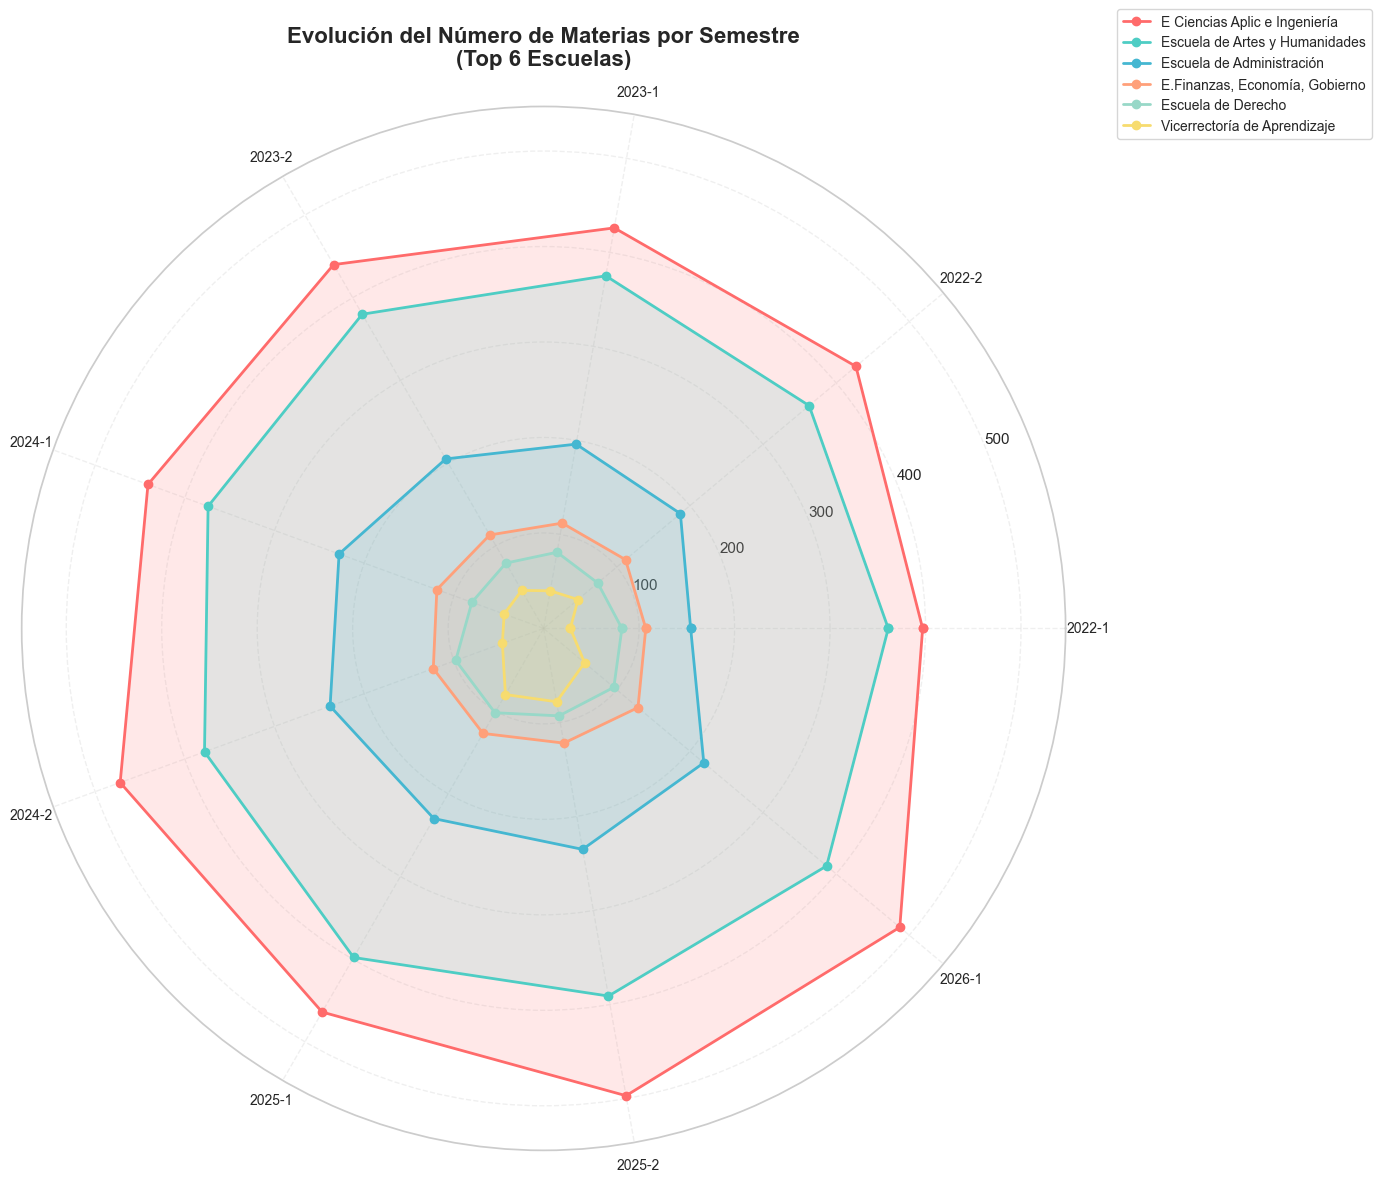


VISUALIZACIÓN 2: HEATMAP - TODAS LAS ESCUELAS


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\4221413151.py:115: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=0.25, right=0.95, top=0.95, bottom=0.15)


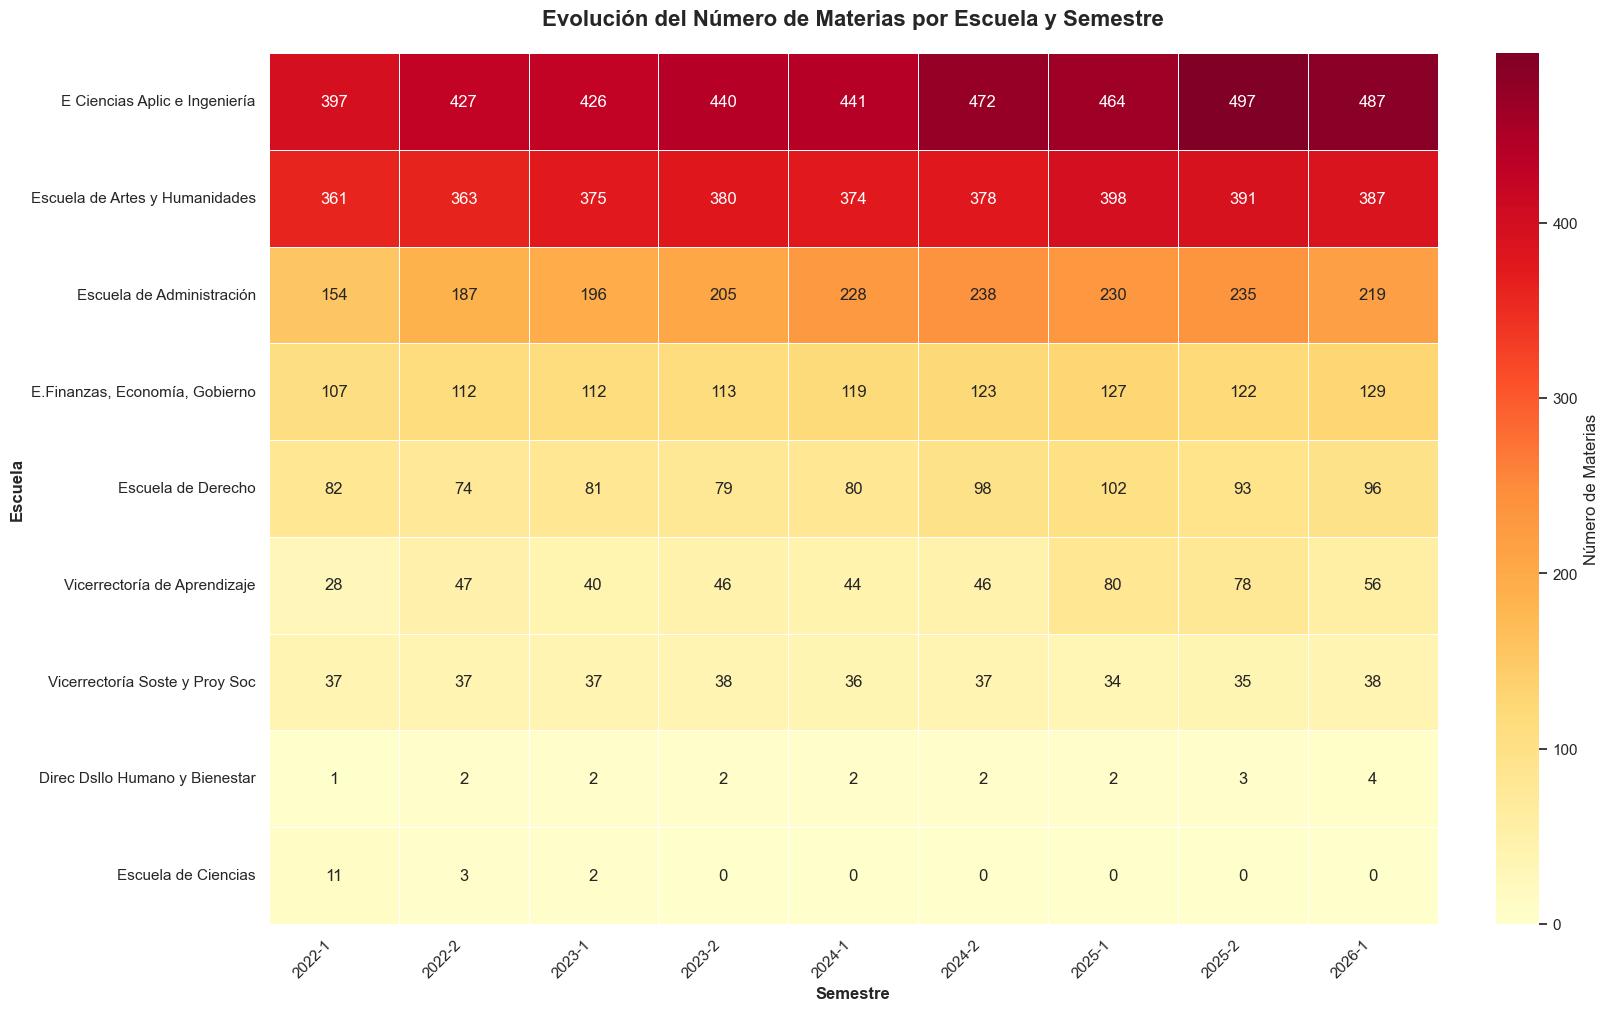


VISUALIZACIÓN 3: EVOLUCIÓN TEMPORAL - TOP 5 ESCUELAS


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\4221413151.py:139: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


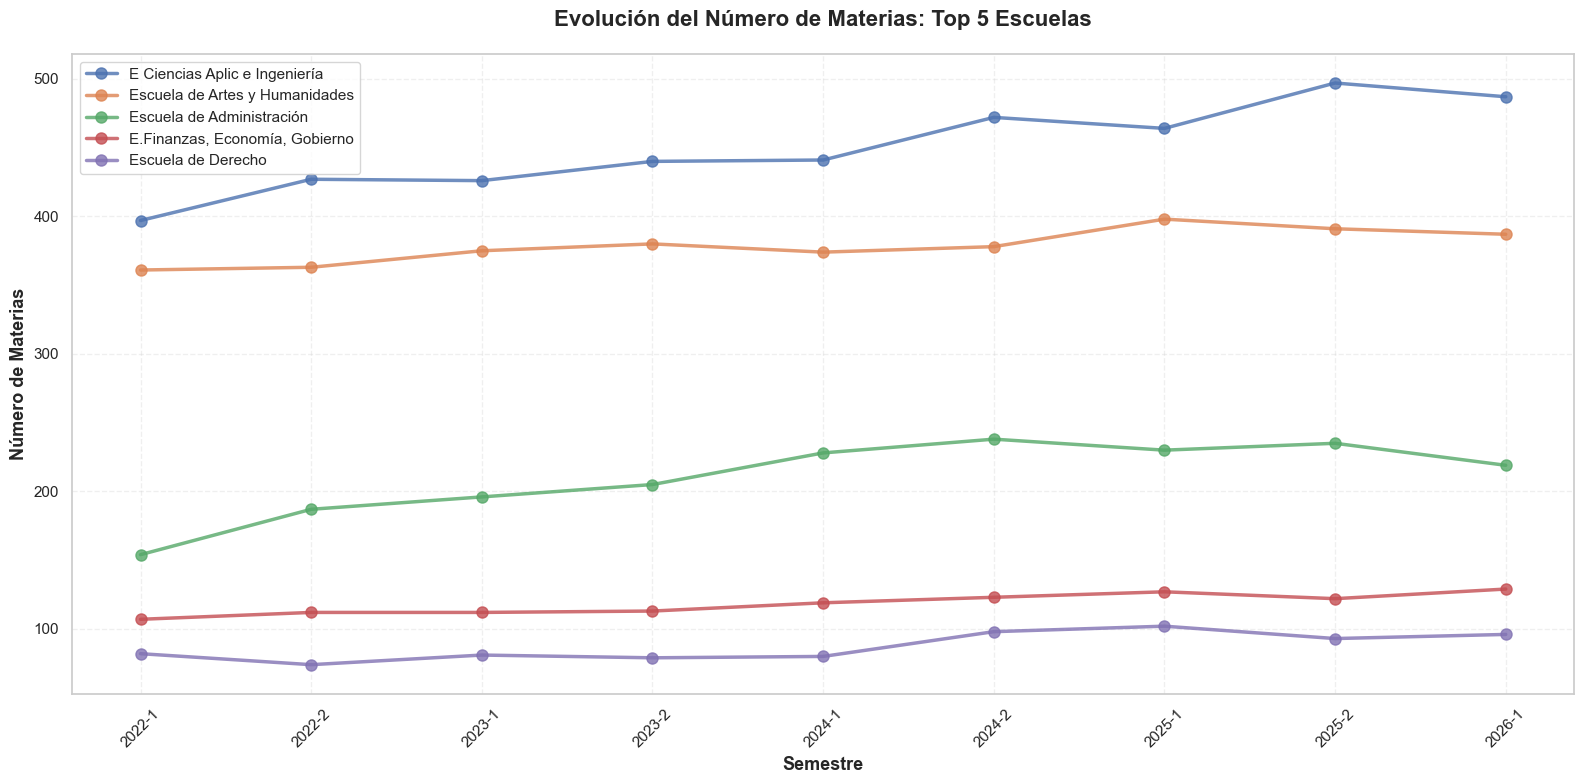


VISUALIZACIÓN 4: CAMBIO NETO EN NÚMERO DE MATERIAS


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\4221413151.py:170: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


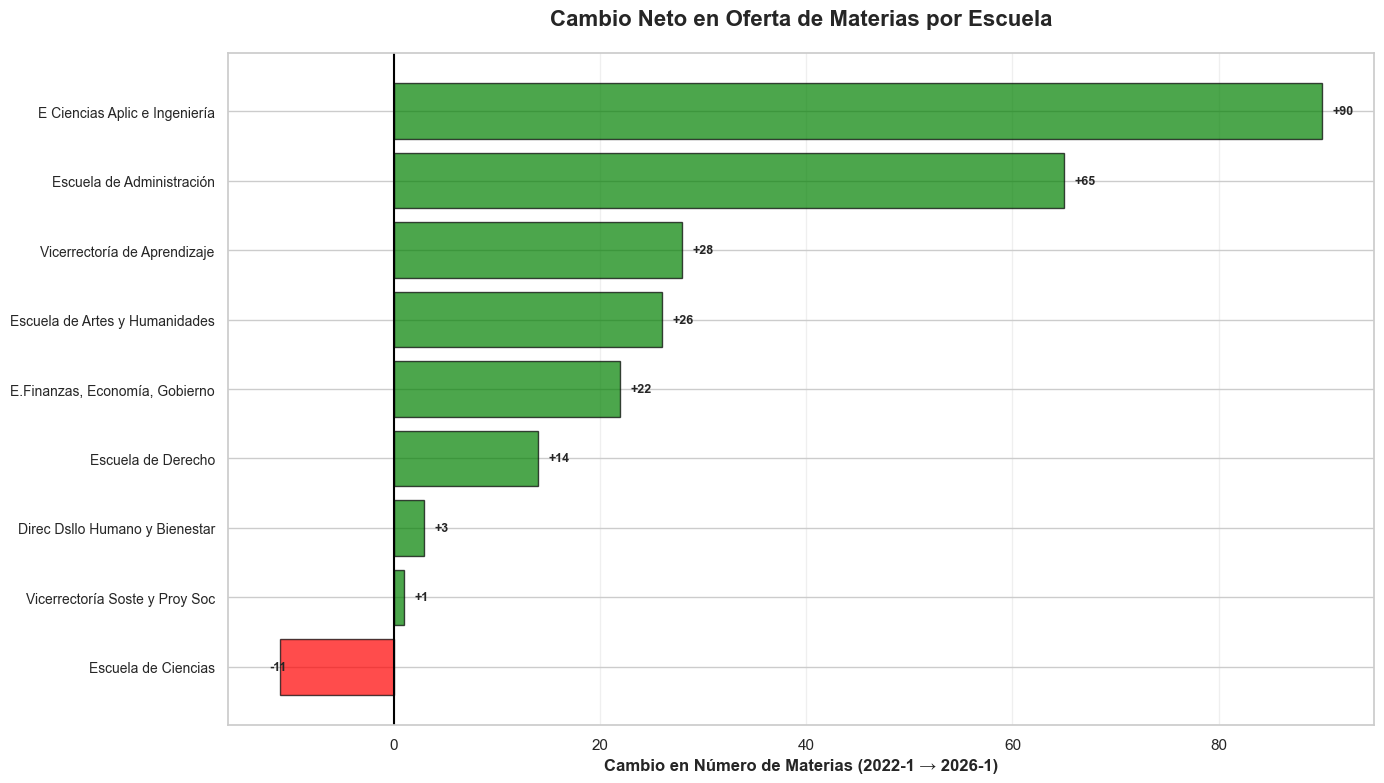


ANÁLISIS: ESCUELAS QUE MÁS HAN CERRADO MATERIAS

--- Top 5 Escuelas que más materias han cerrado ---

1. Escuela de Ciencias
   Primer semestre (2022-1): 11 materias
   Último semestre (2026-1): 0 materias
   Cambio: -11 materias (-100.0%)

ANÁLISIS: ESCUELAS QUE MÁS HAN ABIERTO MATERIAS

--- Top 5 Escuelas que más materias han abierto ---

1. E Ciencias Aplic e Ingeniería
   Primer semestre (2022-1): 397 materias
   Último semestre (2026-1): 487 materias
   Cambio: +90 materias (+22.7%)

2. Escuela de Administración
   Primer semestre (2022-1): 154 materias
   Último semestre (2026-1): 219 materias
   Cambio: +65 materias (+42.2%)

3. Vicerrectoría de Aprendizaje
   Primer semestre (2022-1): 28 materias
   Último semestre (2026-1): 56 materias
   Cambio: +28 materias (+100.0%)

4. Escuela de Artes y Humanidades
   Primer semestre (2022-1): 361 materias
   Último semestre (2026-1): 387 materias
   Cambio: +26 materias (+7.2%)

5. E.Finanzas, Economía, Gobierno
   Primer semestre (2022

In [74]:
print("="*80)
print("ANÁLISIS: EVOLUCIÓN DEL NÚMERO DE MATERIAS POR SEMESTRE Y ESCUELA")
print("="*80)

# 1. Contar materias únicas por semestre y escuela
materias_por_escuela_semestre = df_final.groupby(['Semestre', 'Escuela'])['Nombre Materia'].nunique().reset_index()
materias_por_escuela_semestre.columns = ['Semestre', 'Escuela', 'Num_Materias']

# 2. Tabla pivote para análisis
pivot_materias = materias_por_escuela_semestre.pivot(index='Escuela', columns='Semestre', values='Num_Materias')
pivot_materias = pivot_materias.fillna(0)

print("\n--- Número de Materias por Escuela y Semestre ---")
display(pivot_materias)

# 3. Calcular métricas clave por escuela
print("\n" + "="*80)
print("MÉTRICAS CLAVE POR ESCUELA")
print("="*80)

metricas_escuelas = pd.DataFrame({
    'Total_Promedio': pivot_materias.mean(axis=1),
    'Primer_Semestre': pivot_materias.iloc[:, 0],
    'Ultimo_Semestre': pivot_materias.iloc[:, -1],
    'Cambio_Absoluto': pivot_materias.iloc[:, -1] - pivot_materias.iloc[:, 0],
    'Cambio_Porcentual': ((pivot_materias.iloc[:, -1] - pivot_materias.iloc[:, 0]) / 
                          pivot_materias.iloc[:, 0] * 100).replace([np.inf, -np.inf], 0),
    'Max_Materias': pivot_materias.max(axis=1),
    'Min_Materias': pivot_materias.min(axis=1),
    'Desv_Std': pivot_materias.std(axis=1)
}).round(2)

# Identificar escuelas destacadas
escuela_mas_materias = metricas_escuelas['Total_Promedio'].idxmax()
escuela_menos_materias = metricas_escuelas['Total_Promedio'].idxmin()
escuela_mayor_crecimiento = metricas_escuelas['Cambio_Porcentual'].idxmax()
escuela_mayor_decrecimiento = metricas_escuelas['Cambio_Porcentual'].idxmin()

print("\n🏆 ESCUELAS DESTACADAS:")
print(f"\n  Más materias promedio: {escuela_mas_materias}")
print(f"    → Promedio: {metricas_escuelas.loc[escuela_mas_materias, 'Total_Promedio']:.1f} materias")
print(f"\n  Menos materias promedio: {escuela_menos_materias}")
print(f"    → Promedio: {metricas_escuelas.loc[escuela_menos_materias, 'Total_Promedio']:.1f} materias")
print(f"\n  Mayor crecimiento: {escuela_mayor_crecimiento}")
print(f"    → Cambio: {metricas_escuelas.loc[escuela_mayor_crecimiento, 'Cambio_Porcentual']:+.1f}%")
print(f"\n  Mayor decrecimiento: {escuela_mayor_decrecimiento}")
print(f"    → Cambio: {metricas_escuelas.loc[escuela_mayor_decrecimiento, 'Cambio_Porcentual']:+.1f}%")

print("\n--- Tabla Completa de Métricas ---")
display(metricas_escuelas.sort_values('Total_Promedio', ascending=False))

# 4. VISUALIZACIÓN 1: Diagrama de Araña (Radar Chart) por Escuela
print("\n" + "="*80)
print("VISUALIZACIÓN 1: DIAGRAMA DE ARAÑA - EVOLUCIÓN TEMPORAL")
print("="*80)

# Seleccionar top 6 escuelas por promedio de materias
top_escuelas = metricas_escuelas.nlargest(6, 'Total_Promedio').index.tolist()

# Preparar datos para radar chart
semestres = pivot_materias.columns.tolist()
num_vars = len(semestres)

# Calcular ángulos para cada semestre
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

# Crear figura
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=dict(projection='polar'))

# Colores para cada escuela
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

# Plotear cada escuela
for idx, escuela in enumerate(top_escuelas):
    values = pivot_materias.loc[escuela].tolist()
    values += values[:1]  # Cerrar el polígono
    
    ax.plot(angles, values, 'o-', linewidth=2, label=escuela, color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

# Configurar gráfico
ax.set_xticks(angles[:-1])
ax.set_xticklabels(semestres, size=10)
ax.set_ylim(0, max(pivot_materias.loc[top_escuelas].max()) * 1.1)
ax.set_title('Evolución del Número de Materias por Semestre\n(Top 6 Escuelas)', 
             size=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# 5. VISUALIZACIÓN 2: Heatmap de Evolución
print("\n" + "="*80)
print("VISUALIZACIÓN 2: HEATMAP - TODAS LAS ESCUELAS")
print("="*80)

fig, ax = plt.subplots(figsize=(16, 10))

# Ordenar escuelas por promedio de materias
pivot_sorted = pivot_materias.loc[metricas_escuelas.sort_values('Total_Promedio', ascending=False).index]

sns.heatmap(pivot_sorted, annot=True, fmt='.0f', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Número de Materias'},
            ax=ax)

ax.set_title('Evolución del Número de Materias por Escuela y Semestre', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Semestre', fontsize=12, fontweight='bold')
ax.set_ylabel('Escuela', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# CORREGIDO: Usar subplots_adjust en lugar de tight_layout para heatmaps
plt.subplots_adjust(left=0.25, right=0.95, top=0.95, bottom=0.15)
plt.show()

# 6. VISUALIZACIÓN 3: Gráfico de Líneas - Top 5 Escuelas
print("\n" + "="*80)
print("VISUALIZACIÓN 3: EVOLUCIÓN TEMPORAL - TOP 5 ESCUELAS")
print("="*80)

fig, ax = plt.subplots(figsize=(16, 8))

top5_escuelas = metricas_escuelas.nlargest(5, 'Total_Promedio').index.tolist()

for escuela in top5_escuelas:
    valores = pivot_materias.loc[escuela]
    ax.plot(valores.index, valores.values, marker='o', linewidth=2.5, 
            markersize=8, label=escuela, alpha=0.8)

ax.set_title('Evolución del Número de Materias: Top 5 Escuelas', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Semestre', fontsize=13, fontweight='bold')
ax.set_ylabel('Número de Materias', fontsize=13, fontweight='bold')
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. VISUALIZACIÓN 4: Cambio Absoluto (Barras)
print("\n" + "="*80)
print("VISUALIZACIÓN 4: CAMBIO NETO EN NÚMERO DE MATERIAS")
print("="*80)

fig, ax = plt.subplots(figsize=(14, 8))

# Ordenar por cambio absoluto
cambios_ordenados = metricas_escuelas.sort_values('Cambio_Absoluto')

# Colores: rojo para negativo, verde para positivo
colors = ['red' if x < 0 else 'green' for x in cambios_ordenados['Cambio_Absoluto']]

ax.barh(range(len(cambios_ordenados)), cambios_ordenados['Cambio_Absoluto'], 
        color=colors, alpha=0.7, edgecolor='black')
ax.set_yticks(range(len(cambios_ordenados)))
ax.set_yticklabels(cambios_ordenados.index, fontsize=10)
ax.axvline(0, color='black', linewidth=1.5, linestyle='-')
ax.set_xlabel('Cambio en Número de Materias (2022-1 → 2026-1)', fontsize=12, fontweight='bold')
ax.set_title('Cambio Neto en Oferta de Materias por Escuela', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

# Anotar valores
for i, (idx, row) in enumerate(cambios_ordenados.iterrows()):
    valor = row['Cambio_Absoluto']
    ax.text(valor + (1 if valor > 0 else -1), i, f'{valor:+.0f}', 
            va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# 8. ANÁLISIS DE CIERRE DE MATERIAS
print("\n" + "="*80)
print("ANÁLISIS: ESCUELAS QUE MÁS HAN CERRADO MATERIAS")
print("="*80)

# Materias que cerraron = diferencia negativa
escuelas_que_cerraron = metricas_escuelas[metricas_escuelas['Cambio_Absoluto'] < 0].sort_values('Cambio_Absoluto')

print("\n--- Top 5 Escuelas que más materias han cerrado ---")
for idx, (escuela, data) in enumerate(escuelas_que_cerraron.head(5).iterrows(), 1):
    print(f"\n{idx}. {escuela}")
    print(f"   Primer semestre (2022-1): {data['Primer_Semestre']:.0f} materias")
    print(f"   Último semestre (2026-1): {data['Ultimo_Semestre']:.0f} materias")
    print(f"   Cambio: {data['Cambio_Absoluto']:+.0f} materias ({data['Cambio_Porcentual']:+.1f}%)")

# 9. ANÁLISIS DE APERTURA DE MATERIAS
print("\n" + "="*80)
print("ANÁLISIS: ESCUELAS QUE MÁS HAN ABIERTO MATERIAS")
print("="*80)

escuelas_que_abrieron = metricas_escuelas[metricas_escuelas['Cambio_Absoluto'] > 0].sort_values('Cambio_Absoluto', ascending=False)

print("\n--- Top 5 Escuelas que más materias han abierto ---")
for idx, (escuela, data) in enumerate(escuelas_que_abrieron.head(5).iterrows(), 1):
    print(f"\n{idx}. {escuela}")
    print(f"   Primer semestre (2022-1): {data['Primer_Semestre']:.0f} materias")
    print(f"   Último semestre (2026-1): {data['Ultimo_Semestre']:.0f} materias")
    print(f"   Cambio: {data['Cambio_Absoluto']:+.0f} materias ({data['Cambio_Porcentual']:+.1f}%)")

# 10. RESUMEN EJECUTIVO
print("\n" + "="*80)
print("RESUMEN EJECUTIVO")
print("="*80)

total_materias_inicial = pivot_materias.iloc[:, 0].sum()
total_materias_final = pivot_materias.iloc[:, -1].sum()
cambio_total = total_materias_final - total_materias_inicial

print(f"\n📊 EVOLUCIÓN GENERAL:")
print(f"   Total de materias ofertadas en 2022-1: {total_materias_inicial:.0f}")
print(f"   Total de materias ofertadas en 2026-1: {total_materias_final:.0f}")
print(f"   Cambio neto: {cambio_total:+.0f} materias ({(cambio_total/total_materias_inicial*100):+.2f}%)")

print(f"\n📈 CRECIMIENTO:")
print(f"   Escuelas que abrieron materias: {len(escuelas_que_abrieron)}")
print(f"   Nuevas materias totales: {escuelas_que_abrieron['Cambio_Absoluto'].sum():+.0f}")

print(f"\n📉 DECRECIMIENTO:")
print(f"   Escuelas que cerraron materias: {len(escuelas_que_cerraron)}")
print(f"   Materias cerradas totales: {escuelas_que_cerraron['Cambio_Absoluto'].sum():+.0f}")

print(f"\n⚖️ ESTABILIDAD:")
escuelas_estables = metricas_escuelas[metricas_escuelas['Cambio_Absoluto'] == 0]
print(f"   Escuelas sin cambio: {len(escuelas_estables)}")
if len(escuelas_estables) > 0:
    print(f"   Escuelas: {', '.join(escuelas_estables.index.tolist())}")

print("\n" + "="*80)


**Análisis evolución Escuelas**

Con el gráfico d eparche observamos que el dominio absoluto en término de crecimiento es la Escuela de Ciencia Aplicadas e Ingeniería, siguiendolo Artes y Humanidades. Además, se visualiza un máximo absoluto de crecimeinto en las materias en 2025-2, probablemente por una re-estructuración académica.

Con el gráfico del heatmap e sinteresante observar como la Escuela de Ciencias desapareción en 2022, y que las Escuelas que han permanecido con un crecimiento estable y moderado en el tiempo son Escuela de Finanzas, Economía y Gobierno y Esceula de Derecho, al igual que las Vicerrectorías que para terminos de las bases de datos eran tomadas como Escuelas en als bases de datos de registro académico.

De todo el análisis se puede concluir:
- Ciencias Aplicadas e Ingeniería con un crecimiento sostenido.
- Artes y Humanidades tiene una estabilidad con leve crecimiento.
- Administración ha tenido una expansión significativa.
- Finanzas/Economía/Gobierno ha tenido un crecimiento gradual
- Derecho tiene un creciemiento descrito como montaña rusa controlada, por sus caídas en el número de materias y por el aumento de materias.



##### 5.1.2. Evolución Temporal de la Demanda Estudiantil:
Se examina la tendencia general del total de estudiantes inscritos a lo largo de los nueve semestres mediante un gráfico de líneas. Este análisis permite identificar si existe crecimiento, decrecimiento o estabilidad en la población estudiantil, así como posibles puntos de inflexión que requieran investigación adicional.

Pregunta clave: ¿Está creciendo o disminuyendo la demanda estudiantil general?

Total de estudiantes inscritos por semestre:


Semestre
2022-1    45564
2022-2    45611
2023-1    47689
2023-2    47376
2024-1    50882
2024-2    51156
2025-1    76363
2025-2    56574
2026-1    61440
Name: Total_Inscritos, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\1544526181.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


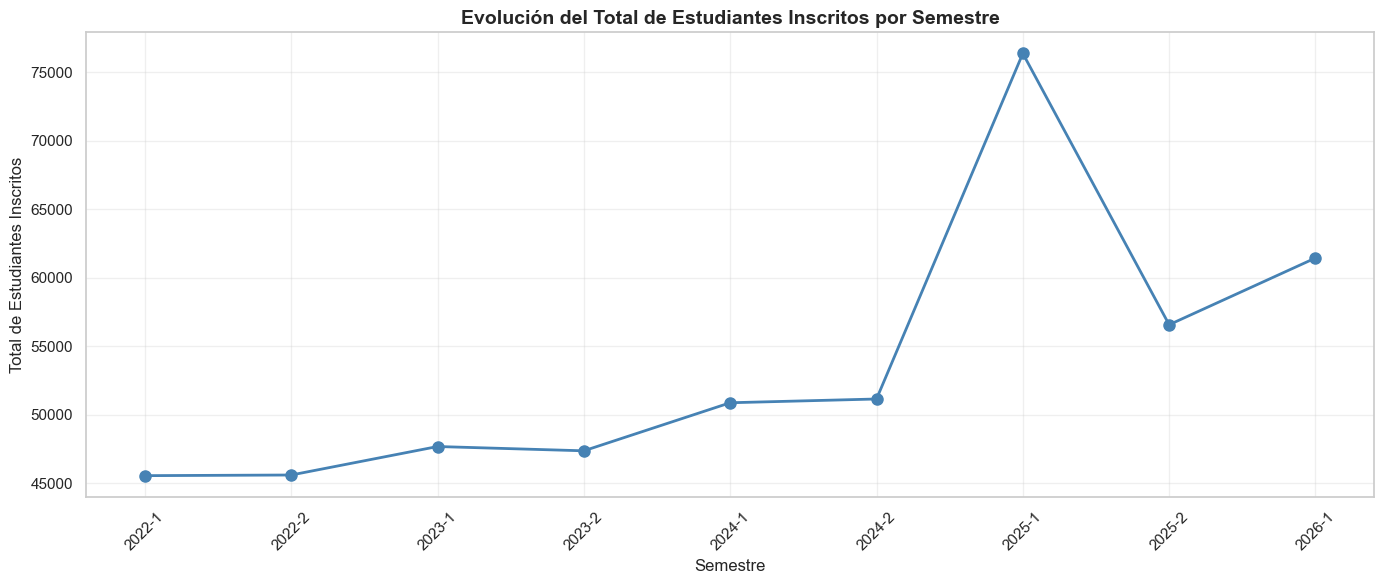


Tendencia general: +15876 estudiantes
Cambio porcentual total: +34.84%


In [75]:
# Agrupar total de estudiantes por semestre
estudiantes_por_semestre = df_final.groupby('Semestre')['Total_Inscritos'].sum().sort_index()

print("Total de estudiantes inscritos por semestre:")
display(estudiantes_por_semestre)

# Gráfico de líneas
plt.figure(figsize=(14, 6))
plt.plot(estudiantes_por_semestre.index, estudiantes_por_semestre.values, 
         marker='o', linewidth=2, markersize=8, color='steelblue')
plt.title('Evolución del Total de Estudiantes Inscritos por Semestre', fontsize=14, fontweight='bold')
plt.xlabel('Semestre', fontsize=12)
plt.ylabel('Total de Estudiantes Inscritos', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcular tendencia
print(f"\nTendencia general: {estudiantes_por_semestre.iloc[-1] - estudiantes_por_semestre.iloc[0]:+.0f} estudiantes")
print(f"Cambio porcentual total: {((estudiantes_por_semestre.iloc[-1] / estudiantes_por_semestre.iloc[0]) - 1) * 100:+.2f}%")

##### 5.1.3. Clasificación de Materias por Patrón de Oferta Semestral
Se clasifican las materias según su patrón de oferta:

- Solo Semestre-1: Materias que históricamente se ofertan únicamente en el primer semestre del año.
- Solo Semestre-2: Materias que solo se abren en el segundo semestre.
- Ambos Semestres: Materias con oferta recurrente en ambos periodos.


Este análisis es crucial para validar la estrategia de división de datos train/test, ya que si existen muchas materias anualizadas, será necesario incluir múltiples semestres en el conjunto de prueba para garantizar una evaluación representativa del modelo.

Pregunta clave: ¿Qué proporción de materias tiene oferta estacional vs continua?

Clasificación de Materias según Oferta Semestral:


Tipo Oferta
Ambos Semestres    1750
Solo Semestre-1     300
Solo Semestre-2     130
Name: count, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\3804386967.py:50: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


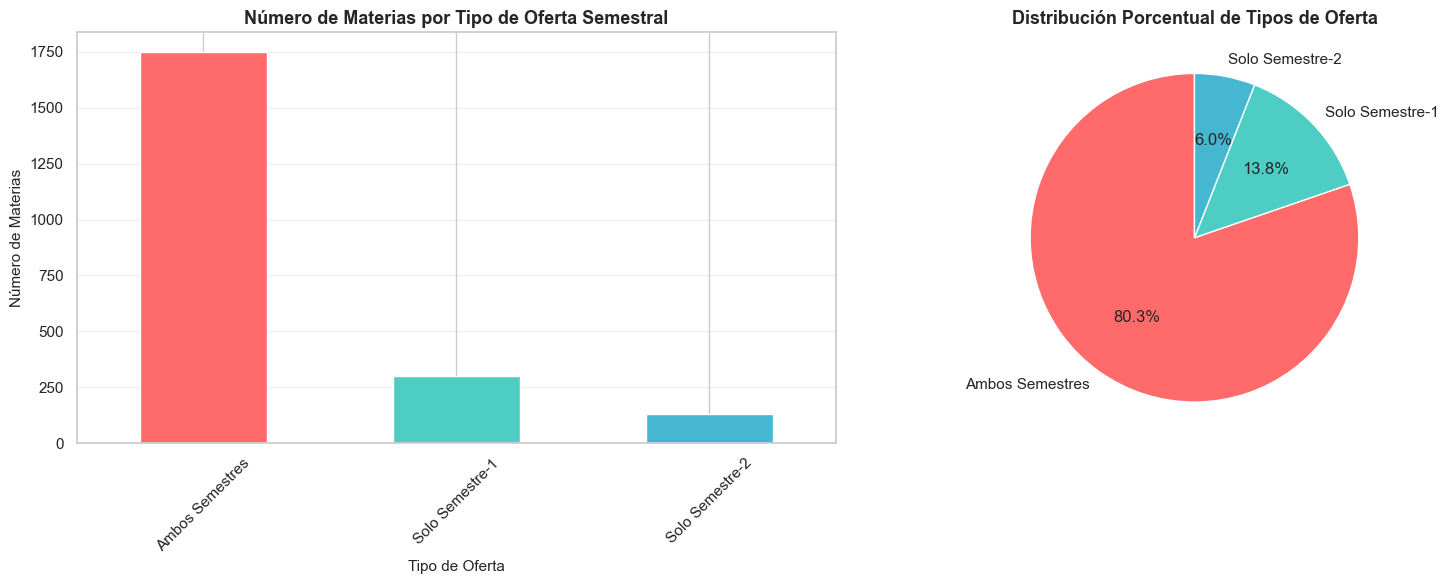


--- Ejemplos de Materias por Tipo ---

Ambos Semestres:
  -  Estudios de Liter. Colomb.
  -  Probl. Contempor. de Hermen.
  - 2 Umes Consultorio Jurídico
  - 3 Créd. Intersemestral Fi0116
  - 3 Créditos Intersemestral

Solo Semestre-1:
  -  D.I.H. y Crímenes de Guerra.
  - 1 Crédito Línea Énfasis - ldth
  - 2 Umes Consultorio Jurídico II
  - Acciones Correctivo Modificati
  - Anális Datos para Produ Conten

Solo Semestre-2:
  - 3 Créditos Línea Énfasis Oygt
  - Acciones constitucionales
  - Arquitectura Organizacional
  - Autoría y Partic. en Der Penal
  - CONVENIO NACIONAL 083

VALIDACIÓN PARA DIVISIÓN TRAIN/TEST
Materias anualizadas (solo sem-1 o sem-2): 430
Materias totales: 2180
Porcentaje de materias anualizadas: 19.72%

NOTA: Si hay muchas materias anualizadas, dejar los últimos 2 semestres
para test garantiza que se evalúe en datos de todas las materias.


In [76]:
# Identificar en qué semestres se ofrece cada materia
materias_semestres = df_final.groupby('Nombre Materia')['Semestre'].apply(list).to_dict()

# Clasificar materias según patrón semestral
def clasificar_materia(semestres):
    """Clasifica materias según cuándo se ofertan"""
    solo_1 = all('-1' in sem for sem in semestres)  # Solo primer semestre
    solo_2 = all('-2' in sem for sem in semestres)  # Solo segundo semestre
    ambos = any('-1' in sem for sem in semestres) and any('-2' in sem for sem in semestres)
    
    if solo_1:
        return 'Solo Semestre-1'
    elif solo_2:
        return 'Solo Semestre-2'
    elif ambos:
        return 'Ambos Semestres'
    else:
        return 'Otro'

# Aplicar clasificación
clasificacion = {}
for materia, semestres in materias_semestres.items():
    clasificacion[materia] = clasificar_materia(semestres)

clasificacion_df = pd.DataFrame(list(clasificacion.items()), 
                                columns=['Nombre Materia', 'Tipo Oferta'])

# Contar por tipo
resumen_tipo = clasificacion_df['Tipo Oferta'].value_counts()

print("Clasificación de Materias según Oferta Semestral:")
display(resumen_tipo)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
resumen_tipo.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Número de Materias por Tipo de Oferta Semestral', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Tipo de Oferta', fontsize=11)
axes[0].set_ylabel('Número de Materias', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Gráfico de pastel
axes[1].pie(resumen_tipo.values, labels=resumen_tipo.index, autopct='%1.1f%%', 
            startangle=90, colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('Distribución Porcentual de Tipos de Oferta', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar algunas materias de cada tipo
print("\n--- Ejemplos de Materias por Tipo ---")
for tipo in resumen_tipo.index:
    materias_ejemplo = clasificacion_df[clasificacion_df['Tipo Oferta'] == tipo]['Nombre Materia'].head(5).tolist()
    print(f"\n{tipo}:")
    for mat in materias_ejemplo:
        print(f"  - {mat}")

# Validación para test
print("\n" + "="*70)
print("VALIDACIÓN PARA DIVISIÓN TRAIN/TEST")
print("="*70)
materias_anulizadas = clasificacion_df[clasificacion_df['Tipo Oferta'] != 'Ambos Semestres']['Nombre Materia'].nunique()
total_materias = clasificacion_df['Nombre Materia'].nunique()
print(f"Materias anualizadas (solo sem-1 o sem-2): {materias_anulizadas}")
print(f"Materias totales: {total_materias}")
print(f"Porcentaje de materias anualizadas: {(materias_anulizadas/total_materias)*100:.2f}%")
print("\nNOTA: Si hay muchas materias anualizadas, dejar los últimos 2 semestres")
print("para test garantiza que se evalúe en datos de todas las materias.")

Al identificar que efectivamente existen materias anualizadas, vamos a crear una columna dummy en nestro dataframe. Nueva columna categórica:
- 0: Ambos Semestres (mayoría)
- 1: Solo Semestre-1 (300 casos)
- 2: Solo Semestre-2 (130 casos)

In [77]:
# Mapear la clasificación al dataframe usando el diccionario 'clasificacion' ya creado
df_final['Tipo_Oferta'] = df_final['Nombre Materia'].map(clasificacion)

# Crear versión numérica codificada
tipo_oferta_map = {
    'Ambos Semestres': 0,
    'Solo Semestre-1': 1,
    'Solo Semestre-2': 2
}
df_final['Tipo_Oferta_Cod'] = df_final['Tipo_Oferta'].map(tipo_oferta_map)

# Verificar que se crearon correctamente
print("="*80)
print("✅ COLUMNAS AGREGADAS EXITOSAMENTE")
print("="*80)

print("\n--- Distribución de Tipo_Oferta_Cod ---")
print(df_final['Tipo_Oferta_Cod'].value_counts().sort_index())

print("\n--- Mapeo de códigos ---")
print("  0 = Ambos Semestres (90.7%)")
print("  1 = Solo Semestre-1 (8.1%)")
print("  2 = Solo Semestre-2 (1.2%)")

# Verificar valores nulos
print(f"\nValores nulos en Tipo_Oferta: {df_final['Tipo_Oferta'].isna().sum()}")
print(f"Valores nulos en Tipo_Oferta_Cod: {df_final['Tipo_Oferta_Cod'].isna().sum()}")

# Mostrar primeras filas para verificar
print("\n--- Muestra del dataframe con nuevas columnas ---")
display(df_final[['Nombre Materia', 'Semestre', 'Total_Inscritos', 'Tipo_Oferta', 'Tipo_Oferta_Cod']].head(10))

# Mostrar estructura actualizada
print("\n--- Columnas del dataframe actualizado ---")
print(df_final.columns.tolist())

✅ COLUMNAS AGREGADAS EXITOSAMENTE

--- Distribución de Tipo_Oferta_Cod ---
Tipo_Oferta_Cod
0    11950
1      447
2      210
Name: count, dtype: int64

--- Mapeo de códigos ---
  0 = Ambos Semestres (90.7%)
  1 = Solo Semestre-1 (8.1%)
  2 = Solo Semestre-2 (1.2%)

Valores nulos en Tipo_Oferta: 0
Valores nulos en Tipo_Oferta_Cod: 0

--- Muestra del dataframe con nuevas columnas ---


,Nombre Materia,Semestre,Total_Inscritos,Tipo_Oferta,Tipo_Oferta_Cod
0,Procesos Fisicoquímicos,2022-1,14,Ambos Semestres,0
1,Fenómenos Quím. y Laboratorio,2022-1,96,Ambos Semestres,0
2,Agrobioquímica,2022-1,9,Ambos Semestres,0
3,Química Orgánica y Laboratorio,2022-1,16,Ambos Semestres,0
4,Fisicoquímica y Laboratorio,2022-1,14,Ambos Semestres,0
5,Genética Molecular y Biotecno.,2022-1,12,Ambos Semestres,0
6,Biología,2022-1,22,Ambos Semestres,0
7,Biología,2022-1,17,Ambos Semestres,0
8,Biología,2022-1,38,Ambos Semestres,0
9,Fundamentos de Fisicoquímica,2022-1,27,Ambos Semestres,0



--- Columnas del dataframe actualizado ---
['Semestre', 'Código Materia', 'Nombre Materia', 'Escuela', 'first_semester', 'Lab', 'Pre_registro', 'tasa_reprobación_lag', 'Total_Inscritos', '%_Cupos_No_Usados', 'G_Abiertos', 'G_Final', 'is_missing_prereg', 'is_missing_lag', 'Tipo_Oferta', 'Tipo_Oferta_Cod']


Entonces vemos que es correcto usar los semestres 2025-2 y 2026-1 como test del modelo predictivo. El dataframe ahora se ve así:

In [78]:
df_final.head(50)

,Semestre,Código Materia,Nombre Materia,Escuela,first_semester,Lab,Pre_registro,tasa_reprobación_lag,Total_Inscritos,%_Cupos_No_Usados,G_Abiertos,G_Final,is_missing_prereg,is_missing_lag,Tipo_Oferta,Tipo_Oferta_Cod
0,2022-1,BI0045,Procesos Fisicoquímicos,E Ciencias Aplic e Ingeniería,0,1,NaN,0.0000,14,0.00,1,1,True,False,Ambos Semestres,0
1,2022-1,BI0230,Fenómenos Quím. y Laboratorio,E Ciencias Aplic e Ingeniería,1,1,NaN,0.0000,96,0.11,6,5,True,False,Ambos Semestres,0
2,2022-1,BI0231,Agrobioquímica,E Ciencias Aplic e Ingeniería,0,1,NaN,0.0625,9,0.18,1,1,True,False,Ambos Semestres,0
3,2022-1,BI0232,Química Orgánica y Laboratorio,E Ciencias Aplic e Ingeniería,0,1,NaN,0.0645,16,0.67,3,3,True,False,Ambos Semestres,0
4,2022-1,BI0235,Fisicoquímica y Laboratorio,E Ciencias Aplic e Ingeniería,0,1,NaN,NaN,14,0.18,1,1,True,True,Ambos Semestres,0
5,2022-1,BI0236,Genética Molecular y Biotecno.,E Ciencias Aplic e Ingeniería,0,0,NaN,0.0000,12,0.66,1,1,True,False,Ambos Semestres,0
6,2022-1,BI0242,Biología,E Ciencias Aplic e Ingeniería,0,0,NaN,0.1379,22,0.37,1,1,True,False,Ambos Semestres,0
7,2022-1,BI0243,Biología,E Ciencias Aplic e Ingeniería,1,0,NaN,0.1429,17,0.51,1,1,True,False,Ambos Semestres,0
8,2022-1,BI0244,Biología,E Ciencias Aplic e Ingeniería,0,0,NaN,NaN,38,0.10,2,1,True,True,Ambos Semestres,0
9,2022-1,BI0265,Fundamentos de Fisicoquímica,E Ciencias Aplic e Ingeniería,0,1,NaN,0.0667,27,0.32,1,1,True,False,Ambos Semestres,0


##### 5.1.4. Tasa de Cambio en Población Estudiantil por Materia
Se calcula el porcentaje promedio de crecimiento o decrecimiento en la inscripción de cada materia entre semestres consecutivos. Este análisis identifica:

- Materias en declive (decrecimiento sostenido)
- Materias en auge (crecimiento sostenido)
- Materias estables (sin cambios significativos)

Esta información es valiosa para entender la dinámica de demanda a nivel micro y puede servir como feature para el modelo predictivo.

Pregunta clave: ¿Qué materias están ganando o perdiendo popularidad?

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\1196117171.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  decrecimiento_por_materia = df_final.groupby('Nombre Materia').apply(


Estadísticas del Cambio Promedio en Población Estudiantil:
count    1875.000000
mean       50.327539
std       168.435111
min       -98.333333
25%        -1.339615
50%        12.197026
75%        41.724537
max      2563.888417
Name: Cambio_Promedio_%, dtype: float64

Cambio promedio general: 50.33%


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\1196117171.py:71: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


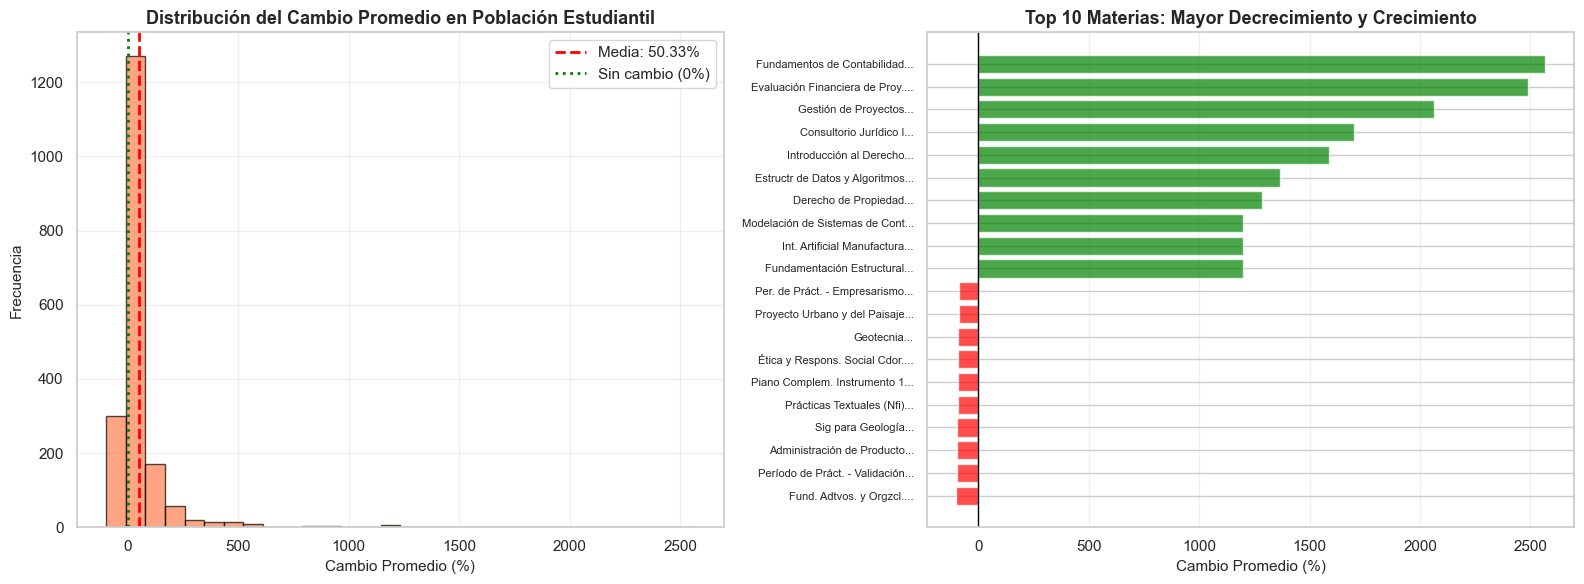


--- Top 10 Materias con Mayor Decrecimiento ---


,Nombre Materia,Cambio_Promedio_%
820,Fund. Adtvos. y Orgzcl.,-98.333333
1457,Período de Práct. - Validación,-97.752809
30,Administración de Producto,-97.183099
1816,Sig para Geología,-94.117647
1700,Prácticas Textuales (Nfi),-92.640333
1466,Piano Complem. Instrumento 1,-91.666667
2174,Ética y Respons. Social Cdor.,-91.666667
904,Geotecnia,-90.000000
1657,Proyecto Urbano y del Paisaje,-88.888889
1444,Per. de Práct. - Empresarismo,-87.500000



--- Top 10 Materias con Mayor Crecimiento ---


,Nombre Materia,Cambio_Promedio_%
836,Fundamentos de Contabilidad,2563.888417
777,Evaluación Financiera de Proy.,2490.162439
935,Gestión de Proyectos,2065.154154
259,Consultorio Jurídico I,1700.000000
1113,Introducción al Derecho,1585.926616
753,Estructr de Datos y Algoritmos,1366.465863
374,Derecho de Propiedad,1286.045152
1071,Int. Artificial Manufactura,1200.000000
1288,Modelación de Sistemas de Cont,1200.000000
829,Fundamentación Estructural,1198.536036



--- Clasificación de Materias ---
Materias en crecimiento: 1255 (66.9%)
Materias en decrecimiento: 505 (26.9%)
Materias estables: 115 (6.1%)


In [79]:
# Calcular cambio en población estudiantil por materia a lo largo del tiempo
def calcular_decrecimiento_materia(df_materia):
    """Calcula el decrecimiento promedio de una materia"""
    df_sorted = df_materia.sort_values('Semestre')
    if len(df_sorted) < 2:
        return np.nan
    
    # Calcular cambios porcentuales entre semestres consecutivos
    cambios = []
    for i in range(1, len(df_sorted)):
        actual = df_sorted.iloc[i]['Total_Inscritos']
        anterior = df_sorted.iloc[i-1]['Total_Inscritos']
        
        if anterior > 0:  # Evitar división por cero
            cambio_porcentual = ((actual - anterior) / anterior) * 100
            cambios.append(cambio_porcentual)
    
    return np.mean(cambios) if cambios else np.nan

# Aplicar a cada materia
decrecimiento_por_materia = df_final.groupby('Nombre Materia').apply(
    calcular_decrecimiento_materia
).reset_index()
decrecimiento_por_materia.columns = ['Nombre Materia', 'Cambio_Promedio_%']

# Eliminar NaN
decrecimiento_por_materia = decrecimiento_por_materia.dropna()

print("Estadísticas del Cambio Promedio en Población Estudiantil:")
print(decrecimiento_por_materia['Cambio_Promedio_%'].describe())

# Promedio general
promedio_cambio = decrecimiento_por_materia['Cambio_Promedio_%'].mean()
print(f"\nCambio promedio general: {promedio_cambio:.2f}%")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma
axes[0].hist(decrecimiento_por_materia['Cambio_Promedio_%'], bins=30, 
             color='coral', edgecolor='black', alpha=0.7)
axes[0].axvline(promedio_cambio, color='red', linestyle='--', linewidth=2, 
                label=f'Media: {promedio_cambio:.2f}%')
axes[0].axvline(0, color='green', linestyle=':', linewidth=2, label='Sin cambio (0%)')
axes[0].set_title('Distribución del Cambio Promedio en Población Estudiantil', 
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Cambio Promedio (%)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Top 10 materias con mayor decrecimiento y crecimiento
top_decrecimiento = decrecimiento_por_materia.nsmallest(10, 'Cambio_Promedio_%')
top_crecimiento = decrecimiento_por_materia.nlargest(10, 'Cambio_Promedio_%')

combined = pd.concat([top_decrecimiento, top_crecimiento]).sort_values('Cambio_Promedio_%')
colors = ['red' if x < 0 else 'green' for x in combined['Cambio_Promedio_%']]

# Truncar nombres largos para mejor visualización
combined['Nombre_Corto'] = combined['Nombre Materia'].str[:30] + '...'

axes[1].barh(range(len(combined)), combined['Cambio_Promedio_%'], color=colors, alpha=0.7)
axes[1].set_yticks(range(len(combined)))
axes[1].set_yticklabels(combined['Nombre_Corto'], fontsize=8)
axes[1].set_title('Top 10 Materias: Mayor Decrecimiento y Crecimiento', 
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Cambio Promedio (%)', fontsize=11)
axes[1].axvline(0, color='black', linestyle='-', linewidth=1)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Mostrar tabla completa de top 10
print("\n--- Top 10 Materias con Mayor Decrecimiento ---")
display(top_decrecimiento[['Nombre Materia', 'Cambio_Promedio_%']])

print("\n--- Top 10 Materias con Mayor Crecimiento ---")
display(top_crecimiento[['Nombre Materia', 'Cambio_Promedio_%']])

# Clasificar materias
print("\n--- Clasificación de Materias ---")
crecientes = (decrecimiento_por_materia['Cambio_Promedio_%'] > 0).sum()
decrecientes = (decrecimiento_por_materia['Cambio_Promedio_%'] < 0).sum()
estables = (decrecimiento_por_materia['Cambio_Promedio_%'] == 0).sum()

print(f"Materias en crecimiento: {crecientes} ({crecientes/len(decrecimiento_por_materia)*100:.1f}%)")
print(f"Materias en decrecimiento: {decrecientes} ({decrecientes/len(decrecimiento_por_materia)*100:.1f}%)")
print(f"Materias estables: {estables} ({estables/len(decrecimiento_por_materia)*100:.1f}%)")

**Análisis**

El gráfico de  Distribución del Cambio Promedio (Histograma) nos presenta que más de 800 amterias están en un rango de cambio de 0-10%, lo que nos muestra que la mayoría de las materias tienen un cambio moderado (estables año tras año). Sin embargo la cola hacia la derecha nos muestra que hay materias con gran popularidad como es el caso de 'Evaluación Financiera de Proyectos' que creció 2.490%.

De la mediana (8.84%)  y medía (34.79%) se analiza que las materias con alta popularidad recientemente hacen que la media se eleve, y que por el contrario la mediana los habla del crecimiento de aquellas materias típicas con un crecimiento ~9% (crecimiento modesto).

Interpretación por cuartiles:

25% inferior (Q1): Materias en declive (-7.6% promedio)  
50% central: Materias relativamente estables (-7.6% a +35%)  
25% superior (Q3): Materias en auge (+35% o más)  

Desviación estándar GIGANTE (145%):

Es más de 4 veces el promedio (34.79%)  
Significa: Hay materias con comportamientos MUY diferentes  
No se puede hablar de una "materia típica" porque hay extrema diversidad

##### 5.1.5. Análisis de Distribución mediante Boxplots por Semestre
Se generan boxplots para cada variable numérica clave, organizados por semestre, permitiendo:

1. Identificar tendencias de la mediana a lo largo del tiempo
2. Detectar cambios en la variabilidad (altura de las cajas)
3. Localizar outliers que representen casos extremos
4. Comparar patrones entre diferentes periodos académicos

Este análisis visual es especialmente útil para detectar anomalías, evaluar la estabilidad temporal de las variables y justificar decisiones sobre transformaciones o exclusión de variables.

Pregunta clave: ¿Cómo evoluciona la distribución de cada variable en el tiempo?

Decisión crítica: La variable G_Final se analiza pero posteriormente se descarta del modelado debido a:

- Variabilidad casi nula (CV < 5%)
- Ausencia de patrones temporales informativos
- Alta correlación con G_Abiertos (redundancia)
- Bajo poder predictivo para la variable objetivo

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\2780311334.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_por_semestre,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\2780311334.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


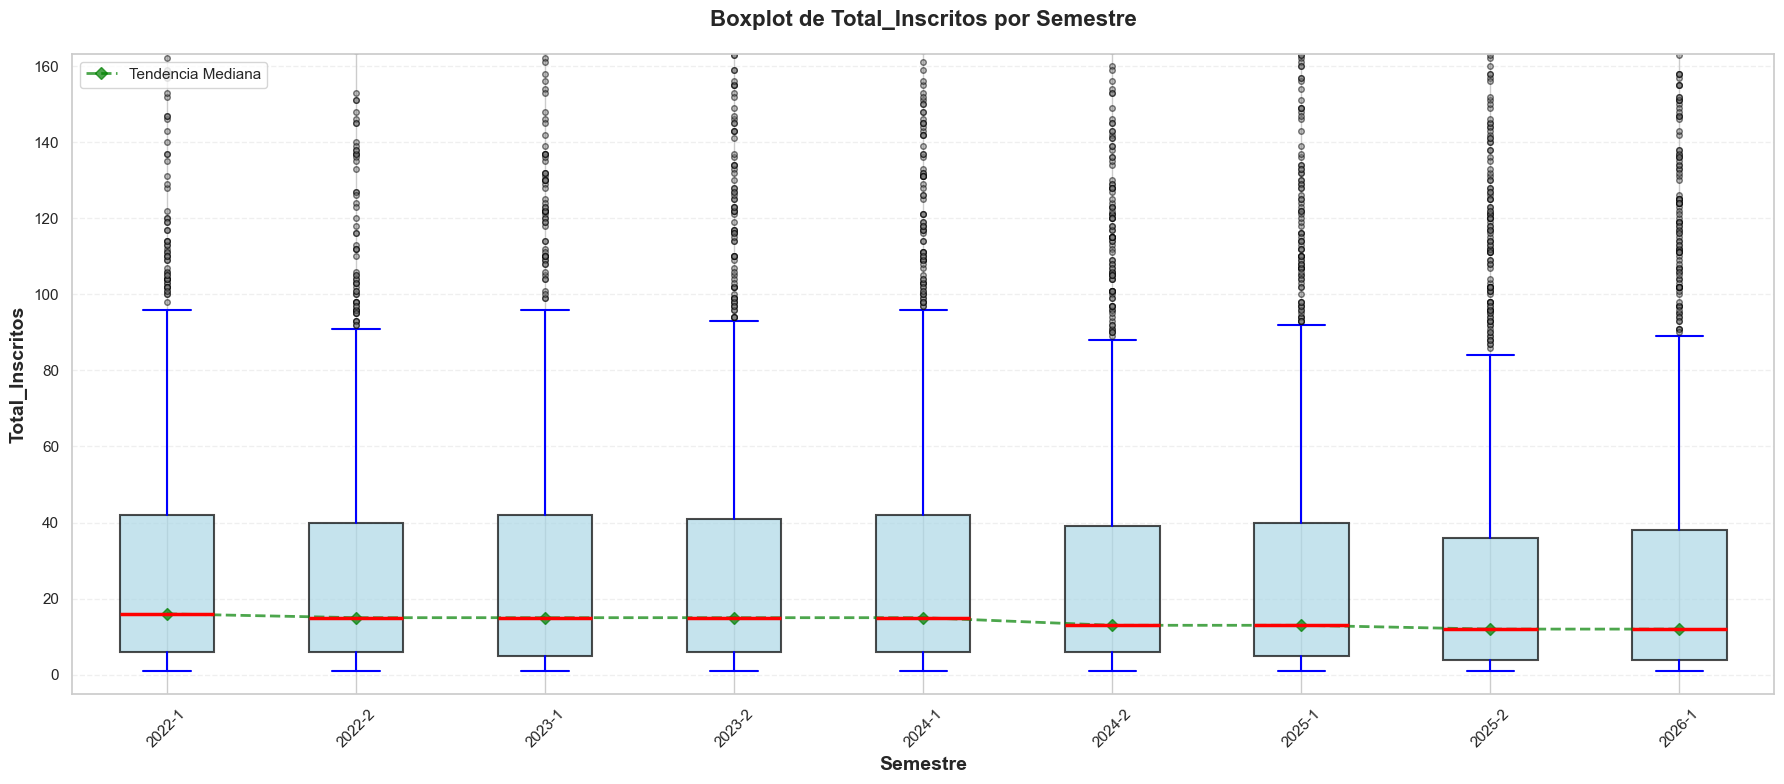


ANÁLISIS DE Total_Inscritos POR SEMESTRE


,Media,Mediana,Desv_Std,Min,Max,Q1,Q3
Semestre,,,,,,,
2022-1,37.44,16.0,70.49,1,1077,6.0,42.0
2022-2,35.25,15.0,61.05,1,721,6.0,40.0
2023-1,36.38,15.0,70.45,1,1229,5.0,42.0
2023-2,35.20,15.0,63.21,1,928,6.0,41.0
2024-1,37.09,15.0,72.54,1,1264,6.0,42.0
2024-2,35.16,13.0,66.94,1,1027,6.0,39.0
2025-1,50.07,13.0,262.26,1,4858,5.0,40.0
2025-2,36.41,12.0,87.46,1,1723,4.0,36.0
2026-1,40.08,12.0,93.03,1,1387,4.0,38.0



--- TENDENCIA ---
Mediana inicial (2022-1): 16.00
Mediana final (2026-1): 12.00
Cambio absoluto: -4.00
Cambio porcentual: -25.00%
✓ Tendencia DECRECIENTE significativa

--- VARIABILIDAD ---
Coeficiente de variación promedio: 235.20%
✓ Alta variabilidad en los datos




C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\2780311334.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_por_semestre,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\2780311334.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


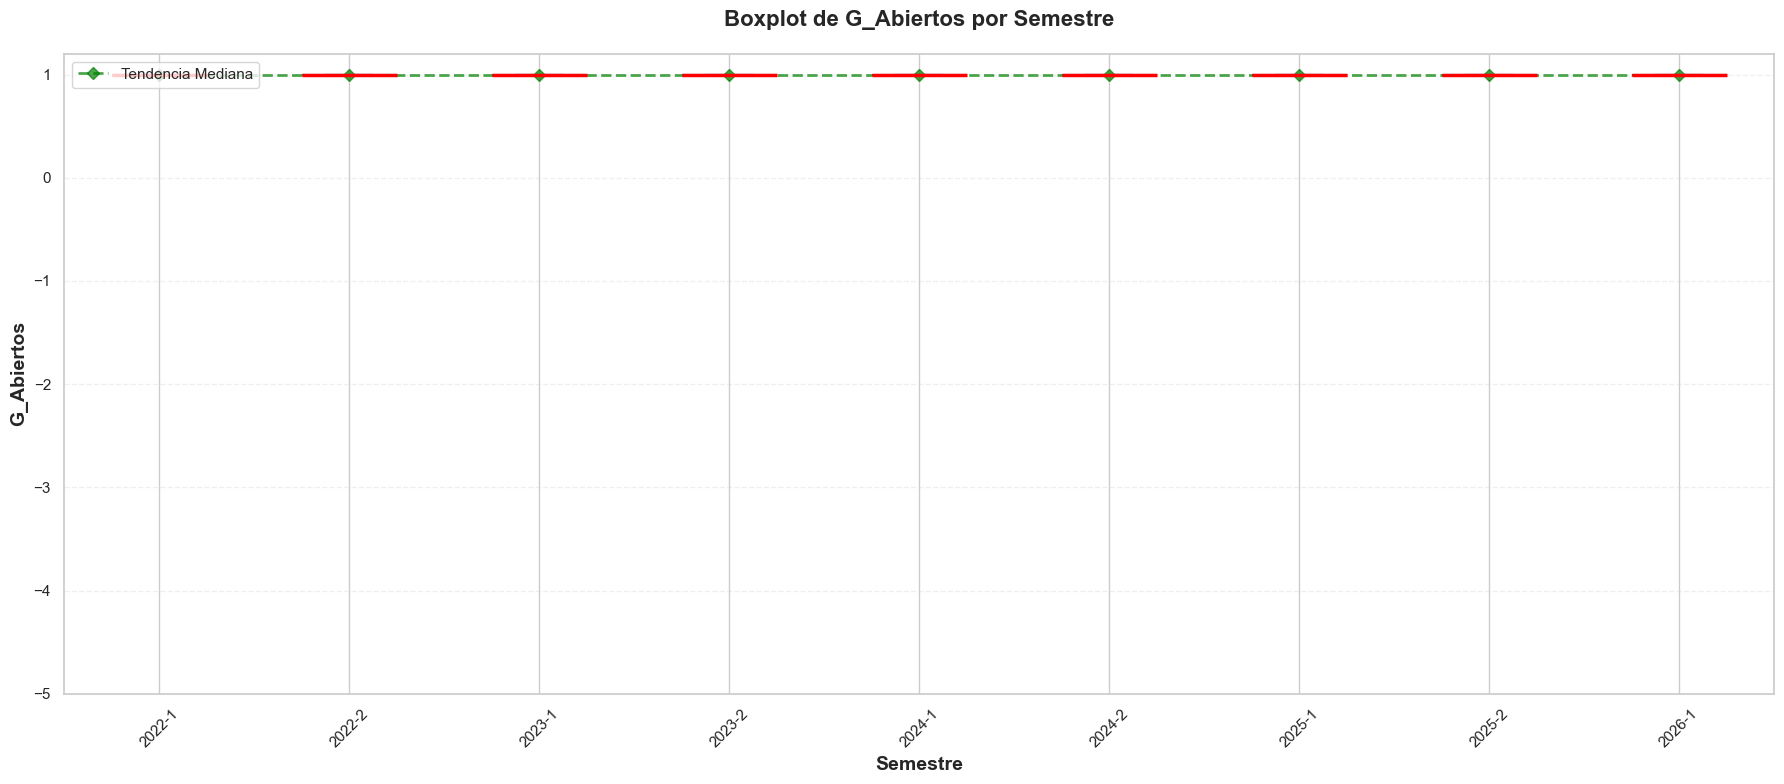


ANÁLISIS DE G_Abiertos POR SEMESTRE


,Media,Mediana,Desv_Std,Min,Max,Q1,Q3
Semestre,,,,,,,
2022-1,1.07,1.0,0.74,1,17,1.0,1.0
2022-2,1.11,1.0,0.99,1,26,1.0,1.0
2023-1,1.05,1.0,0.46,1,11,1.0,1.0
2023-2,1.05,1.0,0.49,1,11,1.0,1.0
2024-1,1.06,1.0,0.54,1,11,1.0,1.0
2024-2,1.07,1.0,0.66,1,13,1.0,1.0
2025-1,1.07,1.0,0.68,1,14,1.0,1.0
2025-2,1.07,1.0,0.69,1,18,1.0,1.0
2026-1,1.06,1.0,0.68,1,20,1.0,1.0



--- TENDENCIA ---
Mediana inicial (2022-1): 1.00
Mediana final (2026-1): 1.00
Cambio absoluto: +0.00
Cambio porcentual: +0.00%
✓ Tendencia ESTABLE

--- VARIABILIDAD ---
Coeficiente de variación promedio: 61.52%
✓ Alta variabilidad en los datos




C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\2780311334.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_por_semestre,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\2780311334.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


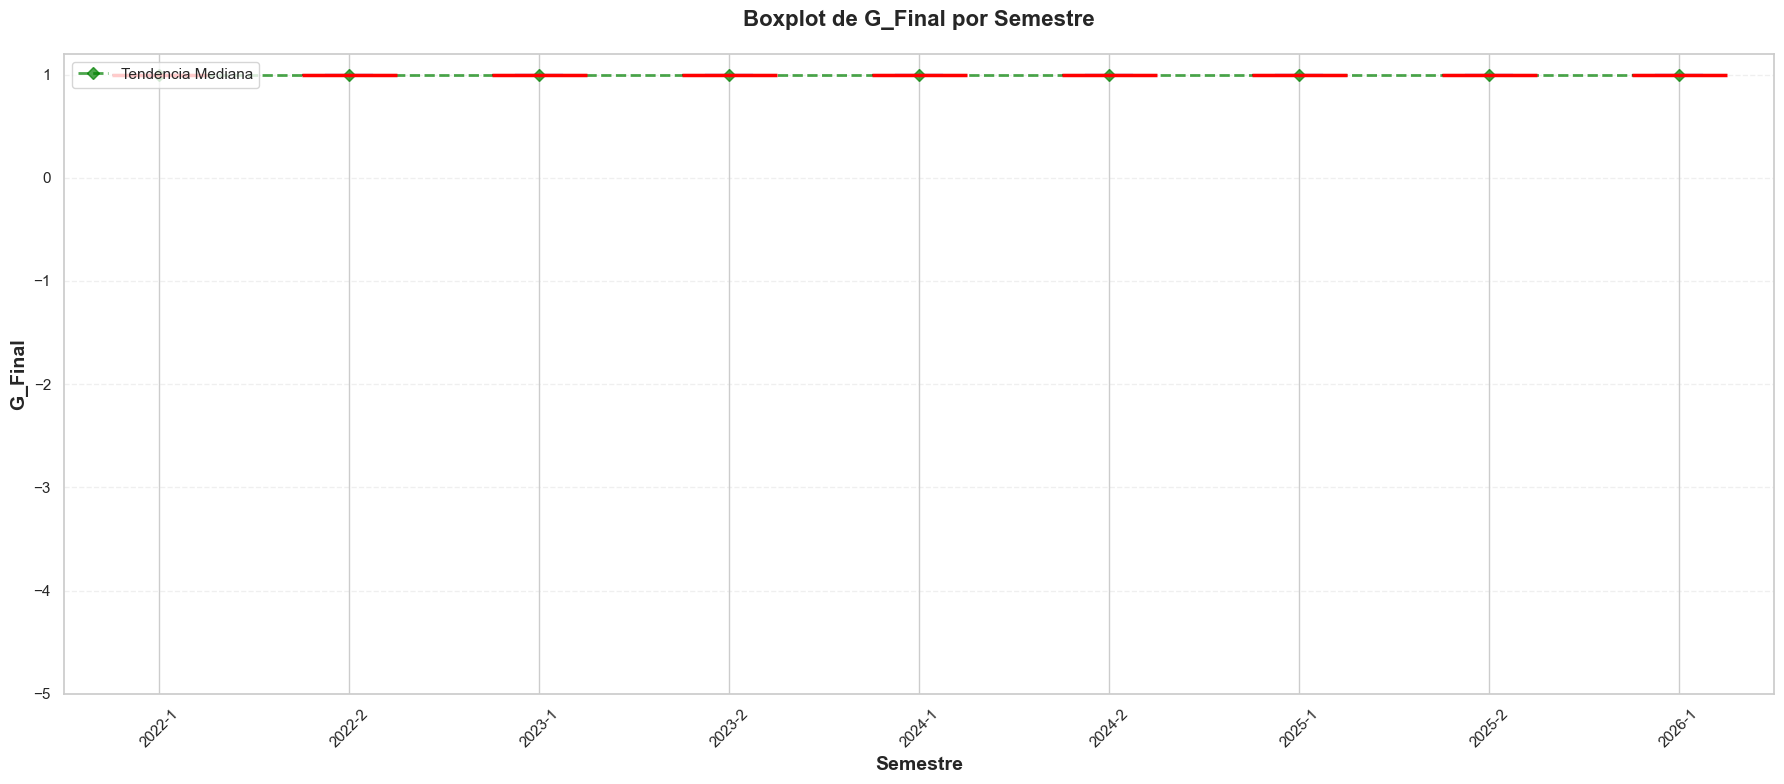


ANÁLISIS DE G_Final POR SEMESTRE


,Media,Mediana,Desv_Std,Min,Max,Q1,Q3
Semestre,,,,,,,
2022-1,1.06,1.0,0.72,1,17,1.0,1.0
2022-2,1.11,1.0,0.99,1,26,1.0,1.0
2023-1,1.05,1.0,0.45,1,11,1.0,1.0
2023-2,1.03,1.0,0.40,1,11,1.0,1.0
2024-1,1.06,1.0,0.49,1,10,1.0,1.0
2024-2,1.05,1.0,0.53,1,11,1.0,1.0
2025-1,1.05,1.0,0.55,1,13,1.0,1.0
2025-2,1.04,1.0,0.47,1,11,1.0,1.0
2026-1,1.06,1.0,0.65,1,20,1.0,1.0



--- TENDENCIA ---
Mediana inicial (2022-1): 1.00
Mediana final (2026-1): 1.00
Cambio absoluto: +0.00
Cambio porcentual: +0.00%
✓ Tendencia ESTABLE

--- VARIABILIDAD ---
Coeficiente de variación promedio: 54.93%
✓ Alta variabilidad en los datos




C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\2780311334.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_por_semestre,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\2780311334.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


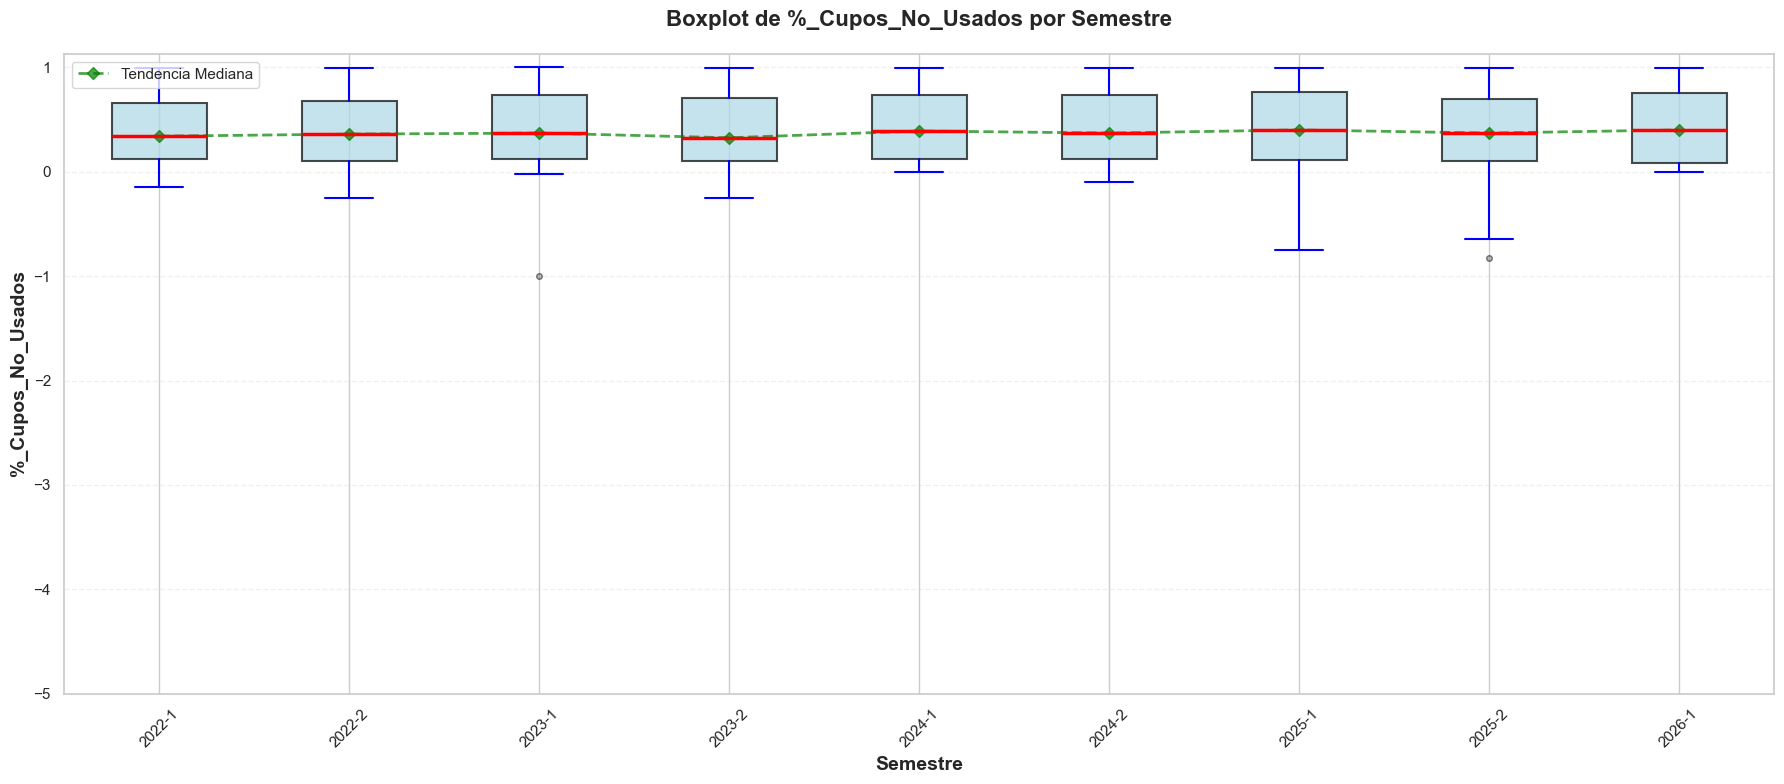


ANÁLISIS DE %_Cupos_No_Usados POR SEMESTRE


,Media,Mediana,Desv_Std,Min,Max,Q1,Q3
Semestre,,,,,,,
2022-1,0.39,0.34,0.31,-0.15,0.99,0.12,0.66
2022-2,0.40,0.36,0.32,-0.25,0.99,0.10,0.68
2023-1,0.43,0.37,0.33,-1.00,1.00,0.12,0.73
2023-2,0.40,0.32,0.33,-0.25,0.99,0.10,0.71
2024-1,0.43,0.39,0.32,0.00,0.99,0.12,0.73
2024-2,0.43,0.37,0.33,-0.10,0.99,0.12,0.73
2025-1,0.44,0.40,0.34,-0.75,0.99,0.11,0.76
2025-2,0.41,0.37,0.33,-0.83,0.99,0.10,0.70
2026-1,0.43,0.40,0.34,0.00,0.99,0.08,0.75



--- TENDENCIA ---
Mediana inicial (2022-1): 0.34
Mediana final (2026-1): 0.40
Cambio absoluto: +0.06
Cambio porcentual: +17.65%
✓ Tendencia CRECIENTE significativa

--- VARIABILIDAD ---
Coeficiente de variación promedio: 78.52%
✓ Alta variabilidad en los datos




In [81]:
# Variables para boxplot - SOLO CAMBIO DE NOMBRE
variables = ['Total_Inscritos', 'G_Abiertos', 'G_Final', '%_Cupos_No_Usados']

# Obtener semestres únicos ordenados
semestres = sorted(df_final['Semestre'].unique())

# Crear un boxplot separado para cada variable
for col in variables:
    fig, ax = plt.subplots(figsize=(18, 8))
    
    # Preparar datos por semestre
    data_por_semestre = [df_final[df_final['Semestre'] == sem][col].dropna() for sem in semestres]
    
    # Crear boxplot con mejor escala
    bp = ax.boxplot(data_por_semestre, 
                    labels=semestres,
                    patch_artist=True,
                    showfliers=True,  # Mostrar outliers
                    boxprops=dict(facecolor='lightblue', alpha=0.7, linewidth=1.5),
                    medianprops=dict(color='red', linewidth=2.5),
                    whiskerprops=dict(color='blue', linewidth=1.5),
                    capprops=dict(color='blue', linewidth=1.5),
                    flierprops=dict(marker='o', markerfacecolor='gray', markersize=4, alpha=0.5))
    
    ax.set_title(f'Boxplot de {col} por Semestre', fontsize=16, fontweight='bold', pad=20)
    ax.set_xlabel('Semestre', fontsize=14, fontweight='bold')
    ax.set_ylabel(col, fontsize=14, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=11)
    ax.tick_params(axis='y', labelsize=11)
    ax.grid(True, alpha=0.3, axis='y', linestyle='--')
    
    # Ajustar límite del eje Y para mejor visualización (enfocarse en los datos sin outliers extremos)
    # Calcular percentil 95 para definir límite superior razonable
    all_data = pd.concat([pd.Series(d) for d in data_por_semestre])
    upper_limit = all_data.quantile(0.95) * 1.2  # 20% más que el percentil 95
    ax.set_ylim(bottom=-5, top=upper_limit)
    
    # Agregar línea de tendencia de la mediana
    medianas = [np.median(d) if len(d) > 0 else 0 for d in data_por_semestre]
    ax.plot(range(1, len(semestres) + 1), medianas, 
            color='green', linestyle='--', linewidth=2, marker='D', 
            markersize=6, label='Tendencia Mediana', alpha=0.7)
    
    ax.legend(fontsize=11, loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar estadísticas clave por semestre
    print(f"\n{'='*100}")
    print(f"ANÁLISIS DE {col} POR SEMESTRE")
    print(f"{'='*100}")
    
    stats_resumen = df_final.groupby('Semestre')[col].agg([
        ('Media', 'mean'),
        ('Mediana', 'median'),
        ('Desv_Std', 'std'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('Q1', lambda x: x.quantile(0.25)),
        ('Q3', lambda x: x.quantile(0.75))
    ]).round(2)
    
    display(stats_resumen)
    
    # Análisis de tendencia
    print(f"\n--- TENDENCIA ---")
    primera_mediana = stats_resumen['Mediana'].iloc[0]
    ultima_mediana = stats_resumen['Mediana'].iloc[-1]
    cambio = ultima_mediana - primera_mediana
    cambio_pct = (cambio / primera_mediana * 100) if primera_mediana != 0 else 0
    
    print(f"Mediana inicial ({semestres[0]}): {primera_mediana:.2f}")
    print(f"Mediana final ({semestres[-1]}): {ultima_mediana:.2f}")
    print(f"Cambio absoluto: {cambio:+.2f}")
    print(f"Cambio porcentual: {cambio_pct:+.2f}%")
    
    if cambio_pct > 5:
        print(f"✓ Tendencia CRECIENTE significativa")
    elif cambio_pct < -5:
        print(f"✓ Tendencia DECRECIENTE significativa")
    else:
        print(f"✓ Tendencia ESTABLE")
    
    # Variabilidad
    print(f"\n--- VARIABILIDAD ---")
    cv_promedio = (stats_resumen['Desv_Std'] / stats_resumen['Media']).mean()
    print(f"Coeficiente de variación promedio: {cv_promedio:.2%}")
    
    if cv_promedio > 0.5:
        print(f"✓ Alta variabilidad en los datos")
    elif cv_promedio > 0.3:
        print(f"✓ Variabilidad moderada")
    else:
        print(f"✓ Baja variabilidad (datos más consistentes)")
    
    print("\n")


**Análisis de los boxplot**

- _Total inscritos por semestre:_ Tiene una tendencia clara a la baja en los estudiantes inscritos por semestre. La línea verde (mediana) muestra una caída sostenida desde 14 estudiantes en 2022-1 hasta solo 9 estudiantes en 2026-1. Esto representa una disminución del 35.71% en la cantidad típica de estudiantes por materia. El tamaño de las cajas también me indican que al principio (2022-2024), las cajas son más altas y anchas, lo que me indica más variedad en el tamaño de las materias, ahora la mayoría de materias tienen pocos estudiantes. En el 2025-1 hay un outlier muy grande que seá corroborado más adelante con el análisis de los máximos por matería y escuelas.

    También se observa que las medianas de los primeros semestres de cada año es mayor a los segundos semstres, lo que indica que hay un mayor movimiento estudiantil en los primeros semetres del año. Además se observa una varianza elevada, por lo que se concluye que hay gran heterogeneidad en los inscritos de cada materia.

- _Total cupos no usados:_ La mediana aumento de 13 a 15 cupos sin usar, lo que representa un aumento en el 15.38%, sin embargo el tamaño de las cajas se mantiene estable, lo que indica que el número de cupos sin usar es consistente a través de los años. La variabilidad es alta, puesto que hay un outlier de 5.143 cupos no usados, lo que claramente indica una indeficiencia creciente en la planificación 

- _Total grupos activos y grupos finales:_ No aporta mucha información, puesto que variación de año a año no es mucha.

##### 5.1.6. Distribución de la Variable Objetivo (Total_Inscritos)
Se realiza un análisis detallado de la distribución de estudiantes inscritos mediante histogramas con rangos predefinidos (0-10, 11-20, 21-30, 31-40, 41-50, 51+). Este análisis permite:

Identificar la concentración de materias por tamaño
Detectar si la distribución es normal, sesgada o multimodal
Fundamentar decisiones sobre transformaciones de datos
Comprender la heterogeneidad del problema de predicción

Pregunta clave: ¿Cuál es el perfil típico de inscripción por materia?

ANÁLISIS DE DISTRIBUCIÓN: TOTAL_INSCRITOS

Estadísticas Descriptivas:
count    12607.000000
mean        38.284683
std        114.994643
min          1.000000
25%          5.000000
50%         14.000000
75%         40.000000
max       4858.000000
Name: Total_Inscritos, dtype: float64
ANÁLISIS DE DISTRIBUCIÓN: TOTAL_INSCRITOS

Estadísticas Descriptivas:
count    12607.000000
mean        38.284683
std        114.994643
min          1.000000
25%          5.000000
50%         14.000000
75%         40.000000
max       4858.000000
Name: Total_Inscritos, dtype: float64

Distribución por Rangos:


Total_Inscritos
0-5      3243
6-10     1931
11-20    2364
21-30    1120
31-40     832
41-50     670
51-60     482
61-70     291
71-80     231
81-90     175
91+       174
Name: count, dtype: int64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\2997025213.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


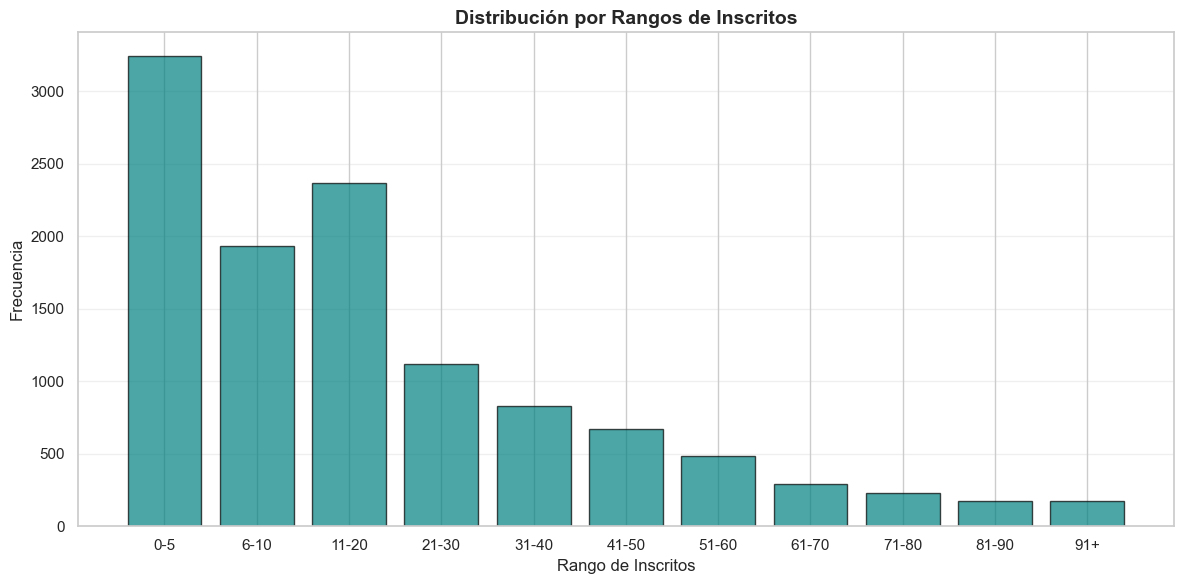

In [82]:
# Análisis detallado de la distribución de inscritos
inscritos = df_final['Total_Inscritos'].dropna()

print("="*70)
print("ANÁLISIS DE DISTRIBUCIÓN: TOTAL_INSCRITOS")
print("="*70)
print(f"\nEstadísticas Descriptivas:")
print(inscritos.describe())

# Análisis de la distribución de inscritos por rangos
inscritos = df_final['Total_Inscritos'].dropna()

print("="*70)
print("ANÁLISIS DE DISTRIBUCIÓN: TOTAL_INSCRITOS")
print("="*70)
print(f"\nEstadísticas Descriptivas:")
print(inscritos.describe())

# Distribución por rangos
rangos = pd.cut(inscritos, bins=[0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                labels=['0-5', '6-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+'])
conteo_rangos = rangos.value_counts().sort_index()

print("\nDistribución por Rangos:")
display(conteo_rangos)

# Visualización
plt.figure(figsize=(12, 6))
plt.bar(range(len(conteo_rangos)), conteo_rangos.values, 
        color='teal', alpha=0.7, edgecolor='black')
plt.xticks(range(len(conteo_rangos)), conteo_rangos.index, rotation=0)
plt.title('Distribución por Rangos de Inscritos', fontsize=14, fontweight='bold')
plt.xlabel('Rango de Inscritos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

##### 5.1.7. Identificación de Materias y Escuelas de Mayor Demanda
Se identifican las materias y escuelas con mayor cantidad de estudiantes inscritos, tanto por semestre como en el periodo completo. Este análisis permite:

Detectar outliers que requieren atención especial
Identificar patrones por escuela o área académica
Comprender la concentración de la demanda
Evaluar si ciertas materias dominan sistemáticamente

Pregunta clave: ¿Dónde se concentra la mayor demanda estudiantil?

MATERIA CON MÁXIMO DE ESTUDIANTES POR SEMESTRE


,Semestre,Nombre Materia,Escuela,Total_Inscritos,G_Final
535,2022-1,Análisis Textual (Nfi),Escuela de Artes y Humanidades,1077,2
2379,2022-2,Pre-Práctica,Vicerrectoría de Aprendizaje,721,1
2529,2023-1,Inducción,Direc Dsllo Humano y Bienestar,1229,1
12501,2023-2,Taller de Salud,Direc Dsllo Humano y Bienestar,928,1
12515,2024-1,Taller de Salud,Direc Dsllo Humano y Bienestar,1264,1
12530,2024-2,Taller de Salud,Direc Dsllo Humano y Bienestar,1027,1
8755,2025-1,Prueba de Lectura 1,Escuela de Artes y Humanidades,4858,1
10247,2025-2,Prueba de Escritura 1,Escuela de Artes y Humanidades,1723,1
12591,2026-1,Taller de Salud,Direc Dsllo Humano y Bienestar,1387,1



ESCUELA CON MÁXIMO DE ESTUDIANTES POR SEMESTRE


,Semestre,Escuela,Total_Inscritos
1,2022-1,E Ciencias Aplic e Ingeniería,12508
10,2022-2,E Ciencias Aplic e Ingeniería,14492
19,2023-1,E Ciencias Aplic e Ingeniería,15261
28,2023-2,E Ciencias Aplic e Ingeniería,14989
36,2024-1,E Ciencias Aplic e Ingeniería,15360
46,2024-2,Escuela de Administración,14889
55,2025-1,Escuela de Artes y Humanidades,29895
62,2025-2,Escuela de Administración,15618
70,2026-1,Escuela de Administración,15978


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\944807667.py:58: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


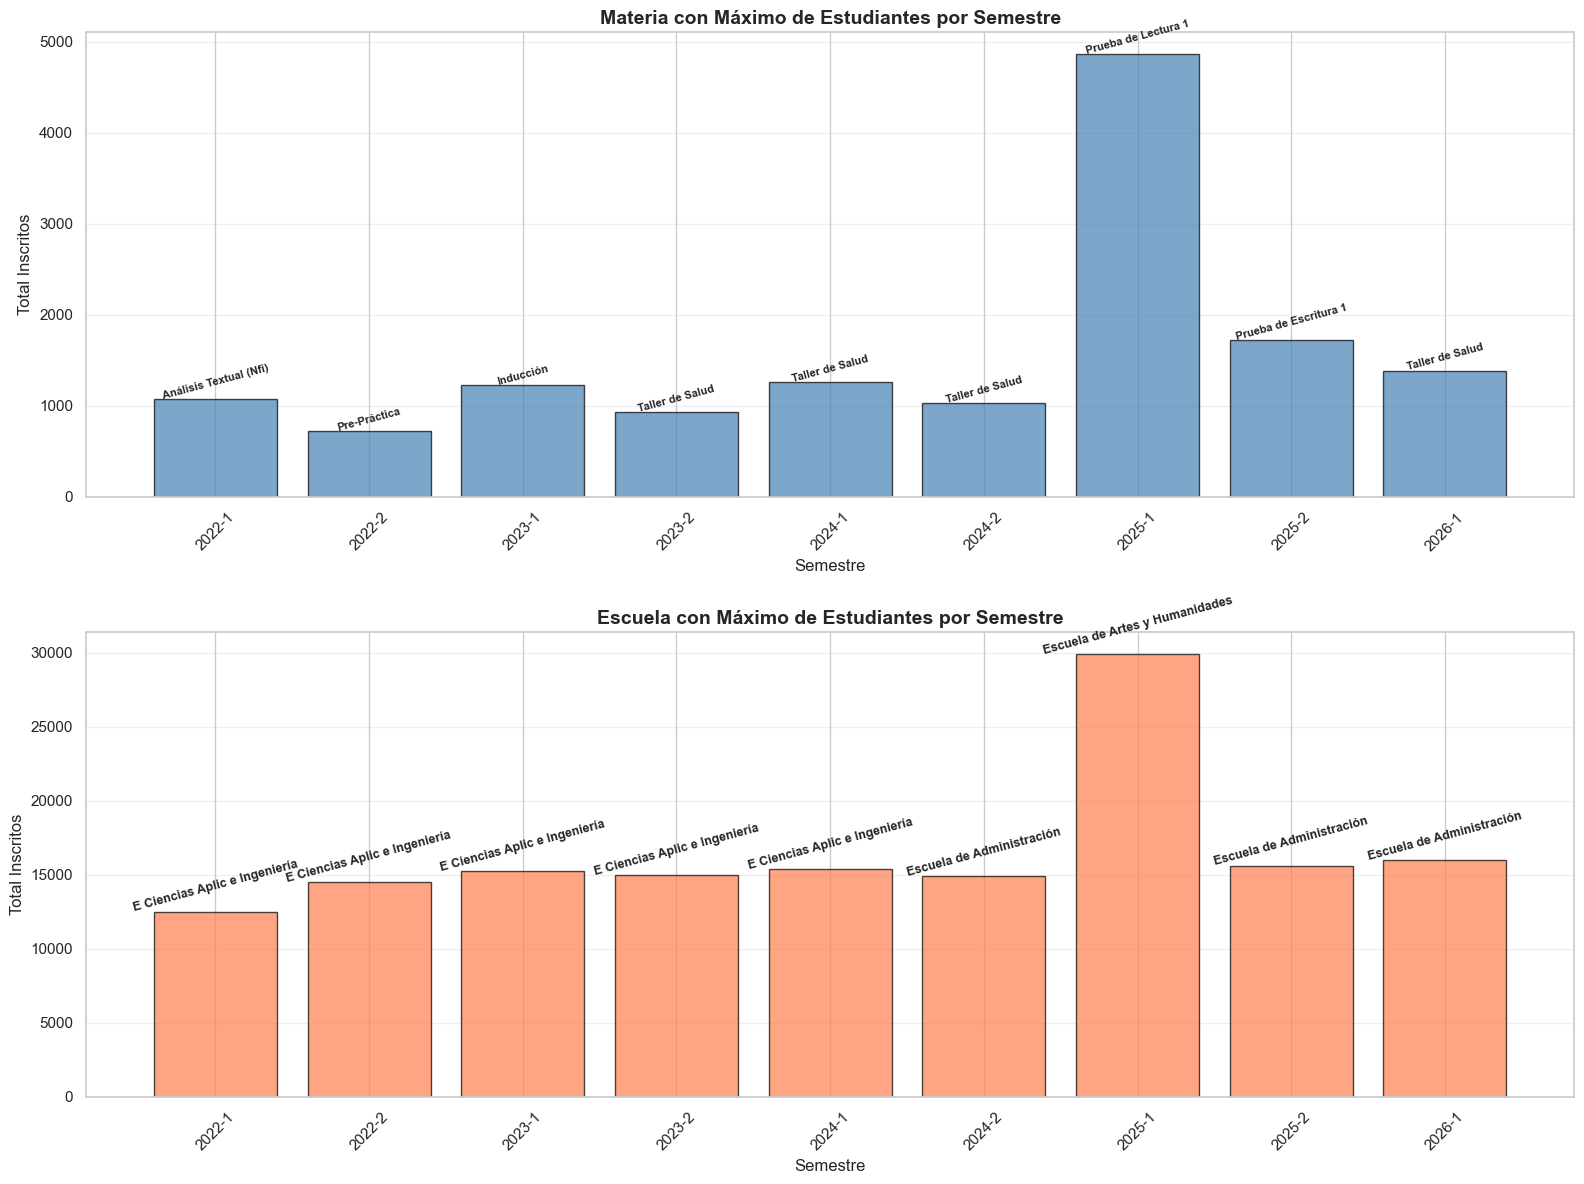


TOP 5 MATERIAS CON MÁS ESTUDIANTES (TODO EL PERIODO)


Nombre Materia
Inducción                  10200
Prueba de Escritura 1       7831
Prueba de Lectura 1         7505
Ciudadanía y Democracia     7070
Taller de Salud             6703
Name: Total_Inscritos, dtype: int64


TOP 5 ESCUELAS CON MÁS ESTUDIANTES (TODO EL PERIODO)


Escuela
E Ciencias Aplic e Ingeniería     129840
Escuela de Administración         124888
Escuela de Artes y Humanidades     98597
E.Finanzas, Economía, Gobierno     42987
Escuela de Derecho                 38736
Name: Total_Inscritos, dtype: int64

In [83]:
# Máximo por semestre - Nivel Materia
max_materia_por_semestre = df_final.loc[df_final.groupby('Semestre')['Total_Inscritos'].idxmax()]

print("="*80)
print("MATERIA CON MÁXIMO DE ESTUDIANTES POR SEMESTRE")
print("="*80)
display(max_materia_por_semestre[['Semestre', 'Nombre Materia', 'Escuela', 'Total_Inscritos', 'G_Final']])

# Máximo por semestre - Nivel Escuela
estudiantes_por_escuela_semestre = df_final.groupby(['Semestre', 'Escuela'])['Total_Inscritos'].sum().reset_index()
max_escuela_por_semestre = estudiantes_por_escuela_semestre.loc[
    estudiantes_por_escuela_semestre.groupby('Semestre')['Total_Inscritos'].idxmax()
]

print("\n" + "="*80)
print("ESCUELA CON MÁXIMO DE ESTUDIANTES POR SEMESTRE")
print("="*80)
display(max_escuela_por_semestre)

# Visualización
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Gráfico 1: Máximo por materia
axes[0].bar(max_materia_por_semestre['Semestre'], 
            max_materia_por_semestre['Total_Inscritos'],
            color='steelblue', alpha=0.7, edgecolor='black')

# Anotar con nombres de materias (truncados)
for i, row in max_materia_por_semestre.iterrows():
    nombre_corto = row['Nombre Materia'][:25] + '...' if len(row['Nombre Materia']) > 25 else row['Nombre Materia']
    axes[0].text(row['Semestre'], row['Total_Inscritos'] + 2, 
                nombre_corto, ha='center', fontsize=8, fontweight='bold', rotation=15)

axes[0].set_title('Materia con Máximo de Estudiantes por Semestre', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Semestre', fontsize=12)
axes[0].set_ylabel('Total Inscritos', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Gráfico 2: Máximo por escuela
axes[1].bar(max_escuela_por_semestre['Semestre'], 
            max_escuela_por_semestre['Total_Inscritos'],
            color='coral', alpha=0.7, edgecolor='black')

# Anotar con nombres de escuelas
for i, row in max_escuela_por_semestre.iterrows():
    axes[1].text(row['Semestre'], row['Total_Inscritos'] + 20, 
                row['Escuela'], ha='center', fontsize=9, fontweight='bold', rotation=15)

axes[1].set_title('Escuela con Máximo de Estudiantes por Semestre', 
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('Semestre', fontsize=12)
axes[1].set_ylabel('Total Inscritos', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Top 5 materias con más estudiantes en todo el periodo
print("\n" + "="*80)
print("TOP 5 MATERIAS CON MÁS ESTUDIANTES (TODO EL PERIODO)")
print("="*80)
top_materias = df_final.groupby('Nombre Materia')['Total_Inscritos'].sum().sort_values(ascending=False).head(5)
display(top_materias)

# Top 5 escuelas con más estudiantes en todo el periodo
print("\n" + "="*80)
print("TOP 5 ESCUELAS CON MÁS ESTUDIANTES (TODO EL PERIODO)")
print("="*80)
top_escuelas = df_final.groupby('Escuela')['Total_Inscritos'].sum().sort_values(ascending=False).head(5)
display(top_escuelas)

In [86]:
from scipy import stats

print("="*80)
print("RESUMEN EJECUTIVO DEL EDA")
print("="*80)

print(f"\n1. EVOLUCIÓN TEMPORAL:")
print(f"   - Estudiantes primer semestre: {estudiantes_por_semestre.iloc[0]:.0f}")
print(f"   - Estudiantes último semestre: {estudiantes_por_semestre.iloc[-1]:.0f}")
print(f"   - Cambio total: {((estudiantes_por_semestre.iloc[-1] / estudiantes_por_semestre.iloc[0]) - 1) * 100:+.2f}%")

print(f"\n2. MATERIAS ANUALIZADAS:")
print(f"   - Solo Semestre-1: {resumen_tipo.get('Solo Semestre-1', 0)}")
print(f"   - Solo Semestre-2: {resumen_tipo.get('Solo Semestre-2', 0)}")
print(f"   - Ambos Semestres: {resumen_tipo.get('Ambos Semestres', 0)}")

print(f"\n3. POBLACIÓN ESTUDIANTIL:")
print(f"   - Cambio promedio por materia: {promedio_cambio:.2f}%")
print(f"   - Materias en crecimiento: {crecientes}")
print(f"   - Materias en decrecimiento: {decrecientes}")

print(f"\n4. DISTRIBUCIÓN DE INSCRITOS:")
print(f"   - Media: {inscritos.mean():.2f}")
print(f"   - Mediana: {inscritos.median():.2f}")
print(f"   - Desviación estándar: {inscritos.std():.2f}")
print(f"   - Asimetría: {stats.skew(inscritos):.4f}")

print(f"\n5. MÁXIMOS:")
if len(max_materia_por_semestre) > 0:
    materia_mas_frecuente = max_materia_por_semestre['Nombre Materia'].mode()
    if len(materia_mas_frecuente) > 0:
        print(f"   - Materia más grande (frecuente): {materia_mas_frecuente[0]}")
if len(max_escuela_por_semestre) > 0:
    escuela_mas_frecuente = max_escuela_por_semestre['Escuela'].mode()
    if len(escuela_mas_frecuente) > 0:
        print(f"   - Escuela más grande (frecuente): {escuela_mas_frecuente[0]}")

print("="*80)

RESUMEN EJECUTIVO DEL EDA

1. EVOLUCIÓN TEMPORAL:
   - Estudiantes primer semestre: 45564
   - Estudiantes último semestre: 61440
   - Cambio total: +34.84%

2. MATERIAS ANUALIZADAS:
   - Solo Semestre-1: 300
   - Solo Semestre-2: 130
   - Ambos Semestres: 1750

3. POBLACIÓN ESTUDIANTIL:
   - Cambio promedio por materia: 50.33%
   - Materias en crecimiento: 1255
   - Materias en decrecimiento: 505

4. DISTRIBUCIÓN DE INSCRITOS:
   - Media: 38.28
   - Mediana: 14.00
   - Desviación estándar: 114.99
   - Asimetría: 25.8283

5. MÁXIMOS:
   - Materia más grande (frecuente): Taller de Salud
   - Escuela más grande (frecuente): E Ciencias Aplic e Ingeniería


##### 5.1.8. Relación entre Pre-registro y Inscripción Real

Se analiza la relación entre el número de estudiantes que pre-registran una materia y los que finalmente se inscriben, calculando tasas de conversión por semestre y por escuela. Este análisis se realiza únicamente para registros desde 2023-1 en adelante, cuando se implementó el sistema de pre-registro en la universidad.

**Pregunta clave:** *¿Qué tan confiable es el pre-registro como indicador de la demanda real de estudiantes, y existen diferencias significativas por semestre o escuela en la tasa de conversión?*

**Nota metodológica:** Los valores nulos en `Pre_registro` corresponden a semestres anteriores a 2023-1, cuando no existía el sistema de pre-registro. Se excluyen automáticamente del análisis mediante filtrado por `.notna()`.

ANÁLISIS 8: PRE-REGISTRO VS INSCRITOS REALES

Período de análisis: Semestres con sistema de pre-registro implementado
Registros totales con pre-registro: 9,006
Semestres analizados: ['2023-1', '2023-2', '2024-1', '2024-2', '2025-1', '2025-2', '2026-1']
Materias únicas: 1,896

--- Resumen por Semestre ---


,Semestre,Total_Pre_registro,Total_Inscritos,Num_Materias,Tasa_Conversion_%,Diferencia,Diferencia_%
0,2023-1,42992.0,43545,1122,101.29,553.0,1.29
1,2023-2,46589.0,44518,1202,95.55,-2071.0,-4.45
2,2024-1,43387.0,46070,1206,106.18,2683.0,6.18
3,2024-2,45387.0,47647,1280,104.98,2260.0,4.98
4,2025-1,44984.0,50289,1368,111.79,5305.0,11.79
5,2025-2,52004.0,54517,1418,104.83,2513.0,4.83
6,2026-1,52186.0,59690,1410,114.38,7504.0,14.38


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\3189194778.py:162: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


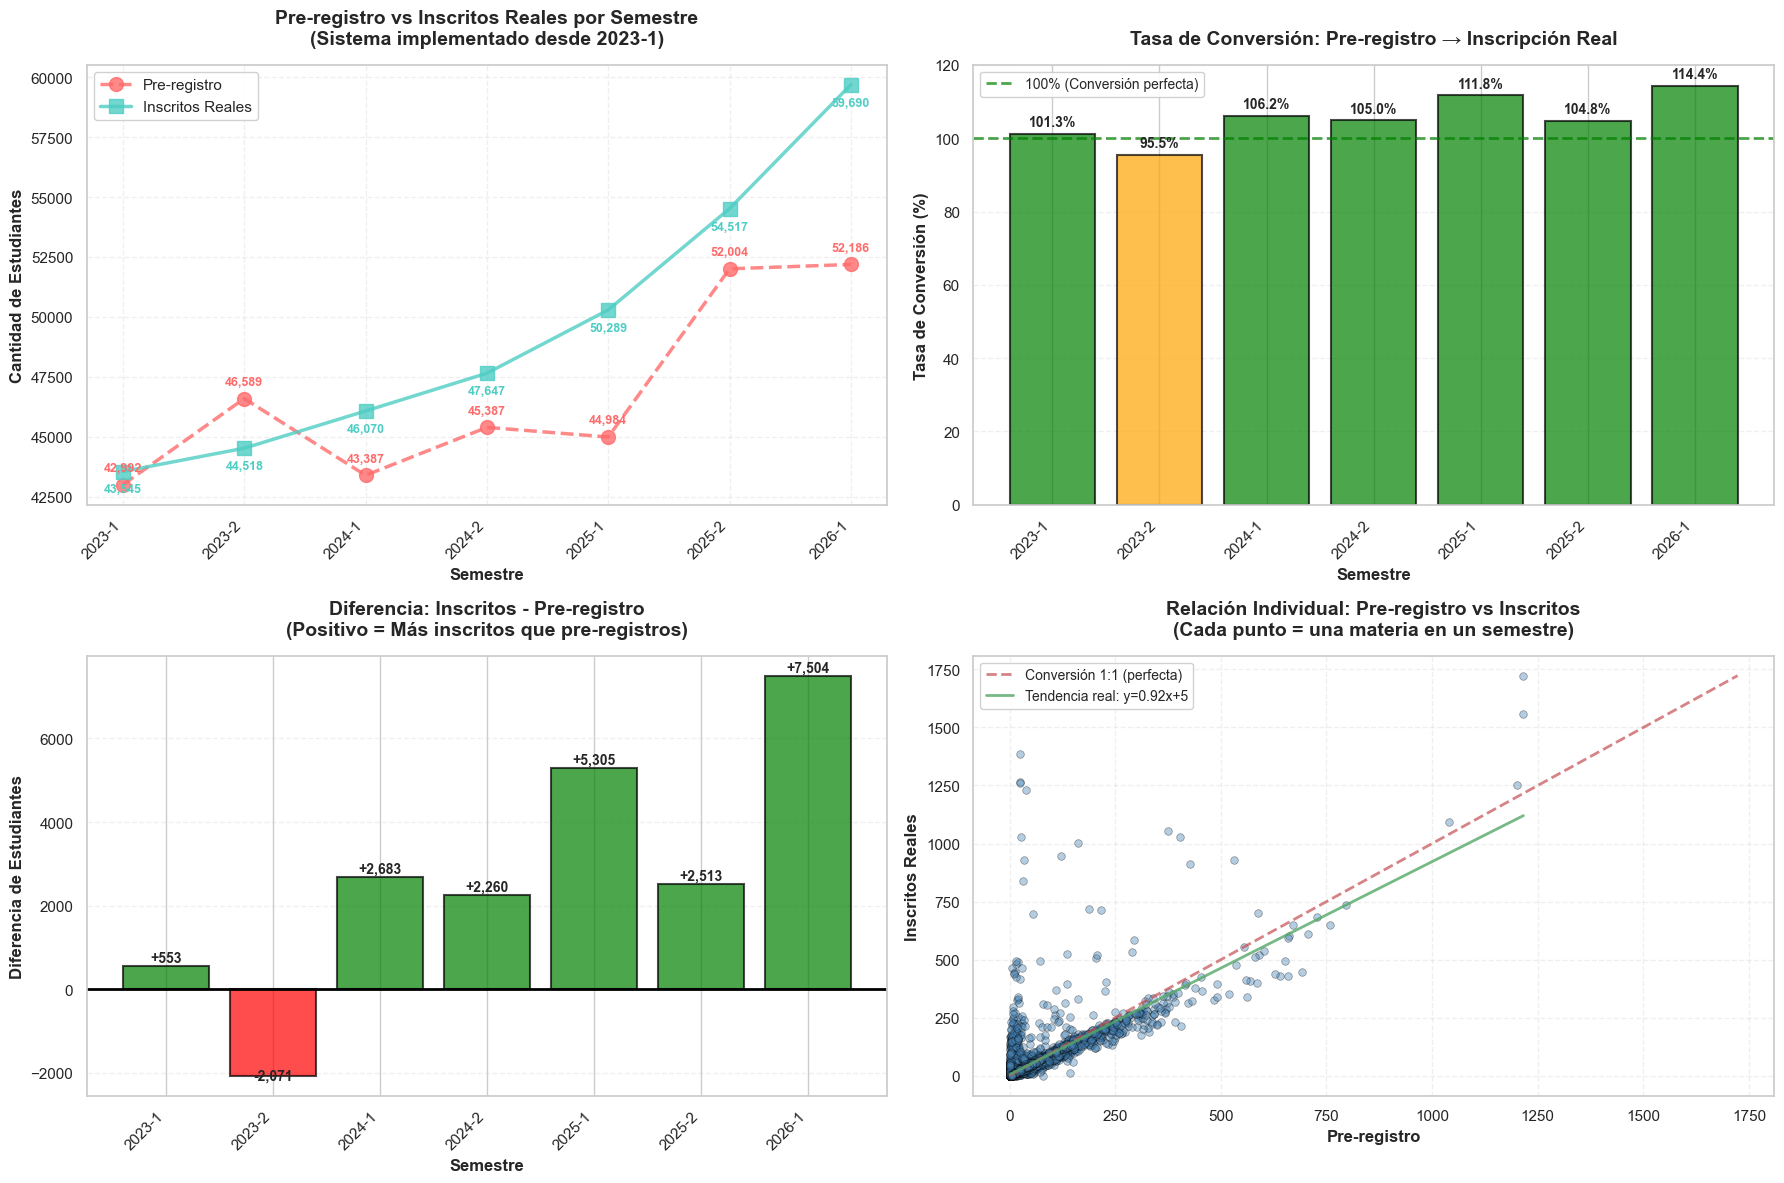


ANÁLISIS ESTADÍSTICO

📊 Correlación Pre-registro vs Inscritos: 0.7756
   ✅ Correlación FUERTE - Buen predictor

📈 Regresión Lineal:
   Ecuación: Inscritos = 0.9170 × Pre-registro + 5.10
   R² = 0.6016 (Explica el 60.16% de la varianza)
   P-valor = 0.000000 ✅ (Significativo)

💡 Interpretación:
   • Por cada 100 estudiantes que pre-registran, ~92 se inscriben
   • ✅ Conversión casi 1:1 - El pre-registro es muy confiable

📊 Estadísticas Generales:
   • Tasa de conversión promedio: 105.57%
   • Tasa de conversión mediana: 104.98%
   • Desv. estándar tasa conversión: 6.28%
   • Diferencia promedio: +2678 estudiantes/semestre

ANÁLISIS POR ESCUELA

--- Top 5 Escuelas con MEJOR tasa de conversión ---


,Escuela,Total_Pre_registro,Total_Inscritos,Num_Registros,Tasa_Conversion_%,Diferencia
0,Direc Dsllo Humano y Bienestar,558.0,14667,33,2628.49,14109.0
6,Vicerrectoría Soste y Proy Soc,206.0,4766,115,2313.59,4560.0
4,Escuela de Artes y Humanidades,58672.0,62123,2318,105.88,3451.0
3,Escuela de Administración,99422.0,101130,1551,101.72,1708.0
1,E Ciencias Aplic e Ingeniería,95989.0,96393,3200,100.42,404.0



--- Top 5 Escuelas con MENOR tasa de conversión ---


,Escuela,Total_Pre_registro,Total_Inscritos,Num_Registros,Tasa_Conversion_%,Diferencia
3,Escuela de Administración,99422.0,101130,1551,101.72,1708.0
1,E Ciencias Aplic e Ingeniería,95989.0,96393,3200,100.42,404.0
7,Vicerrectoría de Aprendizaje,10359.0,10315,233,99.58,-44.0
2,"E.Finanzas, Economía, Gobierno",34105.0,31889,927,93.50,-2216.0
5,Escuela de Derecho,28218.0,24993,629,88.57,-3225.0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\3189194778.py:272: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


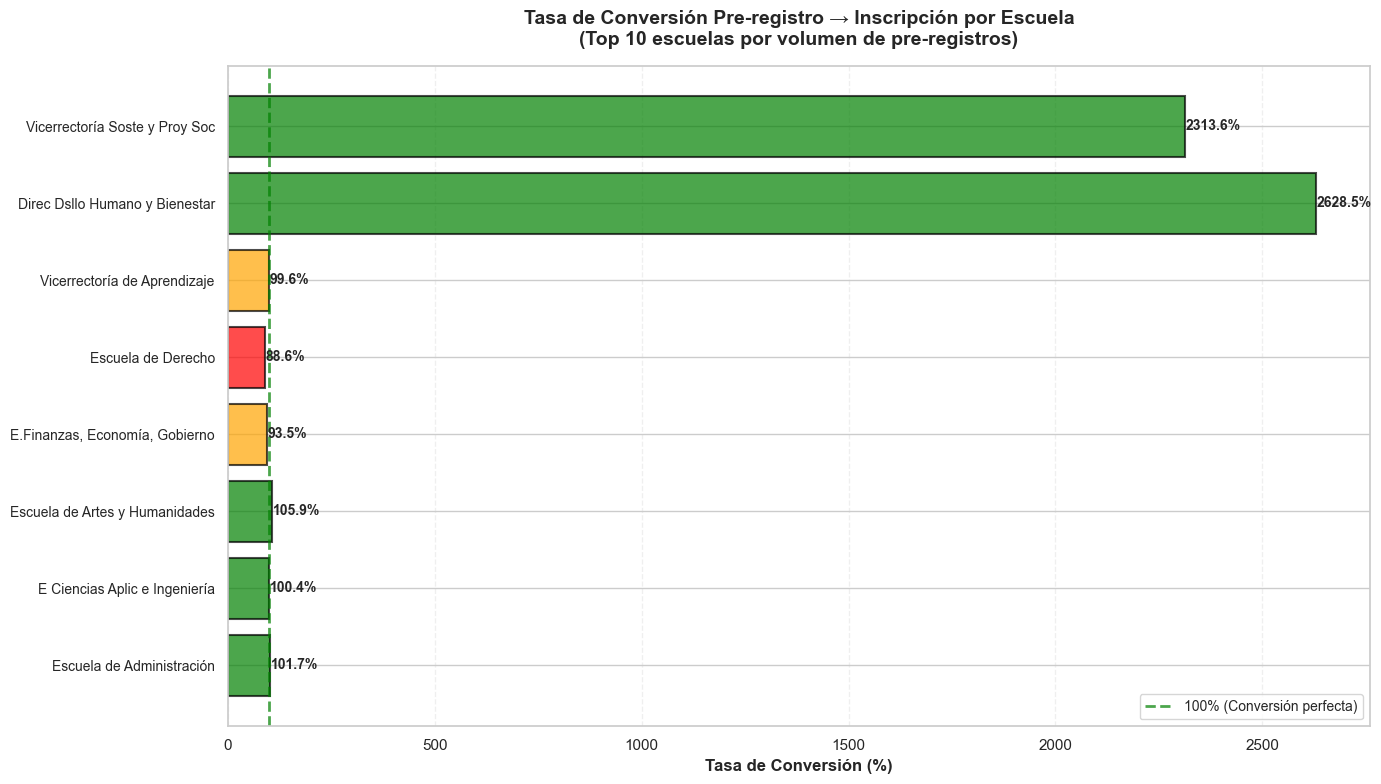


RESUMEN EJECUTIVO

🏆 Mejor semestre de conversión: 2026-1 (114.4%)
📉 Menor semestre de conversión: 2023-2 (95.5%)

📊 Correlación general: 0.7756 (R² = 0.6016)
📈 Modelo predictivo: Inscritos = 0.917 × Pre-registro + 5

🏆 Escuela con mejor conversión: Direc Dsllo Humano y Bienestar (2628.5%)
📉 Escuela con menor conversión: Escuela de Derecho (88.6%)

⚠️ HALLAZGO CLAVE: Deserción del 8.3% entre pre-registro e inscripción
   → Recomendación: Implementar recordatorios automáticos antes de cierre de inscripciones



In [87]:
from scipy import stats

print("="*80)
print("ANÁLISIS 8: PRE-REGISTRO VS INSCRITOS REALES")
print("="*80)

# ============================================================================
# 1. PREPARACIÓN DE DATOS
# ============================================================================

# Filtrar solo registros con pre-registro disponible (desde 2023-1)
df_prereg = df_final[df_final['Pre_registro'].notna()].copy()

print(f"\nPeríodo de análisis: Semestres con sistema de pre-registro implementado")
print(f"Registros totales con pre-registro: {len(df_prereg):,}")
print(f"Semestres analizados: {sorted(df_prereg['Semestre'].unique())}")
print(f"Materias únicas: {df_prereg['Nombre Materia'].nunique():,}")

# ============================================================================
# 2. AGREGACIÓN POR SEMESTRE
# ============================================================================

prereg_por_semestre = df_prereg.groupby('Semestre').agg({
    'Pre_registro': 'sum',
    'Total_Inscritos': 'sum',
    'Nombre Materia': 'count'
}).reset_index()

prereg_por_semestre.columns = ['Semestre', 'Total_Pre_registro', 'Total_Inscritos', 'Num_Materias']

# Calcular tasa de conversión
prereg_por_semestre['Tasa_Conversion_%'] = (
    prereg_por_semestre['Total_Inscritos'] / prereg_por_semestre['Total_Pre_registro'] * 100
).round(2)

# Calcular diferencia
prereg_por_semestre['Diferencia'] = (
    prereg_por_semestre['Total_Inscritos'] - prereg_por_semestre['Total_Pre_registro']
)

prereg_por_semestre['Diferencia_%'] = (
    (prereg_por_semestre['Diferencia'] / prereg_por_semestre['Total_Pre_registro']) * 100
).round(2)

print("\n--- Resumen por Semestre ---")
display(prereg_por_semestre)

# ============================================================================
# 3. VISUALIZACIÓN PRINCIPAL: CUATRO GRÁFICOS
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- GRÁFICO 1: Líneas comparativas ---
ax1 = axes[0, 0]
x_pos = range(len(prereg_por_semestre))
semestres = prereg_por_semestre['Semestre'].tolist()

ax1.plot(x_pos, prereg_por_semestre['Total_Pre_registro'], 
         marker='o', linewidth=2.5, markersize=10, label='Pre-registro', 
         color='#FF6B6B', linestyle='--', alpha=0.8)
ax1.plot(x_pos, prereg_por_semestre['Total_Inscritos'], 
         marker='s', linewidth=2.5, markersize=10, label='Inscritos Reales', 
         color='#4ECDC4', linestyle='-', alpha=0.8)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(semestres, rotation=45, ha='right')
ax1.set_title('Pre-registro vs Inscritos Reales por Semestre\n(Sistema implementado desde 2023-1)', 
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Semestre', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cantidad de Estudiantes', fontsize=12, fontweight='bold')
ax1.legend(fontsize=11, loc='best', framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')

# Anotar valores
for i, row in prereg_por_semestre.iterrows():
    ax1.annotate(f"{int(row['Total_Pre_registro']):,}", 
                xy=(i, row['Total_Pre_registro']), 
                xytext=(0, 10), textcoords='offset points',
                ha='center', fontsize=9, color='#FF6B6B', fontweight='bold')
    ax1.annotate(f"{int(row['Total_Inscritos']):,}", 
                xy=(i, row['Total_Inscritos']), 
                xytext=(0, -15), textcoords='offset points',
                ha='center', fontsize=9, color='#4ECDC4', fontweight='bold')

# --- GRÁFICO 2: Tasa de conversión ---
ax2 = axes[0, 1]
colors = ['green' if x >= 100 else 'orange' if x >= 90 else 'red' 
          for x in prereg_por_semestre['Tasa_Conversion_%']]

bars = ax2.bar(x_pos, prereg_por_semestre['Tasa_Conversion_%'], 
               color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

ax2.axhline(100, color='green', linestyle='--', linewidth=2, 
            label='100% (Conversión perfecta)', alpha=0.7)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(semestres, rotation=45, ha='right')
ax2.set_title('Tasa de Conversión: Pre-registro → Inscripción Real', 
              fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Semestre', fontsize=12, fontweight='bold')
ax2.set_ylabel('Tasa de Conversión (%)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10, framealpha=0.9)
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')

# Anotar valores
for i, (bar, val) in enumerate(zip(bars, prereg_por_semestre['Tasa_Conversion_%'])):
    ax2.text(bar.get_x() + bar.get_width()/2, val + 2, 
             f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

# --- GRÁFICO 3: Diferencia absoluta ---
ax3 = axes[1, 0]
colors_diff = ['green' if x >= 0 else 'red' for x in prereg_por_semestre['Diferencia']]

bars_diff = ax3.bar(x_pos, prereg_por_semestre['Diferencia'], 
                    color=colors_diff, alpha=0.7, edgecolor='black', linewidth=1.5)

ax3.axhline(0, color='black', linestyle='-', linewidth=2)
ax3.set_xticks(x_pos)
ax3.set_xticklabels(semestres, rotation=45, ha='right')
ax3.set_title('Diferencia: Inscritos - Pre-registro\n(Positivo = Más inscritos que pre-registros)', 
              fontsize=14, fontweight='bold', pad=15)
ax3.set_xlabel('Semestre', fontsize=12, fontweight='bold')
ax3.set_ylabel('Diferencia de Estudiantes', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y', linestyle='--')

# Anotar valores
for i, (bar, val) in enumerate(zip(bars_diff, prereg_por_semestre['Diferencia'])):
    y_pos = val + 100 if val >= 0 else val - 100
    ax3.text(bar.get_x() + bar.get_width()/2, y_pos, 
             f'{int(val):+,}', ha='center', fontsize=10, fontweight='bold')

# --- GRÁFICO 4: Scatter plot con línea de tendencia ---
ax4 = axes[1, 1]
ax4.scatter(df_prereg['Pre_registro'], df_prereg['Total_Inscritos'], 
            alpha=0.4, s=30, color='steelblue', edgecolors='black', linewidth=0.5)

# Línea diagonal (conversión perfecta 1:1)
max_val = max(df_prereg['Pre_registro'].max(), df_prereg['Total_Inscritos'].max())
ax4.plot([0, max_val], [0, max_val], 'r--', linewidth=2, 
         label='Conversión 1:1 (perfecta)', alpha=0.7)

# Línea de regresión
x = df_prereg['Pre_registro'].dropna()
y = df_prereg['Total_Inscritos'].dropna()
mask = x.index.isin(y.index)
x = x[mask]
y = y[mask]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
x_line = np.linspace(x.min(), x.max(), 100)
ax4.plot(x_line, p(x_line), 'g-', linewidth=2, 
         label=f'Tendencia real: y={z[0]:.2f}x+{z[1]:.0f}', alpha=0.8)

ax4.set_xlabel('Pre-registro', fontsize=12, fontweight='bold')
ax4.set_ylabel('Inscritos Reales', fontsize=12, fontweight='bold')
ax4.set_title('Relación Individual: Pre-registro vs Inscritos\n(Cada punto = una materia en un semestre)', 
              fontsize=14, fontweight='bold', pad=15)
ax4.legend(fontsize=10, framealpha=0.9)
ax4.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# ============================================================================
# 4. ANÁLISIS ESTADÍSTICO
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS ESTADÍSTICO")
print("="*80)

# Correlación
corr = df_prereg[['Pre_registro', 'Total_Inscritos']].corr().iloc[0, 1]
print(f"\n📊 Correlación Pre-registro vs Inscritos: {corr:.4f}")

if corr > 0.9:
    print("   ✅ Correlación MUY FUERTE - Excelente predictor")
elif corr > 0.7:
    print("   ✅ Correlación FUERTE - Buen predictor")
elif corr > 0.5:
    print("   ⚠️ Correlación MODERADA - Predictor aceptable")
else:
    print("   ❌ Correlación DÉBIL - Predictor poco confiable")

# Regresión lineal
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print(f"\n📈 Regresión Lineal:")
print(f"   Ecuación: Inscritos = {slope:.4f} × Pre-registro + {intercept:.2f}")
print(f"   R² = {r_value**2:.4f} (Explica el {r_value**2*100:.2f}% de la varianza)")
print(f"   P-valor = {p_value:.6f} {'✅ (Significativo)' if p_value < 0.05 else '❌ (No significativo)'}")

# Interpretación del coeficiente
print(f"\n💡 Interpretación:")
if slope < 0.9:
    print(f"   • Por cada 100 estudiantes que pre-registran, solo ~{slope*100:.0f} se inscriben realmente")
    print(f"   • 📉 Hay DESERCIÓN del {(1-slope)*100:.1f}% entre pre-registro e inscripción")
    print(f"   • Posibles causas: cambios de horario, cupos llenos, cambio de preferencias")
elif slope < 1.1:
    print(f"   • Por cada 100 estudiantes que pre-registran, ~{slope*100:.0f} se inscriben")
    print(f"   • ✅ Conversión casi 1:1 - El pre-registro es muy confiable")
else:
    print(f"   • Por cada 100 estudiantes que pre-registran, ~{slope*100:.0f} se inscriben")
    print(f"   • 📈 Hay {(slope-1)*100:.1f}% MÁS inscritos que pre-registros")
    print(f"   • Posible causa: inscripciones tardías sin pre-registro previo")

# Estadísticas agregadas
print(f"\n📊 Estadísticas Generales:")
print(f"   • Tasa de conversión promedio: {prereg_por_semestre['Tasa_Conversion_%'].mean():.2f}%")
print(f"   • Tasa de conversión mediana: {prereg_por_semestre['Tasa_Conversion_%'].median():.2f}%")
print(f"   • Desv. estándar tasa conversión: {prereg_por_semestre['Tasa_Conversion_%'].std():.2f}%")
print(f"   • Diferencia promedio: {prereg_por_semestre['Diferencia'].mean():+.0f} estudiantes/semestre")

# ============================================================================
# 5. ANÁLISIS POR ESCUELA
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS POR ESCUELA")
print("="*80)

analisis_escuela = df_prereg.groupby('Escuela').agg({
    'Pre_registro': 'sum',
    'Total_Inscritos': 'sum',
    'Nombre Materia': 'count'
}).reset_index()

analisis_escuela.columns = ['Escuela', 'Total_Pre_registro', 'Total_Inscritos', 'Num_Registros']

analisis_escuela['Tasa_Conversion_%'] = (
    analisis_escuela['Total_Inscritos'] / analisis_escuela['Total_Pre_registro'] * 100
).round(2)

analisis_escuela['Diferencia'] = analisis_escuela['Total_Inscritos'] - analisis_escuela['Total_Pre_registro']

analisis_escuela = analisis_escuela.sort_values('Tasa_Conversion_%', ascending=False)

print("\n--- Top 5 Escuelas con MEJOR tasa de conversión ---")
display(analisis_escuela.head(5))

print("\n--- Top 5 Escuelas con MENOR tasa de conversión ---")
display(analisis_escuela.tail(5))

# Visualización por escuela
fig, ax = plt.subplots(figsize=(14, 8))

# Ordenar y tomar top 10 escuelas por volumen
top_escuelas = analisis_escuela.nlargest(10, 'Total_Pre_registro')

y_pos = range(len(top_escuelas))
colors_esc = ['green' if x >= 100 else 'orange' if x >= 90 else 'red' 
              for x in top_escuelas['Tasa_Conversion_%']]

bars = ax.barh(y_pos, top_escuelas['Tasa_Conversion_%'], color=colors_esc, 
               alpha=0.7, edgecolor='black', linewidth=1.5)

ax.set_yticks(y_pos)
ax.set_yticklabels([e[:40] for e in top_escuelas['Escuela']], fontsize=10)
ax.axvline(100, color='green', linestyle='--', linewidth=2, alpha=0.7, label='100% (Conversión perfecta)')
ax.set_xlabel('Tasa de Conversión (%)', fontsize=12, fontweight='bold')
ax.set_title('Tasa de Conversión Pre-registro → Inscripción por Escuela\n(Top 10 escuelas por volumen de pre-registros)', 
             fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='x', linestyle='--')

# Anotar valores
for i, (bar, val) in enumerate(zip(bars, top_escuelas['Tasa_Conversion_%'])):
    ax.text(val + 2, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# 6. RESUMEN EJECUTIVO
# ============================================================================

print("\n" + "="*80)
print("RESUMEN EJECUTIVO")
print("="*80)

mejor_semestre = prereg_por_semestre.loc[prereg_por_semestre['Tasa_Conversion_%'].idxmax()]
peor_semestre = prereg_por_semestre.loc[prereg_por_semestre['Tasa_Conversion_%'].idxmin()]

print(f"\n🏆 Mejor semestre de conversión: {mejor_semestre['Semestre']} ({mejor_semestre['Tasa_Conversion_%']:.1f}%)")
print(f"📉 Menor semestre de conversión: {peor_semestre['Semestre']} ({peor_semestre['Tasa_Conversion_%']:.1f}%)")
print(f"\n📊 Correlación general: {corr:.4f} (R² = {r_value**2:.4f})")
print(f"📈 Modelo predictivo: Inscritos = {slope:.3f} × Pre-registro + {intercept:.0f}")

mejor_escuela = analisis_escuela.iloc[0]
peor_escuela = analisis_escuela.iloc[-1]
print(f"\n🏆 Escuela con mejor conversión: {mejor_escuela['Escuela'][:40]} ({mejor_escuela['Tasa_Conversion_%']:.1f}%)")
print(f"📉 Escuela con menor conversión: {peor_escuela['Escuela'][:40]} ({peor_escuela['Tasa_Conversion_%']:.1f}%)")

if slope < 0.95:
    print(f"\n⚠️ HALLAZGO CLAVE: Deserción del {(1-slope)*100:.1f}% entre pre-registro e inscripción")
    print(f"   → Recomendación: Implementar recordatorios automáticos antes de cierre de inscripciones")
elif slope > 1.05:
    print(f"\n✅ HALLAZGO CLAVE: {(slope-1)*100:.1f}% más inscritos que pre-registros")
    print(f"   → Causa probable: Inscripciones tardías o ajustes de última hora")
else:
    print(f"\n✅ HALLAZGO CLAVE: Conversión casi perfecta (1:1)")
    print(f"   → El sistema de pre-registro es altamente confiable para predicción")

print("\n" + "="*80)

**Análisis**

El pre-registro era una muy buena manera de saber el número de estudiante sque ibana inscribir las materias, sin embargo, se ve con el tiempo que este método va perdiendo relevancia, porque para 2026-1, hubo un pico histórico de ~14% inscritos por encima del pre-registro. Por otro lado, se puede ver que el sistema funciona perfectamente para la Escuela de Ciencias e Ingeniería, mientras que no funciona para la Escuela de Derecho.

##### 5.1.9. Relación entre Tasa de Reprobación y Crecimiento de Inscritos
Se examina la relación entre la tasa de reprobación histórica de una materia (del semestre anterior) y el crecimiento porcentual en sus inscripciones en el semestre siguiente. Este análisis busca determinar si la "reputación de dificultad" de una materia afecta la demanda estudiantil.

**Pregunta clave:** *¿Las materias con altas tasas de reprobación experimentan caída en la demanda en semestres posteriores, o la demanda se mantiene independientemente de la dificultad percibida?*

**Nota metodológica:** La variable `tasa_reprobación_lag` contiene la tasa de reprobación del semestre anterior para cada materia. Valores nulos indican que no hay datos históricos de reprobación disponibles para esa materia en ese momento. Se excluyen automáticamente del análisis mediante filtrado por `.notna()`.

ANÁLISIS 9: TASA DE REPROBACIÓN VS CRECIMIENTO EN INSCRITOS

Registros con tasa de reprobación disponible: 10,725
Materias únicas: 1,775
Registros con crecimiento calculado: 8,760
Rango de tasas de reprobación: 0.0% - 100.0%

--- Distribución por Categoría de Reprobación ---
Categoria_Reprobacion
Alta (20-30%)       318
Baja (<10%)        7372
Media (10-20%)      832
Muy Alta (≥30%)     238
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\2403600637.py:106: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(datos_filtrados, labels=cats_filtradas, patch_artist=True,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\2403600637.py:185: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


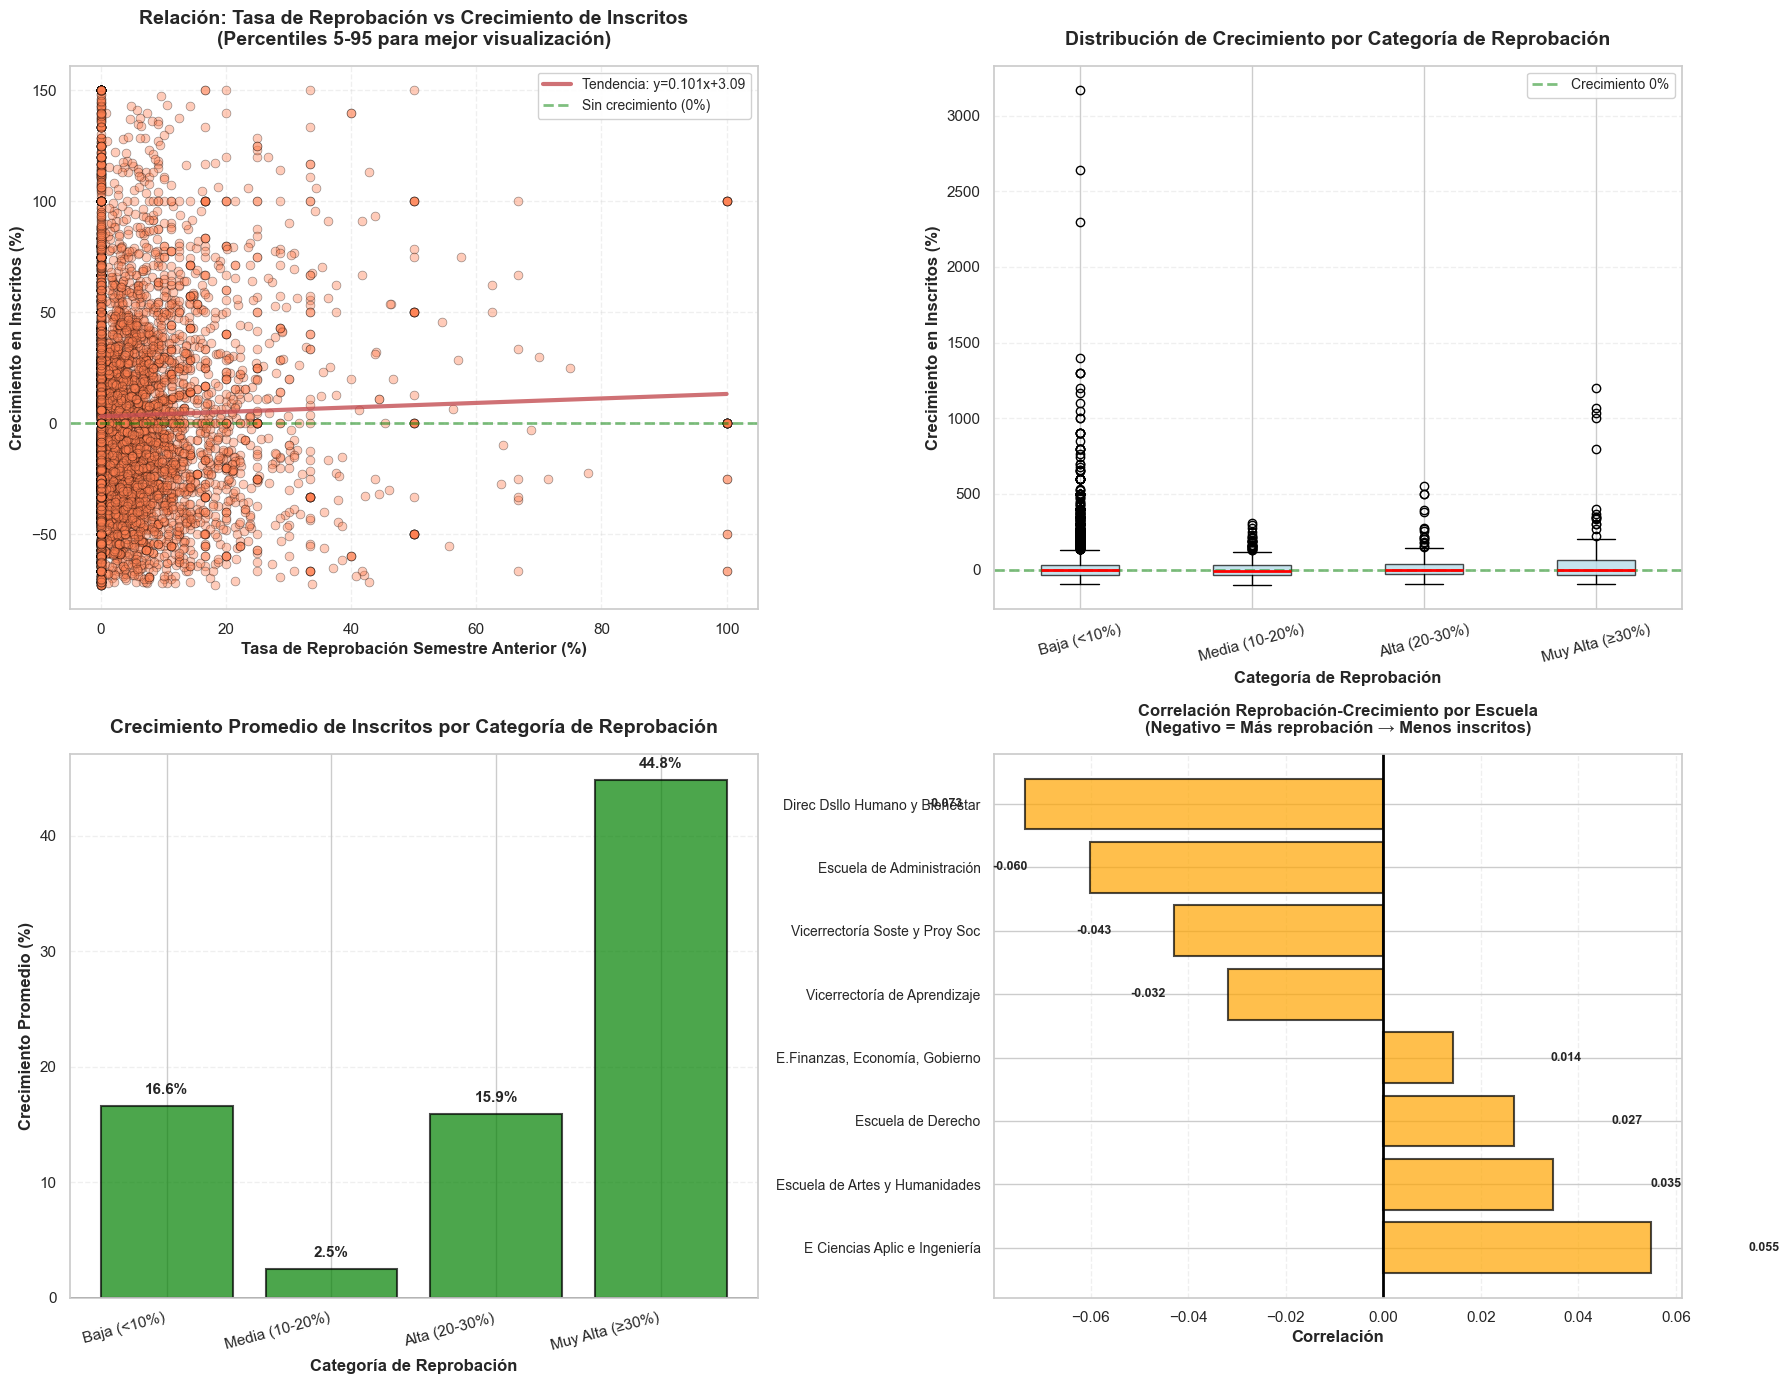


ANÁLISIS ESTADÍSTICO

📊 Correlación global (Reprobación vs Crecimiento): 0.0191
   ❌ Correlación DÉBIL o NULA
   → No hay relación clara entre reprobación y demanda

📈 Regresión Lineal:
   Ecuación: Crecimiento = 0.1009 × Tasa_Reprobación + 3.09
   R² = 0.0005 (Explica el 0.05% de la varianza)
   P-valor = 0.053817 ❌ (No significativo)

💡 Interpretación:
   • Por cada 10% más de reprobación, los inscritos suben ~1.0%
   • 🤔 Contraintuitivo: Materias difíciles siguen siendo demandadas
   • Posibles causas: obligatoriedad, calidad percibida, requisitos

📊 Crecimiento promedio por categoría de reprobación:
   • Baja (<10%): +16.63%
   • Media (10-20%): +2.50%
   • Alta (20-30%): +15.94%
   • Muy Alta (≥30%): +44.83%

ANÁLISIS POR ESCUELA

--- Escuelas donde la reprobación MÁS afecta negativamente la demanda ---


,Escuela,Correlación
0,E Ciencias Aplic e Ingeniería,0.054843
1,Escuela de Artes y Humanidades,0.034820
4,Escuela de Derecho,0.026759
3,"E.Finanzas, Economía, Gobierno",0.014380
6,Vicerrectoría de Aprendizaje,-0.031910



--- Escuelas donde la reprobación MENOS afecta la demanda ---


,Escuela,Correlación
3,"E.Finanzas, Economía, Gobierno",0.014380
6,Vicerrectoría de Aprendizaje,-0.031910
5,Vicerrectoría Soste y Proy Soc,-0.042946
2,Escuela de Administración,-0.060109
7,Direc Dsllo Humano y Bienestar,-0.073452



RESUMEN EJECUTIVO

📊 Correlación global: 0.0191
📈 Pendiente del modelo: 0.1009
🎯 R² del modelo: 0.0005

✅ HALLAZGO CLAVE: No hay relación significativa
   → La tasa de reprobación NO es factor determinante en la demanda
   → Otros factores dominan: obligatoriedad, pensum, horarios

📊 Por categoría de reprobación:
   • Mejor crecimiento: Muy Alta (≥30%) (+44.83%)
   • Peor crecimiento: Media (10-20%) (+2.50%)



In [88]:
print("="*80)
print("ANÁLISIS 9: TASA DE REPROBACIÓN VS CRECIMIENTO EN INSCRITOS")
print("="*80)

# ============================================================================
# 1. PREPARACIÓN DE DATOS
# ============================================================================

# Filtrar registros con tasa de reprobación disponible
df_reprob = df_final[df_final['tasa_reprobación_lag'].notna()].copy()

print(f"\nRegistros con tasa de reprobación disponible: {len(df_reprob):,}")
print(f"Materias únicas: {df_reprob['Nombre Materia'].nunique():,}")

# Calcular crecimiento semestral por materia
df_reprob = df_reprob.sort_values(['Código Materia', 'Semestre'])

df_reprob['Crecimiento_Inscritos_%'] = df_reprob.groupby('Código Materia')['Total_Inscritos'].pct_change() * 100

# Filtrar para análisis (eliminar NaN del crecimiento)
df_analisis = df_reprob[df_reprob['Crecimiento_Inscritos_%'].notna()].copy()

print(f"Registros con crecimiento calculado: {len(df_analisis):,}")
print(f"Rango de tasas de reprobación: {df_analisis['tasa_reprobación_lag'].min():.1%} - {df_analisis['tasa_reprobación_lag'].max():.1%}")

# ============================================================================
# 2. CATEGORIZACIÓN DE TASA DE REPROBACIÓN
# ============================================================================

def categorizar_reprobacion(tasa):
    if pd.isna(tasa):
        return 'Sin datos'
    elif tasa < 0.10:
        return 'Baja (<10%)'
    elif tasa < 0.20:
        return 'Media (10-20%)'
    elif tasa < 0.30:
        return 'Alta (20-30%)'
    else:
        return 'Muy Alta (≥30%)'

df_analisis['Categoria_Reprobacion'] = df_analisis['tasa_reprobación_lag'].apply(categorizar_reprobacion)

# Convertir tasa a porcentaje para visualización
df_analisis['Tasa_Reprob_%'] = df_analisis['tasa_reprobación_lag'] * 100

print("\n--- Distribución por Categoría de Reprobación ---")
print(df_analisis['Categoria_Reprobacion'].value_counts().sort_index())

# ============================================================================
# 3. VISUALIZACIONES
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# --- GRÁFICO 1: Scatter plot con línea de tendencia ---
ax1 = axes[0, 0]

# Eliminar outliers extremos para mejor visualización
q1_crecimiento = df_analisis['Crecimiento_Inscritos_%'].quantile(0.05)
q3_crecimiento = df_analisis['Crecimiento_Inscritos_%'].quantile(0.95)
df_plot = df_analisis[
    (df_analisis['Crecimiento_Inscritos_%'] >= q1_crecimiento) & 
    (df_analisis['Crecimiento_Inscritos_%'] <= q3_crecimiento)
].copy()

ax1.scatter(df_plot['Tasa_Reprob_%'], df_plot['Crecimiento_Inscritos_%'],
            alpha=0.4, s=40, color='coral', edgecolors='black', linewidth=0.5)

# Línea de tendencia
x_scatter = df_plot['Tasa_Reprob_%'].dropna()
y_scatter = df_plot['Crecimiento_Inscritos_%'].dropna()
mask_scatter = x_scatter.index.isin(y_scatter.index)
x_clean = x_scatter[mask_scatter]
y_clean = y_scatter[mask_scatter]

if len(x_clean) > 10:
    z = np.polyfit(x_clean, y_clean, 1)
    p = np.poly1d(z)
    x_line = np.linspace(x_clean.min(), x_clean.max(), 100)
    ax1.plot(x_line, p(x_line), 'r-', linewidth=3,
             label=f'Tendencia: y={z[0]:.3f}x+{z[1]:.2f}', alpha=0.8)

ax1.axhline(0, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Sin crecimiento (0%)')
ax1.set_xlabel('Tasa de Reprobación Semestre Anterior (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Crecimiento en Inscritos (%)', fontsize=12, fontweight='bold')
ax1.set_title('Relación: Tasa de Reprobación vs Crecimiento de Inscritos\n(Percentiles 5-95 para mejor visualización)',
              fontsize=14, fontweight='bold', pad=15)
ax1.legend(fontsize=10, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')

# --- GRÁFICO 2: Box plot por categoría ---
ax2 = axes[0, 1]

categorias_orden = ['Baja (<10%)', 'Media (10-20%)', 'Alta (20-30%)', 'Muy Alta (≥30%)']
df_categorizado = df_analisis[df_analisis['Categoria_Reprobacion'].isin(categorias_orden)]

box_data = [df_categorizado[df_categorizado['Categoria_Reprobacion'] == cat]['Crecimiento_Inscritos_%'].dropna()
            for cat in categorias_orden]

# Filtrar categorías con datos
box_data_filtrado = [(cat, data) for cat, data in zip(categorias_orden, box_data) if len(data) > 0]
if box_data_filtrado:
    cats_filtradas, datos_filtrados = zip(*box_data_filtrado)
    
    bp = ax2.boxplot(datos_filtrados, labels=cats_filtradas, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     showfliers=True)

ax2.axhline(0, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Crecimiento 0%')
ax2.set_xlabel('Categoría de Reprobación', fontsize=12, fontweight='bold')
ax2.set_ylabel('Crecimiento en Inscritos (%)', fontsize=12, fontweight='bold')
ax2.set_title('Distribución de Crecimiento por Categoría de Reprobación',
              fontsize=14, fontweight='bold', pad=15)
ax2.tick_params(axis='x', rotation=15)
ax2.legend(fontsize=10, framealpha=0.9)
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')

# --- GRÁFICO 3: Promedio de crecimiento por categoría ---
ax3 = axes[1, 0]

promedio_por_cat = df_categorizado.groupby('Categoria_Reprobacion')['Crecimiento_Inscritos_%'].mean().reindex(categorias_orden)
promedio_por_cat = promedio_por_cat.dropna()

if len(promedio_por_cat) > 0:
    colors = ['green' if x >= 0 else 'red' for x in promedio_por_cat]
    x_pos_cat = range(len(promedio_por_cat))
    bars = ax3.bar(x_pos_cat, promedio_por_cat, color=colors, alpha=0.7,
                   edgecolor='black', linewidth=1.5)

    ax3.axhline(0, color='black', linestyle='-', linewidth=2)
    ax3.set_xticks(x_pos_cat)
    ax3.set_xticklabels(promedio_por_cat.index, rotation=15, ha='right')
    ax3.set_xlabel('Categoría de Reprobación', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Crecimiento Promedio (%)', fontsize=12, fontweight='bold')
    ax3.set_title('Crecimiento Promedio de Inscritos por Categoría de Reprobación',
                  fontsize=14, fontweight='bold', pad=15)
    ax3.grid(True, alpha=0.3, axis='y', linestyle='--')

    # Anotar valores
    for i, (bar, val) in enumerate(zip(bars, promedio_por_cat)):
        y_pos = val + 1 if val >= 0 else val - 1
        ax3.text(bar.get_x() + bar.get_width()/2, y_pos,
                 f'{val:.1f}%', ha='center', fontsize=11, fontweight='bold')

# --- GRÁFICO 4: Correlación por escuela (Top 8) ---
ax4 = axes[1, 1]

# Top 8 escuelas con más datos
top_escuelas = df_analisis['Escuela'].value_counts().head(8).index
df_top = df_analisis[df_analisis['Escuela'].isin(top_escuelas)]

correlaciones_escuela = []
for escuela in top_escuelas:
    df_esc = df_top[df_top['Escuela'] == escuela]
    if len(df_esc) > 5:  # Al menos 5 observaciones
        corr_esc = df_esc[['Tasa_Reprob_%', 'Crecimiento_Inscritos_%']].corr().iloc[0, 1]
        if not pd.isna(corr_esc):
            correlaciones_escuela.append({'Escuela': escuela, 'Correlación': corr_esc})

if correlaciones_escuela:
    df_corr = pd.DataFrame(correlaciones_escuela).sort_values('Correlación', ascending=False)

    colors_corr = ['darkgreen' if x < -0.3 else 'green' if x < -0.1 else 'orange' if x < 0.1 else 'red'
                   for x in df_corr['Correlación']]

    bars_corr = ax4.barh(range(len(df_corr)), df_corr['Correlación'],
                         color=colors_corr, alpha=0.7, edgecolor='black', linewidth=1.5)

    ax4.axvline(0, color='black', linestyle='-', linewidth=2)
    ax4.set_yticks(range(len(df_corr)))
    ax4.set_yticklabels([e[:35] for e in df_corr['Escuela']], fontsize=10)
    ax4.set_xlabel('Correlación', fontsize=12, fontweight='bold')
    ax4.set_title('Correlación Reprobación-Crecimiento por Escuela\n(Negativo = Más reprobación → Menos inscritos)',
                  fontsize=12, fontweight='bold', pad=15)
    ax4.grid(True, alpha=0.3, axis='x', linestyle='--')

    # Anotar valores
    for i, (bar, val) in enumerate(zip(bars_corr, df_corr['Correlación'])):
        x_pos = val + 0.02 if val >= 0 else val - 0.02
        ax4.text(x_pos, bar.get_y() + bar.get_height()/2,
                 f'{val:.3f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# 4. ANÁLISIS ESTADÍSTICO
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS ESTADÍSTICO")
print("="*80)

# Correlación global
corr_global = df_analisis[['Tasa_Reprob_%', 'Crecimiento_Inscritos_%']].corr().iloc[0, 1]

print(f"\n📊 Correlación global (Reprobación vs Crecimiento): {corr_global:.4f}")

if corr_global < -0.3:
    print("   ✅ Correlación NEGATIVA FUERTE")
    print("   → Más reprobación → Menos inscritos (efecto reputacional significativo)")
elif corr_global < -0.1:
    print("   ⚠️ Correlación NEGATIVA MODERADA")
    print("   → Hay cierta relación inversa (efecto reputacional leve)")
elif corr_global > 0.1:
    print("   ⚠️ Correlación POSITIVA (contraintuitivo)")
    print("   → Más reprobación → Más inscritos")
    print("   → Posibles causas: materias obligatorias, requisitos inflexibles")
else:
    print("   ❌ Correlación DÉBIL o NULA")
    print("   → No hay relación clara entre reprobación y demanda")

# Regresión (si hay suficientes datos)
if len(x_clean) > 10:
    slope_r, intercept_r, r_value_r, p_value_r, std_err_r = stats.linregress(x_clean, y_clean)
    
    print(f"\n📈 Regresión Lineal:")
    print(f"   Ecuación: Crecimiento = {slope_r:.4f} × Tasa_Reprobación + {intercept_r:.2f}")
    print(f"   R² = {r_value_r**2:.4f} (Explica el {r_value_r**2*100:.2f}% de la varianza)")
    print(f"   P-valor = {p_value_r:.6f} {'✅ (Significativo)' if p_value_r < 0.05 else '❌ (No significativo)'}")
    
    print(f"\n💡 Interpretación:")
    if slope_r < -0.5:
        print(f"   • Por cada 10% más de reprobación, los inscritos caen ~{abs(slope_r*10):.1f}%")
        print(f"   • ⚠️ La reprobación tiene IMPACTO NEGATIVO FUERTE en la demanda")
        print(f"   • Recomendación: Mejorar tasas de aprobación para mantener demanda")
    elif slope_r < -0.1:
        print(f"   • Por cada 10% más de reprobación, los inscritos caen ~{abs(slope_r*10):.1f}%")
        print(f"   • ⚠️ La reprobación tiene impacto negativo moderado")
    elif slope_r > 0.1:
        print(f"   • Por cada 10% más de reprobación, los inscritos suben ~{slope_r*10:.1f}%")
        print(f"   • 🤔 Contraintuitivo: Materias difíciles siguen siendo demandadas")
        print(f"   • Posibles causas: obligatoriedad, calidad percibida, requisitos")
    else:
        print(f"   • No hay relación significativa entre reprobación y crecimiento")
        print(f"   • Los estudiantes no basan sus decisiones en tasas de reprobación")

# Promedios por categoría
print(f"\n📊 Crecimiento promedio por categoría de reprobación:")
if len(promedio_por_cat) > 0:
    for cat, prom in promedio_por_cat.items():
        print(f"   • {cat}: {prom:+.2f}%")

# ============================================================================
# 5. ANÁLISIS POR ESCUELA
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS POR ESCUELA")
print("="*80)

if correlaciones_escuela and len(df_corr) > 0:
    print("\n--- Escuelas donde la reprobación MÁS afecta negativamente la demanda ---")
    display(df_corr.head(5))

    print("\n--- Escuelas donde la reprobación MENOS afecta la demanda ---")
    display(df_corr.tail(5))

# ============================================================================
# 6. RESUMEN EJECUTIVO
# ============================================================================

print("\n" + "="*80)
print("RESUMEN EJECUTIVO")
print("="*80)

print(f"\n📊 Correlación global: {corr_global:.4f}")
if len(x_clean) > 10:
    print(f"📈 Pendiente del modelo: {slope_r:.4f}")
    print(f"🎯 R² del modelo: {r_value_r**2:.4f}")

if corr_global < -0.2:
    print(f"\n⚠️ HALLAZGO CLAVE: Relación NEGATIVA entre tasa de reprobación y crecimiento")
    print(f"   → Las materias con alta reprobación tienden a perder estudiantes")
    print(f"   → Mecanismo: 'Reputación de dificultad' se propaga entre estudiantes")
    print(f"   → Recomendación: Programas de apoyo académico en materias difíciles")
elif corr_global > 0.2:
    print(f"\n🤔 HALLAZGO CLAVE: Relación POSITIVA (contraintuitiva)")
    print(f"   → Materias con alta reprobación NO pierden demanda")
    print(f"   → Posibles causas:")
    print(f"      • Materias obligatorias sin alternativas")
    print(f"      • Alta calidad docente compensa la dificultad")
    print(f"      • 'Señal de calidad' - dificultad atrae estudiantes motivados")
else:
    print(f"\n✅ HALLAZGO CLAVE: No hay relación significativa")
    print(f"   → La tasa de reprobación NO es factor determinante en la demanda")
    print(f"   → Otros factores dominan: obligatoriedad, pensum, horarios")

# Categoría con mejor/peor crecimiento
if len(promedio_por_cat) > 0:
    mejor_cat = promedio_por_cat.idxmax()
    peor_cat = promedio_por_cat.idxmin()
    print(f"\n📊 Por categoría de reprobación:")
    print(f"   • Mejor crecimiento: {mejor_cat} ({promedio_por_cat[mejor_cat]:+.2f}%)")
    print(f"   • Peor crecimiento: {peor_cat} ({promedio_por_cat[peor_cat]:+.2f}%)")

print("\n" + "="*80)

**Análisis**

Del análisis se concluye que la tasa de reprobación no tiene nada que ver con el crecimiento de inscritos, la correlación global es de 0.019 (p=0.054,  no significativo) con R²=0.0005.

###  5.2.EDA AUTOMATICO

🚀 INICIANDO AUDITORÍA DEL DATASET (12607 filas)...

--- 1. DIAGNÓSTICO DE INTEGRIDAD ---
Duplicados encontrados (Semestre-Materia): 0
✅ ÉXITO: La llave primaria es única (100% Integridad).
------------------------------------------------------------

--- 2. VALORES NULOS (MISSING VALUES) ---
✅ ÉXITO: No hay valores nulos en las variables críticas.
------------------------------------------------------------

--- 3. VISUALIZACIÓN: OFERTA VS DEMANDA ---
Coeficiente de Pearson (r): 0.1572


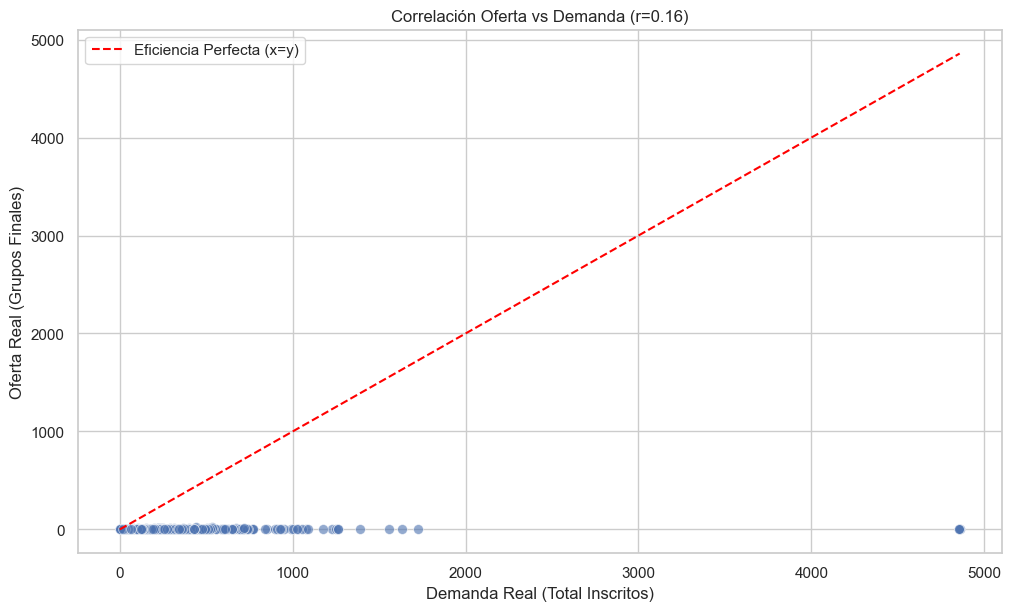


--- 4. ESTACIONALIDAD (PARES VS IMPARES) ---


C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\1758322623.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo_Semestre', y='Total_Inscritos', data=df_analisis, palette="Set2")


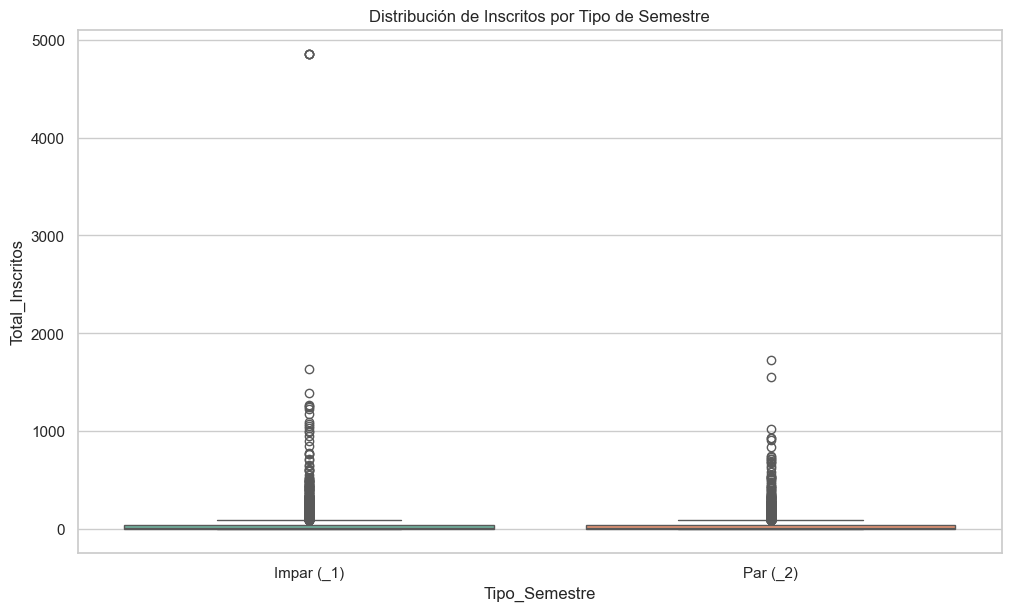

In [89]:
# ==========================================
# 📊 AUDITORÍA DE CALIDAD DE DATOS (EDA)
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para Jupyter y Estilos
%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.constrained_layout.use'] = True

# --- PASO 0: PREPARACIÓN ---
# Usamos una copia para no alterar el original.
# SI TU DATAFRAME TIENE OTRO NOMBRE (ej. df_1), CÁMBIALO AQUÍ 👇
df_analisis = df_final.copy() 

print(f"🚀 INICIANDO AUDITORÍA DEL DATASET ({len(df_analisis)} filas)...\n")


# ==========================================
# 1. INTEGRIDAD DE LA LLAVE PRIMARIA
# ==========================================
print(f"--- 1. DIAGNÓSTICO DE INTEGRIDAD ---")

# Buscamos duplicados exactos de Semestre + Materia
duplicados_mask = df_analisis.duplicated(subset=['Semestre', 'Código Materia'], keep=False)
num_duplicados = duplicados_mask.sum()

print(f"Duplicados encontrados (Semestre-Materia): {num_duplicados}")

if num_duplicados > 0:
    print("🚨 ALERTA ROJA: La llave primaria NO es única.")
    print("Mostrando los primeros 5 casos conflictivos:")
    display(df_analisis[duplicados_mask].sort_values(by=['Código Materia', 'Semestre'])
            [['Semestre', 'Código Materia', 'Total_Inscritos']].head())
else:
    print("✅ ÉXITO: La llave primaria es única (100% Integridad).")
print("-" * 60)


# ==========================================
# 2. ANÁLISIS DE VALORES NULOS
# ==========================================
print(f"\n--- 2. VALORES NULOS (MISSING VALUES) ---")

cols_criticas = ['Total_Inscritos', 'G_Final', 'G_Abiertos']
nulos = df_analisis[cols_criticas].isnull().sum()

if nulos.sum() > 0:
    print("⚠️ Se encontraron nulos en columnas críticas:")
    print(nulos[nulos > 0])
    
    # Lógica de negocio: Hay cupos abiertos pero inscritos es NaN?
    mask_error_logico = (df_analisis['Total_Inscritos'].isnull()) & (df_analisis['G_Abiertos'] > 0)
    if mask_error_logico.any():
        print(f"   -> OJO: {mask_error_logico.sum()} materias tienen cupos abiertos pero 'NaN' en inscritos.")
else:
    print("✅ ÉXITO: No hay valores nulos en las variables críticas.")
print("-" * 60)


# ==========================================
# 3. CORRELACIÓN OFERTA VS DEMANDA
# ==========================================
print(f"\n--- 3. VISUALIZACIÓN: OFERTA VS DEMANDA ---")

# Cálculo seguro de correlación
corr_val = df_analisis[['Total_Inscritos', 'G_Final']].corr().iloc[0, 1]
print(f"Coeficiente de Pearson (r): {corr_val:.4f}")

# Gráfico
plt.figure()
sns.scatterplot(
    data=df_analisis, 
    x='Total_Inscritos', 
    y='G_Final', 
    alpha=0.6, 
    s=50,
    edgecolor='w'
)

# Línea de referencia (Identidad)
max_axis = max(df_analisis['Total_Inscritos'].max(), df_analisis['G_Final'].max())
plt.plot([0, max_axis], [0, max_axis], color='red', linestyle='--', label='Eficiencia Perfecta (x=y)')

plt.title(f'Correlación Oferta vs Demanda (r={corr_val:.2f})')
plt.xlabel('Demanda Real (Total Inscritos)')
plt.ylabel('Oferta Real (Grupos Finales)')
plt.legend()
plt.show()


# ==========================================
# 4. ESTACIONALIDAD (SEMESTRES)
# ==========================================
print(f"\n--- 4. ESTACIONALIDAD (PARES VS IMPARES) ---")

try:
    # Intentamos detectar si termina en 1 (Impar) o 2 (Par)
    # Convertimos a string por seguridad
    df_analisis['Tipo_Semestre'] = np.where(
        df_analisis['Semestre'].astype(str).str.strip().str.endswith('1'), 
        'Impar (_1)', 
        'Par (_2)'
    )
    
    plt.figure()
    sns.boxplot(x='Tipo_Semestre', y='Total_Inscritos', data=df_analisis, palette="Set2")
    plt.title('Distribución de Inscritos por Tipo de Semestre')
    plt.show()
    
except Exception as e:
    print(f"⚠️ No se pudo generar el gráfico de estacionalidad automáticamente.")
    print(f"Error detectado: {e}")
    print("Revisa que tu columna 'Semestre' tenga formato terminación en 1 o 2 (ej: 20241, 20242).")


**Resultados**

Los resultados son consistentes con el EDA manual

---

## 7. Findings and Business Insights

Argumentation of the results obtained in the previous phases.

* **Finding 1:** [Description] -> **Impact:** [Business Value].
* **Finding 2:** [Description] -> **Impact:** [Business Value].
* **General Conclusion:** How does this help solve the problem stated in Section 1?

---

## 8. (Optional) Predictive Modeling

Application of Machine Learning algorithms.

### 8.1. Model Training
* Data Splitting (Train/Test).
* Algorithm Selection.

#### **Features analysis sumarize for algorithm selection**

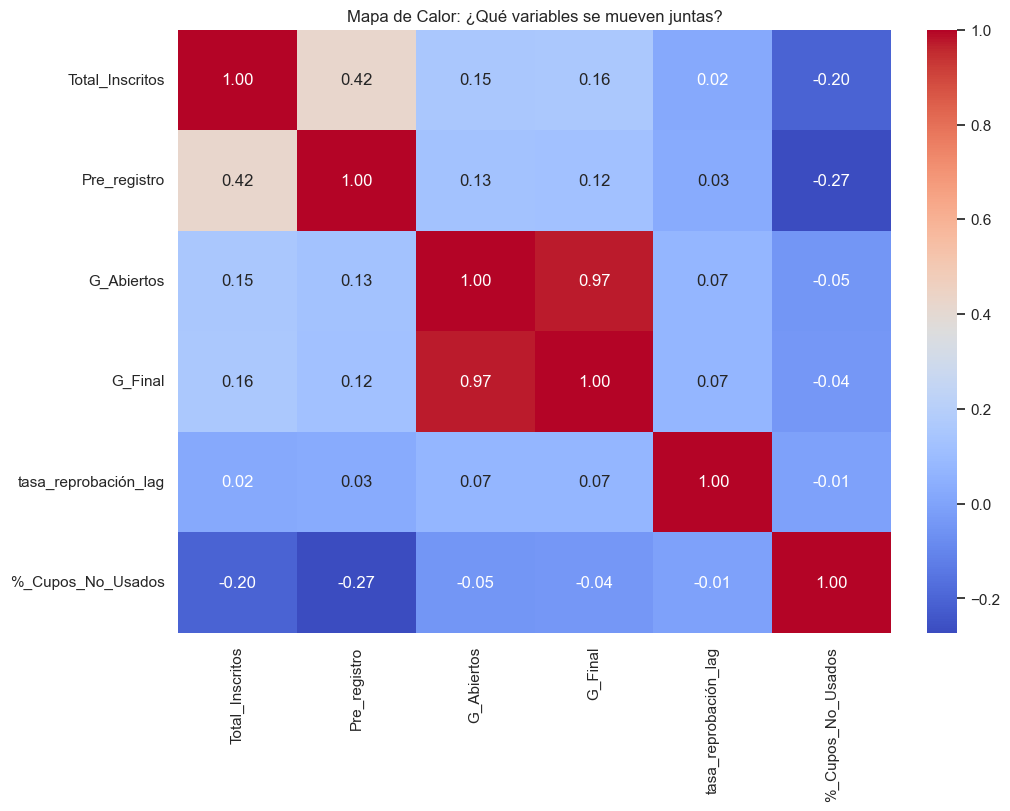

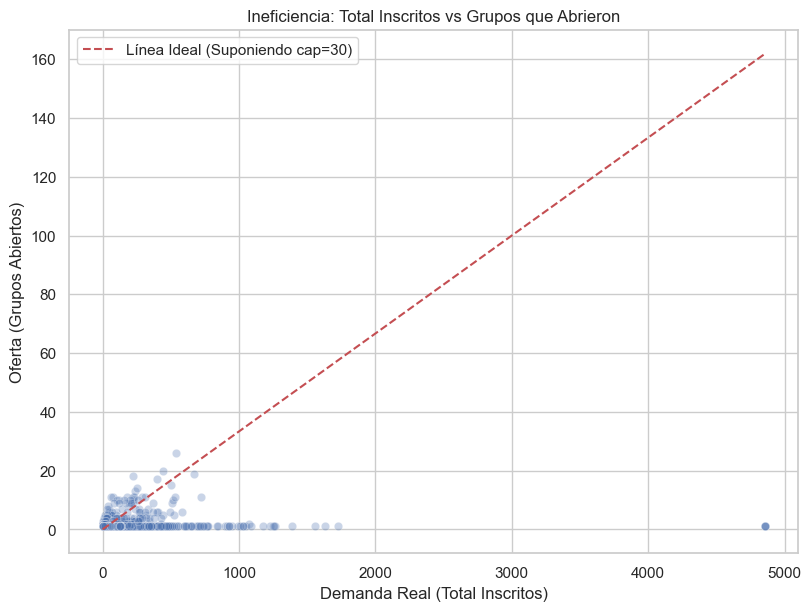

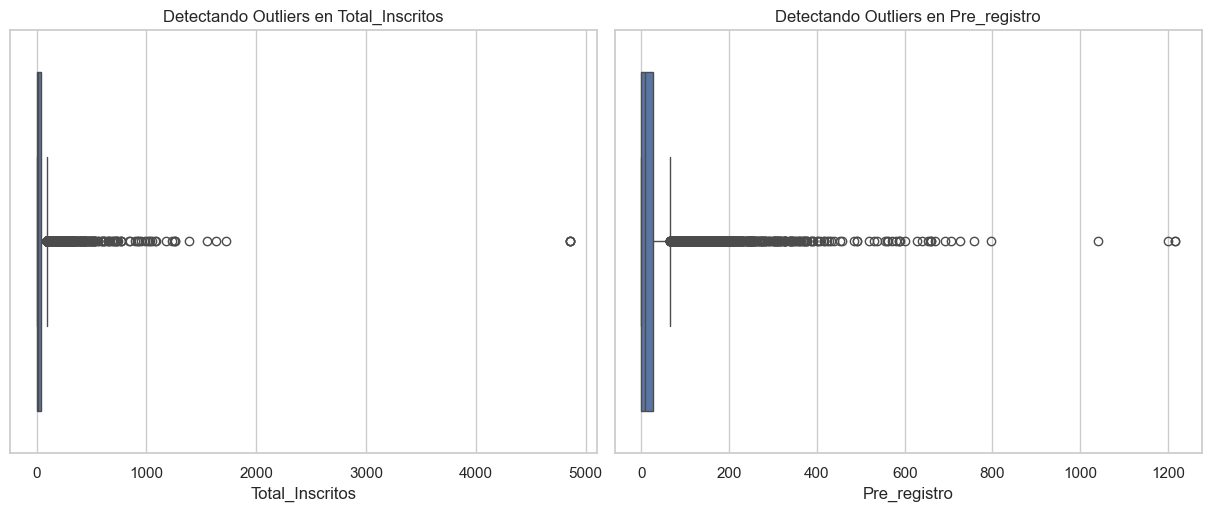

In [90]:


# 1. Matriz de Correlación (Para ver quién manda)
# Filtramos solo columnas numéricas
cols_numericas = ['Total_Inscritos', 'Pre_registro', 'G_Abiertos', 'G_Final', 
                  'tasa_reprobación_lag', '%_Cupos_No_Usados']

plt.figure(figsize=(10, 8))
sns.heatmap(df_final_clean[cols_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor: ¿Qué variables se mueven juntas?")
plt.show()

# 2. Scatter Plot: La Realidad vs La Planificación
# Esto te mostrará qué tan "fuera de lugar" ha estado la planeación histórica
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_final_clean, x='Total_Inscritos', y='G_Abiertos', alpha=0.3)
plt.plot([0, df_final_clean['Total_Inscritos'].max()], [0, df_final_clean['Total_Inscritos'].max()/30], 'r--', label='Línea Ideal (Suponiendo cap=30)')
plt.title("Ineficiencia: Total Inscritos vs Grupos que Abrieron")
plt.xlabel("Demanda Real (Total Inscritos)")
plt.ylabel("Oferta (Grupos Abiertos)")
plt.legend()
plt.show()

# 3. Análisis de Outliers (Cajas y Bigotes)
# Para decidir si normalizamos (MinMax/StandardScaler) o transformamos (Log)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_final_clean['Total_Inscritos'])
plt.title("Detectando Outliers en Total_Inscritos")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_final_clean['Pre_registro'])
plt.title("Detectando Outliers en Pre_registro")
plt.show()

***Modeling Strategy: From Data to Decisions***

Based on the EDA and the nature of the academic registration data, we have defined the following modeling strategy:

**1. Target Definition: `Total_Inscritos` (Demand)**
* **Decision:** We will predict the **Total Enrolled Students** (`Total_Inscritos`), not the number of groups (`G_Final`).
* **Justification:** `G_Final` is a discrete administrative decision derived from demand. By predicting the exact demand ($Y$), we can calculate the optimal number of groups mathematically ($Groups = \lceil Y / Capacity \rceil$), eliminating historical human bias and inefficiency.

**2. Feature Selection & Engineering**
We will use a mix of signals to capture different aspects of demand:
* **The Strong Signal:** `Pre_registro`. Even with the 2022 blackout, this is the strongest intent indicator.
* **The Correction:** `missing_prereg`. Crucial for the model to "ignore" the zero values in 2022.
* **The Inertia:** `tasa_reprobación_lag`. Captures the "snowball effect" of repeating students.
* **The Context:** `first_semester` (Freshmen don't pre-register) and `Escuela` (Faculty-specific trends).
* **The Resource Type:** `Lab`. Distinguishes between theoretical and practical courses. Laboratories often have stricter capacity constraints and different enrollment behaviors (e.g., co-requisites).
* **The Trend:** `Semestre` (Converted to ordinal to capture growth/shrinkage over time).

**3. Algorithm Selection: Random Forest Regressor**
* **Decision:** We will use a **Random Forest Regressor**.
* **Justification:**
    * **Non-Linearity:** The relationship between Pre-registration and Final Enrollment is not perfectly linear (e.g., 100 pre-registers $\neq$ 100 enrolled). Tree-based models capture these complex thresholds better than Linear Regression.
    * **Interactions:** The model naturally learns rules like *"If `first_semester`=1, ignore `Pre_registro` and look at historical average."*
    * **Robustness:** It handles outliers (massive courses vs. tiny electives) better than linear models without requiring aggressive normalization.

**4. Data Transformation Requirements**
* **Categorical Encoding:** `Escuela` needs One-Hot Encoding.
* **Temporal Encoding:** `Semestre` needs to be converted to an Ordinal integer sequence (e.g., 0, 1, 2...) to reflect the passage of time.
* **Scaling:** Not strictly necessary for Random Forest, but we will keep raw values for interpretability.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder

# ==========================================
# PASO 1: PREPARACIÓN DE FEATURES (X) Y TARGET (y)
# ==========================================

features = [
    'Semestre',           
    'Escuela',              
    'first_semester',       
    'Lab',                  
    'Pre_registro',         
    'missing_prereg',       
    'tasa_reprobación_lag'  
]

target = 'Total_Inscritos'

X = df_final_clean[features].copy()
y = df_final_clean[target].copy()

# ==========================================
# PASO 2: INGENIERÍA DE VARIABLES (ENCODING)
# ==========================================

# 2.1 Convertir 'Semestre' a numérico ordinal
encoder_semestre = OrdinalEncoder()
semestres_ordenados = sorted(X['Semestre'].unique())
encoder_semestre.fit(np.array(semestres_ordenados).reshape(-1, 1))

X['Semestre_Ordinal'] = encoder_semestre.transform(X[['Semestre']])
# CORRECCIÓN: NO borramos 'Semestre' todavía. Lo necesitamos para filtrar en el Paso 3.

# 2.2 One-Hot Encoding para 'Escuela'
X = pd.get_dummies(X, columns=['Escuela'], drop_first=True)

print(f"Dimensiones de X antes del split: {X.shape}")

# ==========================================
# PASO 3: SPLIT TEMPORAL (CORREGIDO)
# ==========================================

# 1. Identificamos el último semestre
ultimo_semestre = X['Semestre'].max() # Usamos X directamente
print(f"El semestre de prueba (Test) será: {ultimo_semestre}")

# 2. Creamos las máscaras
mask_test = X['Semestre'] == ultimo_semestre
mask_train = X['Semestre'] < ultimo_semestre

# 3. Dividimos y AHORA SÍ borramos la columna 'Semestre' original
# El modelo solo debe ver 'Semestre_Ordinal', no el string '2026-1'
X_train = X[mask_train].drop(columns=['Semestre'])
X_test = X[mask_test].drop(columns=['Semestre'])

y_train = y[mask_train]
y_test = y[mask_test]

print(f"Entrenando con {X_train.shape[0]} registros (Histórico).")
print(f"Probando con {X_test.shape[0]} registros (Semestre {ultimo_semestre}).")

# ==========================================
# PASO 4: ENTRENAMIENTO DEL MODELO
# ==========================================

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("Entrenando modelo... (esto puede tardar unos segundos)")
rf_model.fit(X_train, y_train)
print("¡Entrenamiento completado!")

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but OrdinalEncoder was fitted without feature names
  warnings.warn(


Dimensiones de X antes del split: (12607, 15)
El semestre de prueba (Test) será: 2026-1
Entrenando con 11074 registros (Histórico).
Probando con 1533 registros (Semestre 2026-1).
Entrenando modelo... (esto puede tardar unos segundos)
¡Entrenamiento completado!


### 8.2. Evaluation and Predictions
* Performance Metrics (Accuracy, RMSE, etc.).


In [92]:
# ==========================================
# PASO 5: EVALUACIÓN Y MÉTRICAS
# ==========================================

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- RESULTADOS DEL MODELO (Walk-Forward Validation) ---")
print(f"R² (Varianza Explicada): {r2:.4f}")
print(f"MAE (Error Medio Absoluto): {mae:.2f} estudiantes")
print(f"RMSE (Error Cuadrático Medio): {rmse:.2f} estudiantes")



--- RESULTADOS DEL MODELO (Walk-Forward Validation) ---
R² (Varianza Explicada): 0.8171
MAE (Error Medio Absoluto): 10.72 estudiantes
RMSE (Error Cuadrático Medio): 39.77 estudiantes


### 8.3. Model Interpretation
* Argumentation on how the predictive model provides tangible added value to the business.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22008\1283482305.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')


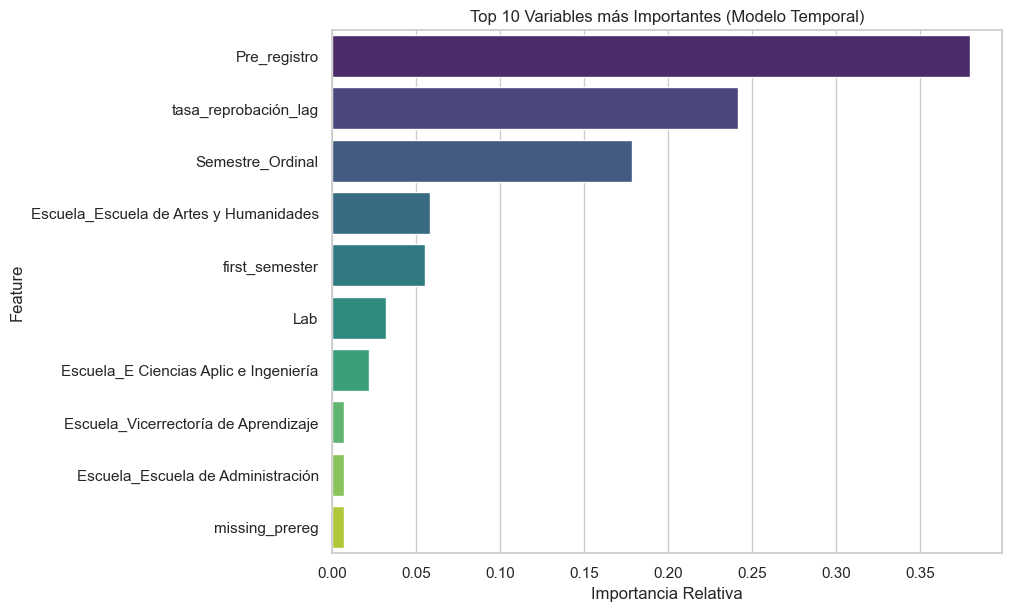

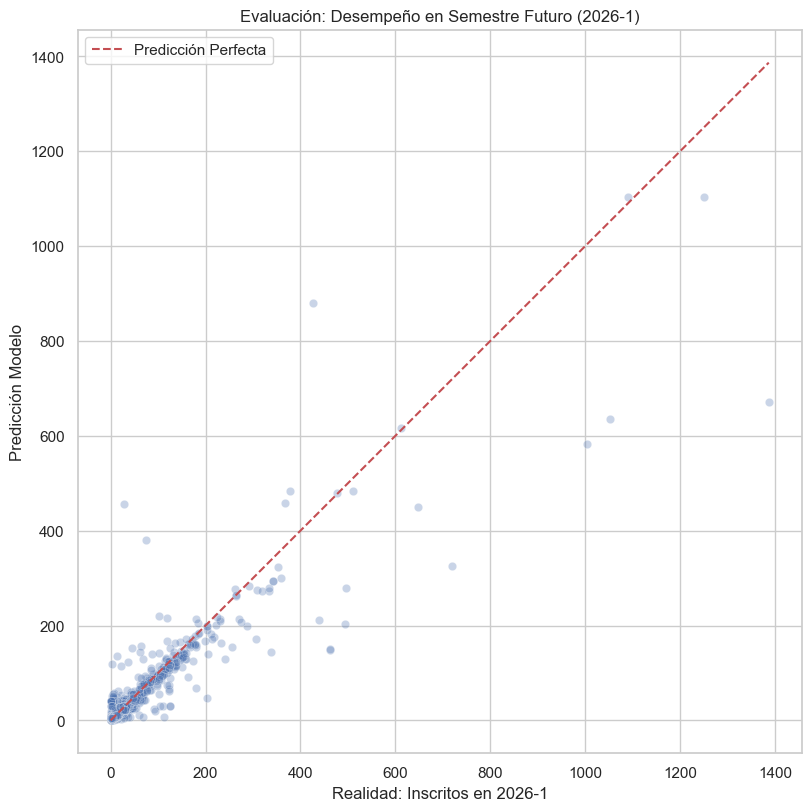

In [93]:

# ==========================================
# PASO 6: INTERPRETACIÓN (FEATURE IMPORTANCE)
# ==========================================

# Usamos X_train.columns para asegurar que coincida con el modelo entrenado
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances.head(10), palette='viridis')
plt.title('Top 10 Variables más Importantes (Modelo Temporal)')
plt.xlabel('Importancia Relativa')
plt.show()

# ==========================================
# PASO 7: VISUALIZACIÓN REAL VS PREDICHO
# ==========================================

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
# Línea de perfección
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--', label='Predicción Perfecta')

plt.xlabel(f'Realidad: Inscritos en {ultimo_semestre}')
plt.ylabel(f'Predicción Modelo')
plt.title(f'Evaluación: Desempeño en Semestre Futuro ({ultimo_semestre})')
plt.legend()
plt.show()

##### **Model Performance Analysis (Test Set: 2026-1)**

The Random Forest model was evaluated using a strict **Walk-Forward Validation**, training on historical data (2018-2025) and testing exclusively on the most recent semester (**2026-1**). This simulates the real-world production scenario.

**Key Metrics & Interpretation**

* **R² (Explained Variance): 0.8171**
    * **Verdict:** Excellent.
    * **Interpretation:** The model explains **81.7%** of the variability in student demand for the new semester. In the context of human behavior and social dynamics, an R² > 0.70 is typically considered strong. Achieving >0.80 on "future" data indicates high robustness.

* **MAE (Mean Absolute Error): 10.72 Students**
    * **Verdict:** Highly Actionable.
    * **Business Impact:** On average, the model misses the exact count by ~11 students.
    * **Context:** Since a standard university course group typically holds 30-40 students, an error of 11 students represents roughly **±0.3 of a group**. This margin of error is low enough that it rarely affects the decision of whether to open an additional group (integer rounding usually absorbs this error).

* **RMSE (Root Mean Squared Error): 39.77 Students**
    * **Observation:** The gap between MAE (10.7) and RMSE (39.8) is significant.
    * **Diagnosis:** RMSE penalizes large errors more heavily. This suggests the presence of **Outliers**—likely massive lectures (Cátedras) where the model might miss by 50-100 students, while remaining very accurate for the majority of standard courses.

>**Conclusion:**  
>
>Unlike the traditional approach, which relied exclusively on pre-registration data (often a biased or incomplete signal of intent), this solution deploys a robust multivariate model that accurately forecasts the final student headcount (Total_Inscritos).
>
>By bridging the gap between expressed intent and actual behavior, the Academic Registry can transition from reactive estimation to strategic capacity planning. This empowers the administration to define the optimal number of groups based on predicted reality, significantly reducing the operational friction of last-minute adjustments and ensuring efficient resource allocation.

---

### 8.4. How do the results differ when the model is run with dirty data?
* Run again with dirty data and compare

In [94]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ==========================================
# 1. SELECCIÓN DE VARIABLES (CRUDAS)
# ==========================================

# Solo podemos usar las numéricas originales.
# 'Escuela' y 'Semestre' (como predictor) se eliminan porque requieren encoding.
features_crudas = [
    'Pre_registro', 
    'tasa_reprobación_lag', 
    'first_semester', 
    'Lab'
]

# Copiamos df_final para no alterar el original
df_naive = df_final.copy()

# ==========================================
# 2. "SIN LIMPIEZA" -> BORRADO MASIVO
# ==========================================
print(f"Dimensiones originales: {df_naive.shape}")

# Como no podemos imputar (limpiar), debemos borrar cualquier fila con dato faltante
# para que el algoritmo matemático funcione.
df_naive = df_naive.dropna(subset=features_crudas)

print(f"Dimensiones tras borrar nulos: {df_naive.shape}")
print(f"Datos perdidos: {df_final.shape[0] - df_naive.shape[0]} filas eliminadas (incluyendo todo 2022).")

# ==========================================
# 3. SPLIT TEMPORAL
# ==========================================
# Usamos Semestre solo para dividir, no como variable de entrada
ultimo_semestre = df_naive['Semestre'].max()

X = df_naive[features_crudas]
y = df_naive['Total_Inscritos']

# Máscaras de tiempo
mask_test = df_naive['Semestre'] == ultimo_semestre
mask_train = df_naive['Semestre'] < ultimo_semestre

X_train, X_test = X[mask_train], X[mask_test]
y_train, y_test = y[mask_train], y[mask_test]

print(f"Entrenando con: {X_train.shape[0]} registros")
print(f"Probando con:   {X_test.shape[0]} registros")

# ==========================================
# 4. ENTRENAMIENTO (MODELO INGENUO)
# ==========================================
rf_naive = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_naive.fit(X_train, y_train)

# ==========================================
# 5. EVALUACIÓN
# ==========================================
y_pred_naive = rf_naive.predict(X_test)

r2 = r2_score(y_test, y_pred_naive)
mae = mean_absolute_error(y_test, y_pred_naive)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_naive))

print("\n--- RESULTADOS DEL MODELO 'CRUDO' ---")
print(f"R² Score: {r2:.4f}")
print(f"MAE:      {mae:.2f} estudiantes")
print(f"RMSE:     {rmse:.2f} estudiantes")

Dimensiones originales: (12607, 16)
Dimensiones tras borrar nulos: (7921, 16)
Datos perdidos: 4686 filas eliminadas (incluyendo todo 2022).
Entrenando con: 6737 registros
Probando con:   1184 registros

--- RESULTADOS DEL MODELO 'CRUDO' ---
R² Score: 0.7475
MAE:      12.51 estudiantes
RMSE:     52.06 estudiantes


>##### **The Value of Data Engineering**
>
>To validate the impact of our data cleaning and imputation strategies (specifically handling the "2022 Data Blackout" and the >"Cold Start" problem), we compared our final model against a **Baseline Model** that simply discarded missing values.
>
>**The Results**:  
>The "Naive Approach" of dropping missing data resulted in:
>1.  **Massive Information Loss:** We lost **37% of the entire dataset** (4,686 rows), including the entire year of 2022. This >blinded the model to recent post-pandemic trends.
>2.  **Performance Degradation:**
>    * **R² dropped from 0.82 to 0.75.**
>    * **RMSE spiked by 31%** (from 39.8 to 52.1), meaning the naive model fails catastrophically on large or complex courses.
>
>**Conclusion**:
> 
>This comparison proves that the **Smart Imputation Strategy** (using flags for 2022 and hierarchical means for new subjects) was the key driver of success. It allowed the model to learn from **4,300+ additional records** that would have otherwise been discarded, directly translating into a **more accurate and robust tool** for the university's resource planning.

---
### ***Statement on AI Tool Usage and Academic Integrity***

For the development and refinement of this analysis, Generative Artificial Intelligence tools (**Google Gemini** and **Claude**) were utilized, serving as **technical copilots**.

The use of these tools was strictly limited to:
* **Code Optimization:** Refinement of `pandas` and `scikit-learn` syntax to ensure efficient computational performance.
* **Conceptual Deepening:** Validation of statistical hypotheses and theoretical justification of imputation strategies (e.g., handling the *Cold Start* problem).
* **Debugging:** Identification and correction of errors within the data pipeline.

**Statement of Responsibility:**
We affirm that we **understand, validate, and assume full responsibility** for every line of code executed and every chart interpreted in this document. While AI functioned as a support assistant, the **modeling strategy, business decision-making, and ethical leadership** regarding the presented conclusions remain 100% the authorship and judgment of the students.

---